In [1]:
%matplotlib inline 
import torch 
from d2l import torch as d2l 

## Defining the Model

In [55]:
class LinearRegressionScratch(d2l.Module):  #@save
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01): #num_inputs = number of features
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        # self.w = torch.zeros((num_inputs,1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

`torch.normal(mean, std, *, size, **kwargs)`:
- Multiple ways of defining the shape: 
If mean and std are scalars, size is used to define the shape of the output tensor.
If mean and std are tensors, then they define the values and standard deviations element-wise, and size does not apply.
- `*, size, **kwargs`: keyword arguments after *.

`torch.zeros(*size, **kwargs)`:
- `*size`: positional arguments, `size` is int or tuple:docs.

The `*` symbol in a function signature is used to specify that all parameters after it must be passed as keyword arguments and cannot be passed as positional arguments.
- KEYWORD argument: name of the argument are specified therefore doesn't depend on position of argument passed. Eg. funcn(arg1= some_value, arg2= some_value)
- POSITIONAL argument: it depends on the position of arguments passed. Eg. funcn(some_value, some_value)
- The torch.normal function has multiple overloads, and one of them allows you to pass mean, std, and size as positional arguments. 

`**kwargs` is a Python convention used in function definitions to pass a variable number of keyword arguments. It allows you to provide optional parameters as key-value pairs, giving flexibility to functions.
- The **kwargs in Python does not represent "double pointers", rather, it is a convention 
- The double asterisks (`**`) before kwargs indicate that the function can accept any number of keyword arguments, which are captured as a dictionary. Each keyword argument is treated as a key-value pair in this dictionary. Eg. requires_grad=True ---> requires_grad:True.
- The arguments that can be passed to **kwargs are not strictly defined within the function. **kwargs allows a function to accept any number of keyword arguments without explicitly defining each one and they will be collected into the kwargs dictionary.
- `requires_grad`: indicate whether the operations on the tensor should be tracked for automatic differentiation, which is useful when training models. If set to True, PyTorch will track all operations on the tensor. This is useful for building a computation graph.

In [56]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

This forward function, which is subsequently added to the class through the use of a decorator, overrides the pre-defined function within d2l.torch.Module

## Defining the Loss Function

In [79]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def loss(self, y_hat, y):
    # l = (y_hat - y) ** 2 / 2
    l = (y_hat - d2l.reshape(y, y_hat.shape)).abs().sum()
    return l.mean()

## Defining the Optimization Algorithm

In [58]:
class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In the d2l library, as well as in general PyTorch usage, the grad and grad.zero_() functions are related to gradient computation and optimization during the training of neural networks.
- the gradients of all tensors that have requires_grad=True will be computed once per iteration and stored in their .grad attributes.
- The zero_() method is used to reset the gradients of a tensor to zero in place. This is crucial because gradients accumulate by default in PyTorch, this due to way the function is defined; if you don't reset them, they will add up across multiple backward passes



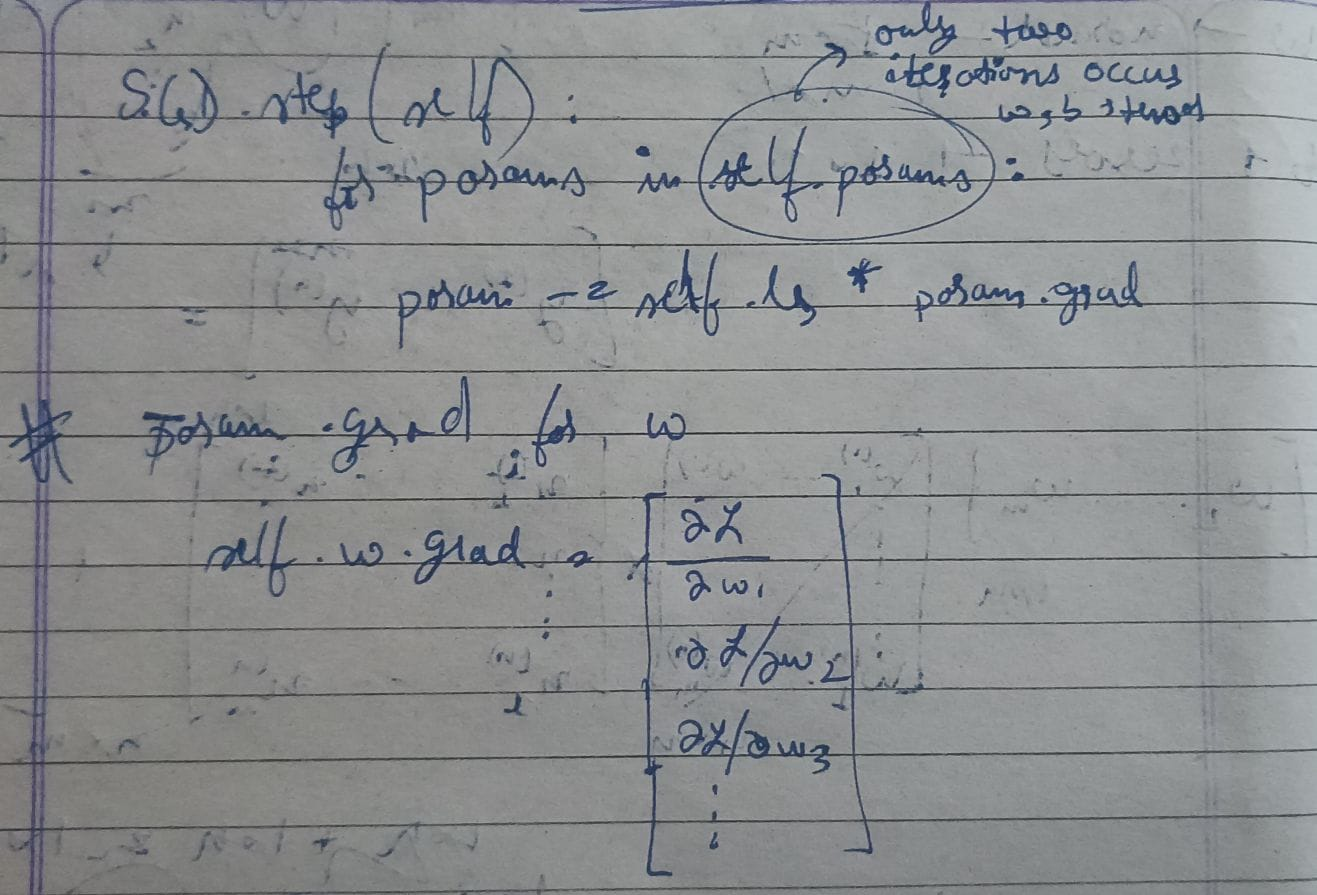

In [59]:
from IPython.display import HTML, display
#jpg -> converted to encoded_string(base64 string)
encoded_string="/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIA38FJQMBIgACEQEDEQH/xAAuAAADAQEBAAAAAAAAAAAAAAAAAQMCBAUBAQEBAQAAAAAAAAAAAAAAAAABAgP/2gAMAwEAAhADEAAAAttCQz0Y0pri7IE+cCuxaTgnXJkejJoMKiMPWRhoyqBM2EihUygR1vI5dCMm0ZNhl6Qs0DBsMqiJ5rogXRzuwSdGRK6IroZy66ERVw5n0BznQHMdLOddLObTnW1l2LOwxnoZz57dL5+fTaeVv0kee+8jg12hxa7CXiXcHA+0rk10M53dxzl2Qz0hzPoREqyKuEC4c66Q54d/BqFy8vO+hRB3Dnd2cx0ZJFgk3siWCLqEnQMKgTe2S1sEaUIbE0htMeWAMBgMejJssmqsi6sgXK8wTzQEuNuVm8K5pBKwAAEwQTQ0ApayF8MbTAQNADQPGwzoRkbGwBPJppiGCBBpMedIytMxoA0g0IGgGhmdZ0IAYIbSNCYCYNAADExoAaAAASNNAxAmgYmJgAI0ZYAhmWG1KqHk3s7zzbHZ53Z553cuo2esvN6ZepMzUAPiJbnoLk5Y7rcFi9PH9gxrxO6u4TxWlk1rLNJsSwzTzoeNApUkW1PRp42DWg1nQNCaFqgAYg8xpzQAHPeFLq5ugYKNIBghiY8iRa5bGmNUxogUPLKzsBLWTaGCYIAbyxgANAJiBD1zdAMAEwTAEwaYmAGGbEwQDeGNAGss0gEAAmN50JmTQmAMS0GQAFoQ5m1PJumA20EnTzbPRfB2FEtS45ejWpvi1Wlz+go4ezRGOTWq4OrXZQ08VZ0B5nqw1K+f11OCXquvJ6qbjhXbasaxvFxp5AeCjyzD0C0ANAZ0AtBlsDRobTAYjBU0wBh45ZzUVYIx7OasXx0ESxEXXRB2CRQJY6BIK4YW2syokigSN6MG0TdAlvQZNi4NoyaDIaRMBMB83RynRpI08M2ZRsmzepMoTkdKnkrPh6LOx825akmUUwq4soSCxIKOQUJ5LuLKkgq5BYiFiWSpNFXFHRzbZtzRVxCxILc/Nezh13cep6OZ6xrl7E7LTzznRSOCu+O5y3N1UkZtXBlVHns7l43VXoktZulkNCAWmYVGTDRhXwTLsg7ZJFgjnoREqGCrIurJOmjDoyRYMbzmypILEg4xPOgCjm6OatdHN0gMgAAAE+VFquaplajSOY6cbZz2gVXa1AMVMBGkZGzLfDZ2C1DYCYA0Cg7UGiVDBDEQwGAcvVy11cHocKdfL2Ec9uXoXbzoTCExUwYloEtBltAAAwBBoTGgAAQwWdYKghi0LlfTS0iI0YAwBgQXFqerxdHk13cvVOw13+bHN7fndC7eOCKxtnebV5c5tKVUtMefWz0eHs4peuvL1Q4W5Tk6K8+pfGeqVyh2xuFOUvvy+yo9nB11YZi6EDANNM086GDABBopgHnCedAnS5+nmo6ObpG8uAYAA+HuSZ1yKulKxz7h1gBLrz+/hs6d8fZDBqhgAgI1R8N46nXyJV10zy5vY8ajQBy9XJ2UmEqGgBpk8v062Jwc15Vfj6+Q7AcLi7p1p8/RALUIapgCYAANMBMAAQwBgACzpA8aHPYZ3LJaU+Wz0qcXSaWcrpx0mqwZXUGtefWkpwd4edn0SuOXp8VnN3avLxWuSyl1IFoghdEZdZZ59OtmW5y0EGKBRz9DSfN2BzauzPP1ZPPt1apIxLQZAAPWWaYwaYwEYFAB5yamkxhzdPNReHSIZBqewADK507MnHR3Roc3Xy9IPk6g5OrlsXTlRVhNGp6Nc1spDHf5e53c3dzxzejyZru86/Mejrg68qMJeTp5+itJOVz3w2dL46pH0eLsptGbJ5tUnyd6aAlHlnL08vVQ04OfpQgA1kNAACGJg0DQxNBpAAMznGDWbs5raA5+gMbaCdQS0A0xoAQiapijU0nRjFlGiNCBoYLMa6DPnp6RydcoZRTh7PN1PTOHty0El5u3z+3UWHA6d+Z3FXzyjtfldtU4+Lrs9HUOjNQ1KwY9ZZppg0I0ykMPIViaiWRKHXCsXn1EHYiJYJFWc0PQE8995XHXpycXRJJx+guTU6s9Wc3lrjrWJdS8dOkTkvVnP5vt8mo8dZm8j6Q8yHqcG846n2rPN3i8HRPrqDs44tO9cNJ99keP085vJewcS7SvJ7ufvsmVM2brg5blSapojz93ON2CJUJK7IOwRLhznQiLqEXZkc2yY531VLVCJqoSKomqowyhIqEizIOoSKsiWCJYIS7CvPz6YnK1k26blg7BDm9GNnk9vZuvL7buPIvbVHL6Mo4unpZznQS8N7h5s/Q3qcUPYyeLj0enU8+dOyOfXXiXi67OIlXLMpskVZN00SdRJb0qZgOB43mjTVc/Tzaj6Oe6sCMhoGAAAAMTBMMZ2JB9IIBWJiaBiYwQACYIuDvnVQIGg57b5K6zm6I0JiTAAEwGAcVZ01LMM1QOgaAGAxA0mAAAjQgYmAAACGByVComI0hgzJy9Q2pEOyN6QENAAI0JgCGAIANZY8bDlKbsZzdMo0DExoBawxpobWhAA0xAA0AAABkTNCYNA9zZtpgwNC0gBSGHmMeahlpz9HPTvC4DUAEMzoBMABgBKxUasACENGgDK0GdAMRQAAJAAjvn66aahtBpAMWCiMmhAPLGIBjFLTDeQ0kxMQxAwDSAAA5+mR5nq8PXqVAzQAYpkeuNQAE/PrZ2Nal4Ozk6rNcXVxnpZTlAQMBJoeWG1wd1jQSiaBEy7ls1HearzWwUMahnP0DECeKAAZpjJR4RszoMaybWsi1nRlrRkaG0DTBMyarwdllTLlNJo01QAecMzpMVHP0c9PohcYlDfB0pTWXKxgCBiBmclHPRoQaQAAAmAAAxAxJlJiTjvLdPeYJ2xpNc359FNTsJrmjpfDYutQKnndFk+zlxXfOnDHXrybV6DlKXrE4E+A7zn6AAGJjEwykbJosZ0HJ18tdQ8Rw9vkveV1cvoV0gc9cHdx9li5XUumpXlshvPJZ025NVo87dL1scp1ZnOO1cyjqXL2Cbgt353oJp51Lx2l0Wef6GeU7GnLjZg1nNR5YEdo1is6bbhpTNaGZNMSaBpjACNkR68VsxscomWA0Aw8cus2JcqEeyNs6q5EuRHPQEDoDnOgILoCGekOXdwgXIgXZB2RF2ZznQECzIlgiWCDuVz46uVMVOPU6OXq6Yjvn7lhzeio4adTPL6N61HydDjXJ6Xnm+P0+eo07+Epz+kS+Rf0N2eVD12eZvrrHHXFzz+xVMOupYuwQdsnFno5tQXTiuH1C+Uefv5Vpx9okObv49Jdfbz5c+uiq+Zv0EeT2z3qbynkbn2yw4PS83Ud+xx5mfR3XnW6yOHHpB49PTK8eftZIT7Jxx9M61ufXyZpu4cUvTLOY6CXnfQHM+gILoCBdEiyIOzOcuESyJFg53fJIsyKuESzJ6qyLuyBcTnfRipnQHmMM0AtUL89bvz9ACcgLBUyGiaNPFVxtMAUaEwAAAAAYAAPLBiKY0S5tQ3n0vJ6eJPYOXrzrh7sUgYDBEYXdjoyUzoOfoaENKDBNoYhATCVQ4+rSExg0wTAEDEwQw5epBrk6hoAGgaB4ozxfV5r7lRmLlsFydE66AIQ0AMQwS0hNMBBoXKPoNUhqBoGIGIGIGgAAGgAAGgzpADFnSHrOhDAaDes6G8sYCNp0AHnAZoxWrm6IUdEbAmSELgY2zl6NBnaagOAABMBgmgBoGgBoGgbCgGLh7uezNp3EwlAaAAwaxVI2dDSlbywWlAmUmEAFCeUbAE2JMVMcmW0AymhmRgAwTCC6JFDl6DaGJaAYjn0lZ0gSiA57tgDEACYJpggE8xOiCsQ6QGIAATAAATAAAGIAaAYgABoQwDK1kesbAAbyzWs6G0xgI2nQAeRaNZdJOMwvHVOiNhAQDQMwb1PaMEoMgTQDQxAAhtAMBmXTTAaAaDUaic/Q0ANUCGJgCNCBoIHkNiATQwEEygATQPLCVHkoc3SCGAiBopiY00DyDeNBCzOXXSA+YOkhk6Vzs6CLKOYUJ5LEAuQZZwVWiViC6QhcAEDQxNAwAEDAAGIYIYIYAAgAYCWkJgISNCYNI08hTUtFHhmxaAHYAHh0KSzdCWE+qek6OxAuoiWCCthBXZAuSxdWc50BAsEC4QdmQLBFXLOd20czEPFgzjqwc+74MuqMqwsVdEXVkVYSLqLEuRznQkiWZAuzm1YqK6ERdQgWCJcIFg5902QOhEMdSIOxENVdRLcxtU2QLyMlQm96Ilgk6hJWCGepHMdIc+rolqgSLIiXCBYIFw53cOd2Dnd2c50BzPoRAuzmXUHNq4cz6A5tXDnOgOc6EQdgiWZzuzILoyRV8mCrIOwS1tk962SLMg7tIF3US4eH0p5oLNqy8aUtGsMRBKszFZdCDQrE4AAAAAGmJiBMDOsVsBGjJsAyaYJgAwAUAAEjQxDQxNUNI0IbzsTQMQAwQ0AAJgmtAIGJiHg086H5/oebZ6A1KclN2UbcuWAAAcliogGmAAwA5482p3dHmVO8xTNBoQIaYIEN5DQgYAAAAAAmIaGJoGAKVfMs9MTlaAeWBnWQYA0DEx7xo286G0xidjAPMGZ1Od1ZOV5ap083RDacIATbEDhMQxMAYloEIGCBoBPFUFk0sbTZnmOoxses6ECNGWMTBPJoSGIAPOPSDBojUNZidGJ8lekmRpCGJi0kaTkafBHU9dJ5rAATBnKdXk9fFudvRw9+XJ2cXao8uG0DedHken53pagPmzegyzSGLSZ5nD7HB1x6N+fo56GnK0AlpANB5Xq+Hqej0y3GzlstTOoedITyxp4NLnnZ2Nch2GdStJh53fwanZSVs0EwGgxvBp42CGIYPWNmmtDaYNOwGHmoM6AdTnSWm7RrDBwJkAMQ0MTAAGAjQYbQhggAxtUxolSdES2CZMprMyxC49QsIaDFMHPLo6dTnnhENV7q55wuY7OFjpydCXtxxl9POzNYZNc63ZzHXQzLogvLRV1mfXpY0DDGeWep6flXzXXDshlw+t4npaT6+MjsedZrCRbGeeub1OS9lfF9ryTst5/oRppyjAXN0sztAwAAFyPtsjKea5+h9leZeHaRztHDT0hI81+c9UZjRHk9Czin6UK8/HRXUpKks06YzqnL08tnp65bc9VWA25M3HWCmo6KqaLPnZfXOzo1zaOh8+joJas2ZDylczqBcOXHTPbFXSJFiJOpEirIOrIq4c5dkSxXPPsSc6vsiugl53dEFfNYVw5X0Ik7EQdlUcdOUnjrmT3TZzu4SVsnBuXVqYx3OXhvcjhOzVQ1Vxz6sHnX6ioliIz6cEzoZB2CC6AgrhJdAQz1cpCXq+fqb5/UUedTt0vlX7EnmUtqtOzzYy6w59XCHN6CPPPRVnja9fz9Lu5ixLBEqyK6AiWCBcPOXdjUNWM3nOgOZdIcy6cnPq2iMuwIurJKzOaVKWcNK9VQLrNjnoDkvQOWtAxpsytBnFci0AAxLQLaZt5ZoAFrVkS4eYxZ0xMnjWNqUlWAZABDBUMIQwQAAqfP0BClBGClYmJPJtaQAAmCAJ7zSh5YxgAACTm6eXrA0lyxQwAaBpgCEALTl6kka5oN52ZaBghtMS0hiYjSBiENnE8a1OwDNAAABNDAPP66lJigGCBgAAAACWkMAYAJglpGRgPLG0DaCE+ssAJRNAmAAIGIaAaBPI2AJgABrOjWs6HvAaadgAeaxZ0xMljWdt1jbJiYAAADTgBAAAAJuk0QwAEAwGmhtAhggBLSo1jUaM6BoDOsVDqjRKGNSsQAAMBAxJiA0A1SzRGdoGhgAZ3KgMBiIYFDQAmCYAgYgYgaGAIAAAGCGkwBgDECGAIYJoG8saAE0AmDEMAYAAAAIAAZkAYAAgnSZrWNDAAGDQb1jYJs0LVgAecmZ0h5MZFtTeN5MQaEQwSMBWgATBNA0wBiaYgQ9ZYwQAwaAQCYA0wAAGIYIGJgAIbQDTGgABAAYgAdJoAeTecI3uNTWWC0iBmTQigHCApicICgaAAAYgYgBoYgYmIYAIYgAExiAEjRkNuYbMMZlGzCKuLKkgqSCjiFSQUcAupBVwC88oo5IuRRdxCzki+ufRdwDocCzoJB5qsZ1Esq5lXOhrVMouoRLqJFgk6sgWCJUMKoRLBEqEdUCWejJJ7xZoo5ZKwSVgkrBEuiRUIuwR1RkSwRLMiVZB2ySLc9mlPqJOpLLNwg6tI6qiasVJWCJZkCrJFQkWIi7BJWCSsqkWUSKuoliJFSpKwRVwgWCSuESyIq7IqwRLhAuEHUIFwkWCJZEirIlkS1QJvTMPQYKBg2GTSGmzJpCTBMAGhmWPLQtJiYA0wa0DGGkxtMYizzkPOkNVJC0pSdMhoGJwAA0wBA0wBDAAAAKQ1AxiYDABMEDExDAEwAGJoGJjBAmBG0bIdnH20DM1DBDATKXF28VnVTLlY0AIbzpBgAgaYIABOBopgQAUAAJiGgYAAAAmAACYhoBMYmAAAACAaAGmAgYmNAAMTQMQAwAQAAACaG8sGAhsGmMTHpBp5ZoRZ5zDOpGZam+H0OPc7KweLZ8fZA05WhmW0MRQ+KidKxobxtRTZsMGjDTblsHlm3hxoQDENNWtHKnS+XpG0LpJw1lmhMAlZuMFqb7eLtlGnmgIGmAOuLp5O2wI4jpedAAqbaIaGHOXAA5eg08saCBpgmgB0CYAANAAAAAAmgGhaTATAGZaYmAJgJoBghoABiBtAAACDWQ0IAAAAzrI3ljEGgYNA2mPWWNgMCzz2LOs8fd5251cgtTPZDtid0YrE5QAaAMbK4F2cmsx2/QrzvQjzHVKdi/NaMbv59yi49Hc+Zy9gnBrLhiYZ49adfL08Cd/PjFdvI4Hpa5+jNI38WvYcOiHwd3BXZHHXZydnJ2SgLNYAC0KF+LUtfPnndxzep6IzFbzoGgYMzw93JXTiU7OmHbyS9Gk4BgmEAAA6y0xNBpIGIB5DSQaMhpYDbmFCIWJhQmFCQVJIqSCxELEQsohZRC75g6TnR055w6TmDofMHS+dlyOTozALa52XfMzpOcOo50dL5tHQ+dnSczrpOUTiL8Uq5++epiNefUXTnulkXeNc7uRB2CBcIO6rnl28lix2c2pgu4yurmljWnQecvR0cL7GebrvZ5e/RRBX1lzHSiRZ1zrpkcvNq25q9dYvnnoctPzvZkcz7g5jqUc76Eef170RLEsDoVQdmQ5Ovh1nfL6BqSn6eM3OegzYT6+c0ukOd9AvPx+oWccfSyeR1dzTmOkl5joZzl2c50o5y7ILoDnOgILoDndwiWwYLBJVCRYIZ6Uc+6hla0YegSYI0GTaEMEwAAEwQ0MABIYAAgYhiB5eTTxoYg00xtMEwNZZtp0wE88DOjitPc5euF9TNsLLpAzpg4AAABMrm5++Fznp05UAuU9iGgaRtToMWDb4+xBMgBDT56wdfHqR9Hj7INJ51k0hiYAACGACaAYGM0s870o0rfm+ly2dGufozRMEBK8bVaaABDARz3k0AMQDQNDAWhJgmgYmAgYkalSZqdkYpOg0AwyDzozrOhoB43M22gaBoBMQwAQwTBADxtCBiAAaBphl5G0wAHpMbTBpjBG3l0xCcIjOmmq83pk956YdGZanP05AEoAMTAAmzdAECFS3jRpCDGkZemklWRSkwqZ0CaHDoRDHRqkRcWM6laATzoYIBMYmAAnnmsraPHWvQ4OizohczU1goIAZAgNCYAhiB5arU9xLoZlgMmG2mNNDy0MyxtIazznWuPsGAE6ZNGQ0hjTQnOgABjeTTQNAMAE0DAAQwQADQAmCAAATEPOsBpMYmPWNDaYxMYA9zpQAnniedAFQlvepTWXmzqMaCAAABiBvLAaBNVG09jEDAgBUwBMYC5EtTGh0y1YiBDMsDQgDSAGZaYDQxAJqzGhGtIHlwL4mi9JaGBAEyoAAAly104h0mm2IEMSG0wEwAGIGkGjIbeEc1+bospg5pexZRTAjW5aKE0a1FlCSLEUdDgyxBllEKqIdGZ5OjMg6FBl1BliKLnOyxALqIXOcOjGMldc7LqKKVgHU+XZbXNo6DnDopybs6DnDhLLOpFlXG9vQ1TWUlYiLqElcIF0RLhB2ZEszndSoa3s5zoURLZJqwQzV2ZdBcKrIliIuoSLIkVZEsiRYIlgkVCKsEnUILoyROidnPooMoE5dIQ1ZEi6WLs5I56A59dCJK6rzaXWoi7zYLogY5ey9c2rkQeMWbpz96xVyIurIlgi6hMoHD0yvYnslwayZe2YNhlaBGKiGGcVkVAAMGzCKLNDDYIYAA8sAQMQMQAIYYNYaG84KgxMAplG9wsMAW8brQCeeBnQmHM09razrJoIAYPLGmCGCAGIHnSMUAAAywEwTzGy8t81djyZrGhiYAxMQ0ANAxA0AIEbyxiagnQmInjQwapiGADTGgkaYAFQB1V5ca4O/Nc2Dm1PUJ2xV59XqdQnmsEMAGgYmAMitwrqScJsAABgkwzoAaYgRpMFnQZbBMABiGCGCGgAAAQwQ0IaHjWAlUNMAaY2ma1jYAA002IrgGs6Ew5dZ1tbSeQNQMATAaBiYLSE0DTmbaYJoAlVVxdqc1+XtqDl1AwzRoGAAmAtAp6pscJaZmduDUz01glm/OX0GEMBQWE871PM9PUGGdMTDOgQAzLTYmMTOak7VoHBy9cK3xnbZzPq4iN+jZxdnF2ysTgEwGCGhtAcHfxV1sIAyaeNjEwy0DAAYgRrLYmgGgYAJoYmJgAAgATQMAAEmCxpCYwaBjQ2ma1nQwYmmaAs4BGdA0c2s62u86yaFD1PY0wSYAANAAAgNAqzya7LnglXGpn0+Sss+rl6peTr5OsZjWa2sG3OhzVcNToIzJU7OOzsGY1jcdWV4e7FcOsZ1m8fQ4F9Lz+nhi/d5frnDDeqh6PF3wCzm0M5Ns4Tr1xY09BrWQAac9nN0ef21ptwhoE8g54LHMjqOMrsOMO0nuG8BRYZoxkpx9XLXaYI1lM05aNk0VWJHS4hVwZUiFnBllEL5ki75wuQC7gFyAXUAu4IuoI6DnZ0HOy6gyucZKvnZcijoIBd82jq1y6Ol8NDqOZ11HOJwupnUSpXHrRpQqZSz0Zjmtt1N71EVYIujJFQiXCKuiWejNQOvCeX223Z52u4Xht0wOGltWStd5sM9IvPq4Q5+8Tzl6Srhp2KIFhY6sjlnp6zyd+emWCuSxj2icmO9HHToDgXeVzS7iIumiUetnldfUVz6s4iujJDl7HXL0Y6knDr3L5h6Ss4NKlFKmbMoySqyKsEXZE1VkXVEd0DHL28tXWyMqqJvYYewmbQjQIbMjAGGRgmAwAYAAAACYCBiATAExAAnkAYAAAAw1rOhgBpMYyzzwedIA5dI6OlowM7UDTBpiaYgAYAAJayaGhiYAxABzdPPZeNYV0DM1iBgCaYCBoYgYTo68/XcrBazmsQNDAAQ0MGJN1PedogRoAAybAOe7Di6+fqo1jcOdAjyU5tz0nwehmwrzTs6dczOtEM3oM6BpGjLGCHC86eo3DOlDaBoAzrBtoGJgAIciggYkaeWNz2MQMQMywABME0AMEAIaE8sY0DTBoNazoYMGmMQnCBNAKufWXtdp4NBDABoGgE2hoYgAQG0AAA0wADOiuTo2IASgAAAAJgDQMTAAEwQADQAA0wAAaGgrm6RogFGhGmjQAAHP0c/QZpjYNB59uh6AGWRshYdSVUDFDytGkMyaBDRDo5ugYIYAAAgNAhoBiYc+6CTDL2jOs6FvDNCYIAaBoAABAA0AAhow1oYmAAMDWs6GINDBiE4RqaaA5mn0dDy8AHAJgAA0AADQ0wzneTQweWhiYmA0ADABiAAQNoE0waYIAAAaBoGJgAAwQwQ0AFBzdKAJWAgNGkMADnvCo9ToN5YACYhDQmIYA8LmrraIbwzTwzRkIdHNY28IoYDZgGshUmFHJlFhFCYbMBtyCpIKkmUcQsSCpJFiIVJIsQ0VcQqpoqpBtxVdKiRbXPos4Mu4MuQZ0PnDoIici0ppLaOZt7UVHlMoRJ1Rg2GCgTKMkrojrbIlWTKok6MkrBIoEyjJOgSdUTKomqhNVZEqEnUJOqJlQiVZF1CJUJlQnmoS1RkSpUlfCScewiWaxLIkWwmSjJKrOZ0wLVNElXRFjMlgirTOKvN6epMtmXi6J9RNVIk6Mm9slrYcl5dNYe5RpbDL0EnsEaBGkIYI0hLQIYZYwEGgABADBMAEaSYhA00CaMaAYmJtiYD1nQwYAxgJwgTSAOdrW1mnkDIAAGgAAAEwAQCDYgYgBoBgCYAA0ADAQMAAAEDaAaBiBmWNMEMEGKo4VTaWTaWhMyDBWDRZ0GdJiGGYdPOWQjeeSllOZz09J8/Rm4828tTp6PO7YrxVydK57S6MbhueSwmMjqpdHPU2EosT2NpiaBgAAAmAwTQDQNNAADTAAABMQ0wEwSYJiBNk0wYI086GDG0DaY2gYxOFNTRnQc28b2s08hohiBgAAAIY0CaBGSoIAAzqVVc9DMM2BA0xGkAAIBgAhiaYAAAAA0ANAk1XPuwjySLbnobQMQrEDTSMAABc/RAo2ye1SuPOqamrRrm+f0lbNYpxyvrXFYsXKguhHTyZ7ocOiEuK5qc9JdBvDcLQhudBPINjBMEDEADQAMQwTQMAAAEwAAEAAAAmgAMtAjSAGNpmmg0JjAGMTgGTSHk52Pcu080AgABpgAJgAAgBAjYmAAhoaZWNiG8agWKU9ZcCAaAZlG0tGVrBsyzQmAgBMGAgAMujNGZZk1hTSu86GZFYNGCGASxz31OgTzW0DWHQwidkxc501nn6+OyfctSpDgecG/P78aks9DObrheUecQ98zL7nszhOrAo0ZDTyGkkaMhoQMSNCRoyjbmFFgNuQVJhQkiqmixJFSLKKDq6kRVyCu+fZXXPos4hd8+quRE5iRnVlIMKetzrJPFqSZQwGyYbMo2YChgGJDEGxAZaGMEaDOdIWbOoboGChE1QMFAkVCLqE1YJFGSVkTKBIsESwR1QJFCo65etDHQlgugSTqE1UIFwk6hDVGcWqOxOyl59V0RzTRHdAm6BEsEioSKBIqyRYJKyJT6ZnNfPRXO7kR1RnDnvLOS9SWZVEnRkioSdEYVkTKBNVCb2zC2yb2jL0CWgRoMjBAAtAkwwmq0ChjBtMbTBrQDAGJ5y2TWNGKnqW9TqAxQAAYmAAgABiGmhLSGS2aBCmasokS7EADEwAAAAAGgAAYIYACYhoNZBiYAUubqmnB6UnVQIGAAAJiaBgA0zE6TqwEGNgJoZljACZCut5I0hiYA0DQHKdaqF4XAZCGCaYDBAxMABiAAAAATAYCGhiBiBtA0AACGgAAaJsVaQQ3lmmmDAess0INAJwic0lrJB51t0NPATyaExrSEwECNGWAA8aDOgBNAMEANoGAJpg0DQDTQADEwEDAAAAABiBANUwBDBMEABoBpgJgmAAzE6TqzThcvS65Hfjs6zXCb7uPsOHq5mdL5OrN0JgJgCNGWMTOfo5+mgCBoBiGmAAAAJgmAAADEADQAAACGA0waBiBoBADAJmlQNQmBp5ZoAbTGAMBOECaMuVT3HW50MMXYiDLRrc9Di82ZvgKiJWJgJgCGAAAJgCYPLGJgADQMTBNAxDQwAATEwAYIAAKBoaYIaQaYmmAAAAAMSFz3jVd5wV5ezz7Ojh6r1jh13Jo49y2o+Y5M93Dqetlc2L2Yzz1164eiLHAzvAlh0c/QDQMTAAGmIGJgCYJpgCGAAMQAAAAAADQPLGZDRlGjIaMoZNlCYbJou4ss4hYijpOfRc5yyOZGdUzLVZ3DWnW4GFyDKaii2Zso5BZSZVxCykFnBHQQZZRCziFlMKLKNmA2ZBgCbBDZgoEyjJFQi6NIlgiWCLs153Ysg7BEsLIqEXUSJYIlgiXCKuEDoRBdIck+7y9TseOnNlnoZzrpDjp0BzR7uezWOlrwL0EkcdLl4Ndrs4a9OTz7b5q6dWWbyXzcgXCDsEC4QLhF2CKuHO7hFXRF2CC6UQOhEC7OZ3Dndw53cIaqEXUJlQk6BJ0DGLIjt6MPQTemZbYMBgGhMYCcIE0JqobxrSzTwAQwAExiBgAAAAxAwQxMEwAYhghgACYADEmgaDQAmAAAmkGNQATCgaRMAAUAQBmWAmAJgCY0mc3n+zyanRoeammAAAEd0KTCAAAAaB40zlrVAmEarJQAAAAAaGAIAYgYmJiAGAACYmAAhgAAIAYgYg0kwAE0DEDMs08sYMAYaQMA4gJUmVz6xvS6ZgAADMtghoYAAA0DEwBiaBgACNIAAAGIAYIAYmAAhgxDBMAAoAgAoaAAATQAVoBoAAGIQABoHydXNVwcMyzRlj4e6ZsABMABiBgAANADQEL850ADEAAMQMQMEDQMTEANCG8sAAAAAYgZlgIGAAAAgeWIQaeWDyx6yzQgbTNCYwK4hGaJqoazvSwPATQAjRljAEwAAGgYgYmDSNIAaYAAINCAYgYhiAaEaAYIbyU3lqwEaHCadqAEDAAEMTAAAAAaQTQNMOXp5a6gUAwTQaFA6AAGhMQ0wGgaAaGCaCF4lWMQ0MQMTECNCBiYCYCBpoGgAAABoGIATGgEDATAEaSDIwGkMSKamzbmyjgHQ+d10EAiombfE80OWtTrIZzetRIqRCxELODLEkWIhYii5ELEWWUQ6FELEQsRZbE1XQRUXIMuoouQaWIssQZYiVZQC2+bZYhooSZswiuRDQxMBDBLbMKiJqwSLBJVCLsiPP38lbe9RIqyJZEYdoSKskrBF1CSqyLqEirIlQmrBHHQHLTHQSKhJ0ZNVCJZEiwRdGSKomqsi6okWCJZEnRkSyJFQkrhEsiRZE82ZFXRNVCRQrBQiZRGHrRnT0Ye2LQxGw4cOa2moVqiLLY1nNqBCGAJgGRMxW9pwAhoAnSNm2kVMtQwixliS0mhOUFz2VfD3G2gYEAFLLyZoI0wEgNPDNYQVEA0DQA0xMATABDAEDExBzdXJXSJwCDSQa5d89dwENAAMzoBNMAAAATAA57Q6KAIGmJgJgAAgBiAaBiAYACAAaaAAGmAIaYIAYgGmZAGAC0haTHrLHrLNNBsQcOdEs1WdY1jelc7MBoB5wUWd086CU7sldA01AIFgpYlpg0KJsyxGdjACEmJltUzQZYjWBEb6BNgPOgAAAQ2CaGAJpjABMAEDTAAAAADk6+OupNQAxDQhsAATQxMEwABiBghzoHPnqK8/u3kAIBgAhiQxMaAAAAAQMGJoAAaAaAGgABpMaAABphlaQNMABvLGhmnlmtZ0Aw4WiUxudY3jelQMAAAyaytGWwTAABiBsBAAwE0A0wAAAGgBlmXhlDIMAQA3lFEgNZDQgaaB5YwAaAaBhMqIGJgACAYANMnzdnHZc50vUxQxA3lgMBADTAQNAMQaEDEjQkaExNAAAIGIGCBaBNA0I0JgCGIGJgCGJgCGDEAAAAAACEMQaMo2Z0MTNPAVcdFSQnOJzTjSVZ3jdVJvLZz6KuYUMIoSCqwG9SChIKkQuSRZxCrgypNFiQVJZLkCy6kzbmFXEKkgqSCpFlSQUcwq4hbM8nQc+yxEKksl3Blp5wdLiFiOijiFVNFnALkQuoMqphtYDaSNPAbMMaEaEDMsABrSEtMwbDBtk1UJOgSKomUZhUyZKBMoEntk1UJOgSVkTKhNVCb2yRUJFQkVCaqEnQJFUTKBLNs1ko4k6BJ0ZLW2T1tmdPQwE/8QAAv/aAAwDAQACAAMAAAAhKJ+6nnX7rTrLTT51iaF919JV1brZ5zHbTHrTKZdd0BhPxiSAIaaOCOGOKhqHPu/ym8Iso40Wau2SWGaFP6A5kL/cE4tdBXFpBBFRVBltBhVVRZttNZJ9VNh95htdVtMII4oEUIA4wgsgK3ZY0YuC4YMKCYaW2eSoI67RRAA8eqUQEIVnohndJxV9d9hBB9ohtZdph9ZxxtRJ5d5lI4QgwkSOsX5SFIFzO6gwF4cOoyu+SmSCSgkgOzRx8IUO+s8QshRc1J5dBhEMAVhhKVxV59hRzI55Jd5tl5kAcEkESEcQXLOl9RZlqMJcqMia8eSeGeSKsAcmOdBwOEOqQw8v2ff1sxUs0sVDFlFRwYVlVt/L69vtdt9hdBMMcowoE4sqe0QI4s5o+tyG1ghJm8fT+gyMUQKSXt9K4y2EwMDnhiMObwcQ/h4++E9g0JYBc2Rxp71JpVFdpVRJ8gUqTDkRxkbfe9dy0DXfLe0EZbDHsYQMo6+zBBQw2a4Mw3z+qxh3kgDEF0Uvh0c9fVtkHB9NJRlthlZpJtdAKS6GKGwIYe0T80Ad5JKCd/WY4Mvgyx0USinR9AEOCMQIX9FXh380fPt3PTEZ0B6FTzoMJBXFLltJJh1VhYsqQUcI8gsYMAMPPiEPoZonbwCe0oWQBsQIGHpx3unGMY4IkMwzfcIg4ksBixpE155Fldw9nZxhZ9dN95pxuI08me4cM0UsgggCfKk8M+808oIssO6Mssui7J8j0CWwOKa2GwU+2C6iMUh9ABlRhdN95E6tNtZhVdfpVx8mA/5nTcEgYA1YU2G0A+OMA0QM4UwiqCkQm1O3FxSg+yMvWyOe2O2WSqOqqcNi3MEYOKF/5HWkhKJVtZaKI4mzdUnfQYTN4MyTpUdsx34kyY2QISWem8UaJ6Z1xXhyYUcgwMQ8iyCi6aeOgvNDsDb1HP1NO5xTfrBBtPgD0XAr8yYXqaHddz84/wDEk45MEmNBCMFEIjgCEot9cLzFiuXdbaOLiisgouknBBJ7GpVU/SQ4FNDXUf8AmnX1llefnGXtCHHIARhCAhz6AUUxDxyiziRzhKDAQA5cHHeBablVlsxILrKbK7aoDjr6g11AQSxYwZw2XnjuPVHFlHPFlUUuH3/AwCgi47YzyxBwDjxwzxxi6jQwiJcH2F9LaySC0RpaY6a7IRCDz9dgxhQQa4r4MlH1FX1kvH120H3I4Nc+ddvoDJ7IhiQAyTRzzgTyBSC5ySQxZpkyX7ozQTdnKrIqqo5nkb575NTxzmTocsM0UnkF0mV1fSMH3W3m2zJ45aQDjCCyjxSDwCDCASwihQ6CCyD7P3B8izAhB8Qra5a65KzVUFv2lwBVnUjlUm0HEFnlGG2Xid7/ABtNiJow8SiUg0QAU8AEAAgYsILicYG0Mc8+KJBQdwGgc4qGe6ye2qUEVV9J9NZ1Ft2ltIKxNJlF15l1nq3S1tpWDEZw995IUEipUccMezleAo+ckWKcwoSCtxa4ckAW6yKWiuO6uUs91hZZpxN5pmU6P1RFb3crORtU3oVlVENOn9g/tNNHSUwIZjyP2SYA46Y4SSUogq2B9Q+8k8+CqyaULfeuEY8mQllVFNPtb4N3FNBYE5oVH9ryrioNxnlAFFdhtt9ChLMwmoYTdyyiagc2Gwc0GWpB0uMc8OEi6+0Mpyqm2aS+gAAsFrQGeO2P81ZphBB5NxFZBBR99VYlxZBV5FxBVEwIkATgEYAoEkCEQAImGp9kiEaYY0q26642GWG+muKwuaiAfuC2CqbzVF9V9NhPht9RNNFZF19BddRVhxt94cIk8UsMoQcUE6kE8EKaZ9cGc2cWHeeqWq6qWmm6i+q6+u66y2m6WfLv5txRZFnnJ79P9xxx59JxFBIpYIcwMok0AAssAsYs40EIg+OtB6k8uMuWmaO26uOWRKS6amGyue6K2hXe6XDR9xdpnzDd3pPddJdVt5t1BdwQAo1ols0YkQ0tk0MUw8oISiCNa4OygaKqGiGKKE26mGeqm6iSqaG+XCWCKEroA4tltRhvNDBJ51hFNhFlBp8BAcUpE5R4Ud0E8sQMgwAemGNiH13j6+2IrVocgpppPvnEbHsKeS9dC+GqIuDpsRxF1JNPvXx51l9RxVhhJ5NoQFxF9dl9gksw0EA8Qsum2NGwuhFK2WoFSclZcyaVjbQzfdpcxC9wSOaxeOVJBNKtMt5nPptt9NtRBMES0w8I0UgZVtAYosI0UUIUEqyI9Xzn44miuEANTjiappxb3RTyrQKhFxvmkY9x5dbR05KvpJZ1JBxd9BBdR2bYQ0s04hNd1xtkEkYkAMQs8ywBSwqpYS6mAbrQAUsAAjbHB9Lq+qGOWW+9eZnZ2Es09hhFJRZRtJtNUOyMERZUFEgYkRd5F9Y804MQcgQ8WE9+kvYZ+eK6oyIEc8B3JJV1EZuSuC6K+oEJHdtDf7H/AEWTWWXUVdYdrlGGNFFBJJHBELBJPDOOCNNEADOEIiPWsG1mHrugqtlBJNjGLJUaPuvjtmjtjtdbSQ7Y4+zw68XZaaUZecZM/vAGALPLBCEIKKCGLDeNDNhnPmtjgfTlIilrlttvmrDNjlj9OIvpipBGCthjsWrdffGy95ce7+/80DecUQL1XNMPHDJBLLKCHMKABCLMNtroGrvjAfnjsFuqmsvnkoumkpabsOOlnKBCm7+uEZQJMOA//aiSCq6/dfbSOCvcHMGNKJGHPLMMMJABMJFBspONCHmwfkrhFovqmlqgosiG7LZLjounKupT4PQCaYOOCOfWakYW6WeWfcfbdpDPCHNOCGJIAEHKAIJIAACIlFCMEvvbtrnDjknkroulE/kV+SqrhYQcuZI7CmfsVSZ3KeQRsQRa/wAlVG1mnoggSyQizyxhRzyAhyHxgBjwoABwaowG7i5BKyr7p5ZKgtP01dnDCvwMyB0YxMeO3nU+4UXhN9uOsvtuVmjUXcASCzxkzChRTTgBjgzADyTKQTRZa7HrLCyLqrqaKLLYrI7vzIaLIb5qgdYZpIZpDH3F2U8okMqTGGf2V33ljwAyiymGrwShwwByxghCyCYSAT5KI/6SzwoYp7JoqpJqq7BMIa7b6qrpJ7b64YZxERVVH1/nUwlv2kEUnA65SDxhRlkLzCSQhixzDzSCDIhzTJ5IPJZizoo7L7QIJ57qJ5Kr6qb6J55C6rbLLLz2QWF1ltAG2mHXkX3yljaiAABSh2iTyTiwCwyRwzBZAyjB75LNQLLB74oAQA6YYrroq6bZ5qbaY54I4JIoxG9AAUnkupCb3P8AVCFggAYgc0ocFJEQs4MBE440I4k0iygE4ySDI+y86OcYQQUqOGm6KuuaeuKGgsIOSy01Vdl8hBpxDi3mkqXxUSywMs+8gs04YwssFpBdEkwQ4kaa2Q4E2GzUaqAmOCYMkUqW+Usk6q2CeCYqSW6yiM7bJlMQRth7+9YoPaFO8x4MKMUoi5BBZk5xtZRJAkwgcyGwYUEOWzym7IC2qCoYcueIGQE2IiaamKG2CK6qqMwoLBM9thh9DwGieB4YbhhOi+mk19pRthF1lJRoIsUYKY2gkqmABma66CQEw0Ak6CWeCaQICeWqiWOWGyWiof8ADRTbYfewQ2otfQaKQBAngrnRlKDNAQXMGNJEENPEGvBlDAnms7MJlkPKLJNNPhgiVpuvGLGnilohtqvgI7KYaeTdSUbTwnJGKEaMHRFPOPOGJCCABGINBCJGLNOJAHqEPJhs7JjvnEFIHnvEghgvAgvKHFrijkvjqjtAIJdXVTYUbK4iiZZfseZTUaEJJEAAEOGGOLNPPKIBDPINJsNHElv2eKZKPIGTVqCBkoDGJmmpmnpnkkpkrtNFJYSRUYRWoIXI6WZH6S33WjKKKOIEIFEGFFHNMKCHIBHpvFItkgWXKNjJLGlrEJAHLENDJpijpsgr7/8Aq23xS2m3VHXHG5nrauydv22ISYAzziQgBxhTTjyiBxiAzjRK7hQ557/mBzozhgwBSQwxhzjBjaYBo4bIpfoqQWkx2mm11l3mrnlGHH2m0hZDJzgTQCgwiQjAyBRBDzTxjCb7wTJIb4FkpoziDQwiwii5hQz7oo7qLJorJSpSzBkBBwgnGXnlk1fGnEEH12EfGxAAyCQjRzjSwQiiRDASzoqAhaoYA2jRpTTiyRiQxgZKDD66aZ69ee0wFuAigCiARCV2kEXH3MEWXk11lX+FAQiQUxjzSDTywhxjhzQiIbSao4gx8wEyIJ6o4ZwJppL7ogY5qt88USinnXHkm1F3kl2XAlnX5lGEnFmlHso2xTSSjRTQCTjAzDTQhxZzaDDzL7JyQVzbJ4KT4AKEVgQRHoHv2O2S4AVDgmVGkFEUE2XTk00p1EmHFVFnJ50iCARwCyyATRTyhTAwSpKbTCwAYKvJhYorgiwRYpWGRDzR78lF2lqGEE2lWHlFEWWH20ZUmXmHUlABUVdwQ3AQTxTGAwCxhxyhhhDThLqgwgQLKWGhLabqKI7aI6Y6Kp46Ek2G0k201GH203U1kF1Wl9qUmHF2k3R0UXWG2BwQTHxQARSgQhSAwwBAZ5zjARrPl3Jq4Lo5KK5KaKbIKJEkEXm013Wl3hX1XnXm3lHFkl13HFVHlUBjS12GThgjC1CTxxwiCgADSQxSKCDDz4//xAAC/9oADAMBAAIAAwAAABAuwf1RvGlU8dOkn2MVWEWWW3EUV0PPHGmk01vy0XdDk0GXbJCysDHVF+/9eXZxn4Ny/css+tO/e/coLbmv/wDv6/je+UtJZZv5NZHX7P3XJ1NBRRhRJNdxN9J1xtVt9l5dhxNbjPX3zY/JPlYXvxrS9EfrLjyXWm4qKqjZ5NCSqGEQUwZIcRnF1F1Zxtl1NFJxZ91BlZJdJpNVxZhlF5pVBLdKfsnygUsdl0LrCrAAkiXSSqOyqKauiTJ591ZeG44skL7g5hJxlh4E+rb7jv8AcUVV3qAzZTdTcdaVRaYXUwE650DXg7x//B6/1a/44w1xqronhuothupSfezV1oHdaVbRC+mYBICkoA27xuBOVXeEJwpc4aUXbdfReXVUV10xr7U81xJAYE0GFie913uxniJEigltpr7cQ6QpgNdU4gieB1vIIGouUBQ4uMOUzbMOzAi6QbVUWVeVRXa2xBqQd+/OZwAeCUzLNanD5X5QFO6P/lumnwTRcaorCaVSIyZGAQAsnE8alT10AInc/wANc8YFNHlFGG3XV3lULYbQC+sP2K0g8OtT95DhP59OCSXaUMoY4v32yjzq+GylJUM0/wDAVhVTG62bzfA0mQSX3L4ZY5ZdlBZt5POXr3nvnTXr7fd9Cpbb/vn15/XQW8M1zLaW6Llx/uVst1FUd5LhKE448wY5trHYfJlZxVDHihRNNRVxNVd9nXXf3YLP/LP7XLrkoQvPbqnrPn7r3WqbnKi+bBxLEKU0u6q+bN4u+Cqiw4Nj/TJdHBdpdjjTdtFZFFkmRZTfvHbpOLrj/wC7312C9D2YV2tz3/8Atd8tOduFo7P0G6TagQk65566ooqY4IqbjNJEjpSab73pd0hdpplElE10dQoBflZ/+IAKpCI8iNu9O/NIu2nceusvs9kJYmnANUL5xxAxxgDpKJLb6arAYp6Ib66Pd7WSkpq8km1tbU85c7bADE0rmOi9KO9z9ah0sfPMOet+8edMeZ7LMEOfSbh32VebzrJI77JZ4CTkPMc1Xv8AthowkdhrYZppJxNIOdR1lNTTFH3jTXl9ewnrHPPD3HzzDLbrTvia/pNTEe0xfrtoKiOCK+myuIc95W9BgHk464iA15pE/H1J11duy51nvPf8D/fzXJjtHrrPjXD7LH7fjvbbLiarBNtrOoYUK5Ey2SS26mowg2JXgEAgMSOm631ptZLI5T9BFNVK7fIIA08whhObNrDfD7TzzzLrPv37rrH/AIjmkfQQoqpV7zTutrsophQba+831OKBdAu475WbeabXbQa/QHovbz4x5XQaIz3z5zz05+0z/wC9stcuMd9vssKJP0GvhIe1Lig756rKp5S0c8G83QxVn1REHmH3WU1nlUlGVrYmW0U/fk2923sN8eOe8/u+sc+ctJx9Ntsf+fqZkGZeZ2kxBqIY5K6aZiy2vk2UF3HUvetYNCNE2P8A6VBFoYbMt1ppc/Rt3zLPXzHHB/XvZMn4b7PLf5LL7XyWpxN4ef8AaknruhotrvsFD0df90bQ5RqGjN7wz4d+l4lfIWrhWdyUtd2USB2d57bhlF1lpcrjmPaM78Ufwyymlcx//g1ComkoiUVZljGKKjE02eU7PiA66VsX4wz0wdAryG6ezsmN6qyZWeby5/uo2+47hitJGgM03R984zFmfey8jkMhEvqvRlxkprhgnuKEDAbhIptkg1F+sYTSSZdVV9gZZcebweYZbbV1446+y566V3x8124443z+6riQby7ogJCOmshtDmuopousoDnrmNQjhpil55SdQVbcT9aYcTaVWYSeZWYa6y988x87544y43214xx74076tuQQ9wnxLp5mmktqiqohqoiphjvtoiopsrq3y6SbXzYb95c5S/YReVWeeY0+x+403779/wCOeOestPsu+eeNJJ3Hd0d+WbL4J5Ir666HLIYaYpaKKpqav25Juf1Ulmn+NMkOnMH3020V1mFc9/N/ueMMcuN9ees+Nt++ev8Aiey960kasiyiGeO23Byiii2+uGq2+iKWOBiu+0840Yl5d15n9XxRd515dphBBvjbfXrv/wD+176++7+/x422/ojgUzIJLa696dv8roh0ZQ956FfMHskuRvLgvkF7pQKcVwdiS62ySbUQfZbebVw69w3+50xy4w+w7y//AN9N+Y6L2MG6BtZo7A5hmjx/hQGONN8RauZu4XuYL6wtSkH1EtleHnvdmnEU312G+PV89u+fv8Mvv9s+fe+efPPOY5T83RMEi57bSMxYAClZqQcufRCFMu4McE6gStUl/kmjIetUEkVlXWXFtseu0zutudcefOP/AHD3r3DPrHD7u+U9yAJ/MCue4z5gesws8lTDKUPeyKCuGmyf4jbdakAcNFbFN5ph1ZZFv5LfH7bfDzXn/rLn7X7/AH6yx87y5ngPQmHpP2vupuIqFJNOUQ4RZoeqqupiuoifjee2cy367yZ7SQWcUQXUhs0yx28+332/3yxy2yww85y4+843kgAYuBMqm4knj7xdnDhJPI7/ACJa4ZaLZqZ2M8sAXccf/A7sM/d02lkEetT+eMcteOv9/ecMNtdP9OdNf9e744E0YkAXf5o7qsPzD7ZIWxBKZZY6ppIJb7ndmONwc+eWkzyjfX7EF/8AvDjPz37rbPLDPjPXvTL7vnHLPjXLSm8Bn3hzCWm+uvOCiCee/wCLpnspuhimm++kBQSMBIE1yf74mcmWxdYXwyS809297/8ANt9ttvNd8u/PcU7PvN6Lc0fvinceccNebaIbTS+oYbrrrDKJDMuEA+PAxiQUUkk9beBaYFHHMPZMdOt+Nuvv+/t8vesNfuOvcev9e64rGO9hlN+/v/fP7R2t7y54Zrq4uouX+HdGXOU8eGM1eJP+fSpjDsNtd2//APffPrXDLbPnrz7HnbDT/v3LrqGMxTZ8jXc7/HvDqaOR6iCbkYF1xYgFjYMW60DHoBpnO3IfI2KM0zLDPY5jbjvrvbHrzzDn7fDHfLfnz7zLWayBPL01XPDnfDX226mu9PiWPTqaCAEyeKqyCYJZhN5Ut7QJG5ZOb/7nMdnP33nRPxr3/fvPrrTLj7PfzvPOa+PjlIhjDHL37rq6m2CUNa7Lf3HLzyWuqq+C4LIlJZzmjrBn44MvDDTVbjHznB5Rx7DzPDDjjTbj/wA3816xnsv521KTihw8/mpvljlgtkk3y62//wC8ZJbpqJB9wk1GtpsNO+e+NaO8+O89uus+kGOet/8AbjXLbrrb/VfL7yWe/D/wUiCHHu2uKGiamK+nn7fPX3/Tyu6OasJBYctZr+zb5H82oPf7L7PXnLTj3/TbDPXPvzXDbfXb7LLb+e6DXDcljTzDvem+Ke2yGCDrPHT3L7POeW4LFVtQpxhz6vP4B+wCSp7X4z53/v7zzrnnXXrz7vTLjnxXXjTe+uzzb6p3fH/j2SOqq848+m//ANz+756ujrpHUSQTLAeX7pzBVjFynCjMy9U/3x4w+/7+4257+433w1207845htg5901d06/86wtuhpgONgChn18tqihjoppBAAH+OVx/V2wQw+Zam48YcLCvkr8y3553wy+865x3/wDEG+PuoLgFufv4vceP8bIap7YZahzo4oZZJprrLqYj4AeNVEms+Ntfds/+vtNPKRLrcxfvMfP+P9sdd8M9+ftF2NaLpb+sGE+fOdcu7Lo6Zcp6raLrYLIa46K7ZyXq2HEklHni808sv+fuO9Od/PO9OvOPdv8A/TzL3L/7ffzl1D+CqeDf3IiPHXq26eOmWCSuuqua26CKG2maW0gIxJZZ9ZpjPE1oN+nvrXrnRDvzz7Tz7vzDjb3P33bLXbtJjO2q6/z9q8XXqPnqK3XDeSK6qGqmiuWyu6yKMUYB5h1pxtMsc0HusUFY54X+jfXfLnXvjfjr/rb/APzy+1yzf4jlkvW4yqo609mphv6w0nhkovpooukp/wCOK1lDD0XEXU13m/aEJFx1jsfAeLPOesvM/fOcss+feeP+PMf+t87bYI/M0O9cfs+Ps9+NvcabYqKqr4LaZeJYAEUS3U3m2327k3e8i2XGG8t/e+9MMfdc/Os9vc+OPst9MNvds96KY5sFlde+9cvcc8OeMZar74a56abKIg6iDAHhwjAU3kwNk0plV1Vs+9/Yd/MNMuMOsO9estdtc8++OcetcpZ7w9Eq9fc5KoKKsO9+Ya4aYIZPMP1jkdjxwjRDjxXEWCOG1CUGV2N/PdovsstdNPMdO8v/APTrz7r3TrhjzaOU8SbbELfWiiMiiOWWumAeKWX7DpnTN19hV9BxV1lhxLv1F5rZ3XDrXTg77bfrTPD/AJ870/3/ANddP8+2sc/pp4I1bdhu9rLbL56NfxaQeotbXNENVsl1sXG2n3W23Emcf1HruvOO8O8PtGse+8PM8NePOMO8e9Ntd/uPO+fIYKX3tsPLhRaiq5nmighDaMXFWdWN12UvVWGG12kXX0X8NcZdf+vf+8K/Ovcd/wDbvTPvzjXDPXvP7DjnzL3O6OtD9vDDeeOuOi2KS6CuexpFVRFVttx1RBtFRJB15lJEvHPznj7/AP8AMdcPP++//tP/APDvD3vHr37Dbf3PfvaezbbjXrDPL6iu6eWOeeClXPp91pNpttDr/wC74eYZaTTZbZTWec6zy3820+z34+364619zy9423y/00Rxygzmj//EADERAAICAQEHBAEDBAMBAQAAAAECABEDEhAgISIwMTITQEJSBCNBUBQzUWJhcoNDYP/aAAgBAgEBPwC4rr2MYVALhyVwE1NNRmozUZqaammppqM1N956jfea2nqNPUaammppqaeo33nqN95raeq/3nqP956z/eeq/wB56r/ees/3nrP9562SetknrZJ67/ees8GW14vPVH3nrL9566z+oWf1K/SH8r/Sf1LfSH8hvpPXeeu8/qMv3n9Rl+89fL9562SetknrZJ6uSeq89Z56z/eYXZn4x3bW9T1X+89Z/vPWf7z1X+89R/vPUf7z1X+89V/vPUb7z1G+89RvvPUb7yzLly5cuXLM1NA7fea5rH02jilQ8E3xDu3L6N7b9yAxahD+O4hwOFufjin4xFbU5PyjYHVNZ24cThrKQfjue8bE3f4zLh0do349Lwfm3a2j/mHpYvnMvim8Ry3/AA9bVVn4CMjL32Ym0vZhOlH5/KDM4WhGdm7xRTITM+ZSugbcGZlbz5YuVkezP6hQtBOWNmY9p6/+U5ofZYpl+G6OnW4o/eHju1ALhRlW4euDW4F08TBlZ0e/GcIWUxdJbjKUvQjCmqNlbaEYprjYWVNW9R9jh8nmbxTcVdTVP0u0IgVj2ny4wqpW0h3VXVK3Oyby+DzF53AzBrjD9x7Lx47LbTW3DhVlcmfj4lZrMAxBncczRW9XOhMzhWy6BFwozUHgVAroIy3w+sPoF60Q4EDVrmBeezMop3mIKXS5qZ+Dpyw8qcPlCtJcVLRzGwsEQ/KOtYE5Oph+czeKbmNtLXNCnxeEVwMbgtSph86mVdLblGYlbVUXEum2gTU1CHhsfgqDcfFpVD9tg8Hi+LnYprh8YRTV16iJbcY4puMpZSwhZSwM69ojsjXPWrskTKuutEy5f1bEOXlocsDuFqW0BYNYgytr1T13/aHUeOwsx7vAzDtA7Ceo/wB4HYN5xs1rQgF9PD85l+G4By3FDM1CObaZfOFWHeYuGuNxRNq8OMQ61e/jFdtSc8fUy1MKsGsx8TrxOzL32IurvDiXuPGZjq0EbPhGXTiT/ba/wOwGunX+ZddoWYwNUJuXy7ggNypzBtwK2m4qM0ZWVqMpu8xKxR6jY2XvBHVNCFYFb0vCNipEPyaDExaocLBkEXCqOhLxxTuOlh+cy/DcDUtQZa7QvbWYQrNYh0utCA00c8ujZqvhLmF1VXuXLbvMLMe8z5V06Bsf4HZ2SO1IiQOwha+8VlHeZjapsEY3sTRq5+iJyr1Aamu+BmhStpCK2IyBaeNmUtwSO+qFrxUYjqO8Z9XAeOzU2mp6/wCl/tFz/wCU1Q58XIflGdAnB56rFuMdtTWOgdmH5zL8N8S2E9U9BH0ttHFahFbz8cCHZ2W+ovBb3CKW4BbVHNt0QahN94RXuMPzmb4b9y+kQuhNyt227bDx3006ufxmf0ivJtAuN5VsOJhi9Q7MvlUwhdTk/HeZGVUJ+W0bAYD+0qEMO/WEZabfxeLzL8Nhx0t9cQ6dNTSpSxBp/eEL+0IgW4cdLcC21CHCwW4EVkT7RMSniY347aqE0MWoSoiamjCmrcptNzS2m9mLyud4cDFEAmcoF0nZl8pVYv8AttVFbjDiXTaT0ECcXj86cPjBhUpcGFytiMrK1GAMWoR0ZGo7GNPCcuVb3ROX9+gODRjbXv4vF5l7799JRbQIz8RL08IwpoGqa7h44rg5VcmYvJ4rMEcHxiupaz8YM1a+SH8hzBnUNeiM6dgkPjQj8VR9o4waSr4pqQL6ZmV0bQEifOKVVbHlMJ5L1xnV/KEr2E1L+6QhmRJpT93jaB2mELocmHLzJXxhzf4hyuVqLmdYfyX01PXXVZSK3Nwjj9K3ii4TbXBmcLQ9ti8XmXy3KaEdTCilbmFGXXcyLpaozXorarMuLhCWPEwGuIhZm7vvAsOIjMzd99TTXGFNuA01zO+peG0f2n6ADGE/sPcYvB5l8tgNbCzGX1MTMNdRmbVcO4D+lXsg1rRhVhuHSVvbfLW8BcpRCb9udmLweZfL2INQm/YEV0AWEtT3SUPvKlNKaVKaU0ppX+84TV/hITfuTsx+Ey9+tS7BOU+2VdTVCKgF71tLaW0v3xNwRByTL57B/wAxvLh1b9v+OLywwcMV7hRgmvdxfjuzIT4zLgpuHsMSKzcYeqDUxeEzefXAvoVFTVrlQhh3lRU1LuVALap/TPps7irqahPx1UPM6quVwI3BEG5nPLiWBWbgNz8fNqWmfmmU277v4yqXe4453qFWHHcAvtPRyQYnbskIrZhHK8byfaOiIJi8Jl8/YgSto8odCtWiKq+qgjsqNwSaFHMJo1IlxsSarPjDhYu4TaoTTZeE4vpMda+PjHy4ita4xU9k2Lhtf9oiaEdnitXCZ1UtqjqxahsAuKvNRmY69DifiHnmZWV3varMrWITfHaoULZSDEuuZctKgHlCVDIXmrFp0F56+IsnJAMBahspk4xX5rCc0OWsqCWut7lIUofGIyRgwbjtEPSxeEy9+gCsOndvaNweUcKGsz1W164zszWZ6uSEseM1NDmc/PYN5AurjEdS7uYM37PC6/FJ6tpRjZGLOmwFhxEuK7CDKw7csXLrWnSHeV6xeELNquXuKzL22gUqV8o71lsfGXcBYQsxhLHvtG6N7F4TL36ALDtCerl8+gDXGE30QYw5vU+O8crFdPx376IysFoezTwmXv7URzbuR/NiJ4R/L/8AJJ4R/LqDT1VXU1CMulq/mMfgkfzf3OLzSZ/PdxDzc/GH+RVVKXMHhHVi7xlZe+76T/SaWlTS2m5Uqu++q6mqMFHZ90Bi1CLiUfPmWZ/huvyqiTQ2jVugMe2wqw7/AMVg460mIaUozOWDf6wm9wRGyt84zOsYPlXjNKqvpmIOeNivR/tDg5qEOJg1Dc0cmuYxavUGJNDk+URF0OD8oQwajMOLW3GFWVqMwDmf7QnStGZfhuYhbpArZX4QIy4nU+W6n9p4MX6Wv5QFm1g9evdKNTVMZUPSQTOeXhvYu8D3rvxnqp3gLM0L09ieu89Z56zwtfdNwBj2gGnFxjOxazA2pX1zFlVFe4czn5zU3eXGa9zCnK51xMuJFrXDmXU7S4vFpexMrJBmbVcfMpWgmnrXL93hCDmLxjcfir7ysveFr2XuCMFDcNqi2iNbV4z8g8/ScqeyTEaV6jimcbb9hfL78S9SoZfO9xhpat2+XfGnVxh/42g001KO0IY8egApirbVMotuSBmHaHj7FVv5xsbL3/gBELBEqN5Qlj1gLh09MbRxlct7yozdkhRlXj0z/YSAcvua318Ujd+ry6dl9QS101sBqXvBm9DhCzHvAGPaAsvDRDFwu2iplVUehvE/pJ7eukvikfv1QOW4AulyevXQH9j/ANNiNp1xVdkpoRTUYmtcTmHeHHE/thL6S+KRvLpgXwjIytRh4Igh4Yt2pTbcS23GNzLwSImraBbT8kVoHQ/+H/psxadaXC2jXz80RteVNcfOxfh4zKF1WPlvJ4uP4FfFIfLpAKnfyiqmnWUmbmy0JlHNUyitAlbKg44v+sCWmuBtS1spdN/KI2lpTelR5ZiZedBMCKeJn5CqH4RNSqgSfkm32VFxs3aHCuiw+qHaQwxJe5TTQ/0npP8ASek/0lVuYjzOPeVuCDxSHy6KldXGarezHzam4eM9ZoG1Nxjsn0ha5dS4rsvaes0LtpobBBqVqHlM2S+EuB2XtPWb94crla1zXa0YDLiuwjZmPbl2rw4xjaJcBprnqt9IRlC3Nb/eam+81GW27i80h9+IvikPVx+U+/QBprhzf4Tq2xWoTyJsBprmJbaz8o66WgxatFQ4qR7+M08t7q+SRhTP0K9uIPFIeqDUZ2K17EsxWt49k2tmtKGy201CzHgZqbTW6I/m/QuvbiDxSH35Fb3w6AS11br+XvxB8IffCMNLVvfHbTbArHtMoVcSJ8oBcc0ugbuTv78QfCH3YhDDojx2BF02YoXTpeEU1TCuju8zKxbVEWluMrDvCKmltN7KjfCDj7QdIbD0x7Etfed4d8dn2Ay01a9cJ5o+VSvCKLaebX8YCgTjNeBm/wC0OlUcfaILajG8qjeKe/Gw9eutewDeKqMVjduXSRWXS4MdtXbx24mRV4+UvF9I/HRALhXZTaPYjpD2N9YrSIdly92/0Nt9ERvFJcuepCzH2Z6C6YfHpVs5K/29iun94zKVQDoD+1sG4F5HJ3vUbTUfxX256C+Ubxf+GHhsU0twamVwYiK/D5TKFD0Iw8FEZWXvvP4p7c9BeLRvnDuDT+8On9v4AeGxB515QPp4eTTkw8T5TSpbhPJ4hVkqBbZxFxWjmMlNQhxMFvXsPZPbnoJ3jHlf+GxLqWowYcDLqA1xhZm4mKeVzAzBrE9au0DU1z1ck1sWsw6WR9Gw+PvxG8Xh/hcOWuSE225q5NO8WbTWz4+9rYPKN84f4XF5pDtUqNd9Edn9+PKN4v8Aw2LzTcAvor5e3O/UUc0fs+ypW5W5UrZW5W7UPWx99wGuHREby98gto/Z987QNtbg4xlUbt9dPmdxFtHPSbxQ+9uIeaP2feBqE217bl7L2XvCE/t7BPB9y+iHaM7Mte+x+STJ4v8AwyFdLgwri+/8Xi85k8X69TS0qV0BtqV/J//EACwRAAICAAUDBQACAwADAAAAAAECABEQEiAhMSIwQQMyQFBRE2BCUmFwcXL/2gAIAQMBAT8AlYgY180lpZnXN5TSjMkyTJMqzKsyrMqyh2GNLAemXLwv4lfbk1B6qz+Vc1Rz07QnpSoHUtWLMuWH1VEV/ER80Hq23YPwr8fT3iSq8wMp4wYWsq2TohRS1wKo4h34iI2a8XVSsK2tT+LyXgRfMyfn1B13A1/Eu+JlpsAGhzZdpbBd4DawDEtTVA9tWqx8E6SaWb4E1gC3B1Fqm+jzqPuj+2EWsB8H4XOFYs9NU9VqXaHOVQQjKkTZLMLsF3hLcwNW8GfLcHqsVvJHPTUX2x/btAAu4g3beXbQtTVA9tUU9b/BYWsv9nMG7Xg/tim10WpjFYW/IWpbOK/ugNbOMD7ofcmBHmDf4DNS7RT0zeWZvgQp5jLa1Ml8vGTa4q9FQL+zKpa5Swi9oVXLUHpL5nGFCEKZSzKsKrAnkzj4BMJqKKWL7YGU8R4OcTvtGGVtoVXLF23jspWKynYYL7cGNTOeP8ogrOMPMBt8R3bwqEX2LnOi/ELVAVPEuMaZIGU8YAtmozMuaB7ZxCy5bgdSs/lZloJFNr2xoI6rmX9lUtQFhtBmXmVcUecKlR1Y5KlSo4UT0lbNZwXDqzRRbOYQpgFQhjxEHU+IwbNl27XPcqV+TNTUcSPIgSBagHXCLgWsKn8XVD6X5MjcQIxfeZFHEUUtdsdghTMi9hlvE7NcvUnvfDnuHfbReC+3tVX1g93wjmy7RM/nQMMy5qwEY+NQZS1ajhfeMBvtA/Bts0ObxAf3AmoGvaE1A6lqmamjNXEHq9O8zLlvAmoDem/GDYB+pzEDZrGAnL4lmEDNmozO2aLs3/1C7ZqmdeICpXaE1FbMt4DiDKu2kz/12DAKXRfxW4hbLtKveA3CLmWcPOWoT1IQpaEUu0KXP4hCjZagVuZ/0xdmrQTW8pjuIoYcww7tUcdVQKw4gDeZUGUNLMGbzGzZkqZf2Bf2BVG8KKZ/EsyQiL7tsKmRS1/Lvuu3VUc3xFNrFFYkW+8AriVAFHGsCtZFrAdKCsT7+yP+/LrCq7ri4B40/wCfwiPyA6ONsa+zO8Ar4AN9ip1eJbS5cuXLlrLl4V9Ae6fjk1vLl6qlSvngVpMH0j+3DzozdVaW9VRxFe+fgM1d6sB8gtWF4E1p4n8q5tBNRzaxDawe7R6XucwmtDrTbRR06fVNLtBxL051hZRi/uSDj6XqO8J6IFzLvLY7GZqZ4GbLQgbp3xJbNtOv/eNmy7RVYQDAv1QnM1CERDW0BXEnp2iDLsZ6vtiG1xItaOg5i0LNlgW4A3XUp+ZkP+8P8oW8LuFen3zJaXOrKk6s1mMGg3X45gzdmsTFzFamVctQLUyLKlTKOwfbtCvTUyfkpvMy00C9N4VcqEXCt8wrlbbWRbSpUrEi8fMC9ONQCvjkXK7q8dgiDbtA+NQWmv4BVT9UPb/4pJpbgNrf9SbiJ7dLfn2RNPUf3QHpgZTxpzCWsuXLl6yagOkmoWYxNI3a5m6q03gDf1T7bxmttontgFaWCCBVMBVZbHcRj0wNU/l6YGXLZ0Zuqoxpt5mbNtC3VtAbjtlgNxpy0XQxpYSqrLtkOk8pL6qlV9SzUsYMVswmIP3U3tlTK0IpYFtd5/EJkWZFmWuNBl28AUSq4jKxmUSpUArQ58Qq5a5k6awOJFwquWBK579fLbMdhAIOdRDQCtYN4naMKWej7e0oYcxhbQe37PiV0wG+4c2gi5THmXW3YMuli/8AZXwiagN/QkKcK7x275l6iVEu+2Ofr977xnnCrlaq65UupzgWURTa3qHP199VQnwPj+cGFwlQ20BuHKW1+freIGVtxBu1we/ssa4g25eMaxuJvv2POB9sq4wpNoqLl3i6n9yfWdTQluBPS2Sen7Yv7o4aZuqoRW+FtmjC5/ltGDcmeqzDYT0ja7w757npcYk1M3VvoB6tFy1mYTMNLfVmVtQipUyLKpYA8ArEi5kWBcTlO5iL5lQqp5mUTKJl6tsSIFXEwDqhFzJBllLKWUspdLcfXvx2sv73ag5fDmMfAgNzNUDW0vxpPtg4+vAr4NavOIXqwqVUrqvUP6ADerz2L0j+gA3q86SYptrlwb76R97fZOF7xi3IgNrHNxT4hPiA4XiPva7J92FSm4ggHVDtOIQxaZXEGYtcMEH9AuDSDb1q8whoBWLBjxN4MAcLXN90Gtq7FdfdGFSoBX1G9/BObxAKbsedRPVWrLB/RvOB3h24hNbxfbAfMBU/SmXpP4IM30B92DSr3nU0vpnCwhg0vpuFqaoG6bMD9VfRV9MxpoN5UqAVD+SpklTKsqDZt/6Q63vBorqvVlXn+kNxoI7J+5vun26L7J+deF/TN7e6YPnEwdo6zAWPxG0E9SDtD5x+nPKaK7BmVYFr+ikNmsS2/wBPvL/oP//EAEEQAAEDAQQGBwcDAwQDAQEBAQEAAgMRBBITUhAhMVFTkRQgIjAyQWEjM0BCYnGhJGOBQ1CSVGByojSCsUTB4fD/2gAIAQEAAT8CGzQ5rPsmyXdRQ6hk8ghCdrig0DYqKgVFdCuq6FdCuBXAriut3K63crgVwK6FcbuV0LDasNoVxu5YbUWhMa0hYbUYxVXG7lcbuQaKbFht3K43crrdyuNPksNqw2rDbuVxquN3IxtRgYfJYDVgR7lgNWCxYLNyw2LBYsFiwGLo7F0dqEAWEsJYK6O3eV0YZlgfUUbOMxXRvVYH1FdHGYrA+orB9SsH6isD9xywP3Fg0+dXBxfyrrOKuxxVebxSr4zuV4n5nK8/e5AWjyDlctG4q5afXmsO15lhWnOhZ5+IsCbildHk4xXRXcQroYzLogHmuijeuj+qwX8QoRScQrBOcrBOYrB+oowfUV0f6isH6isL1WF9RWD9SwBmKwBmRg+oro43ldHG9YH1FT1YAA461BGHsqSV0du8rozN5XRmeq6MzeV0aP1XRo/VdGjXR4/VdHjWAxYLVgsWEzcsCNYEawI1gs3LBZuWEzcsNmVYUeVYUeVYbMoWEzKsNu5XG7lQKnXqtfVoFcblCuMyrCZuWC1XH+T17RYjx/T6jmNITDdN0ry0PcSaBMYGryQ7uo7shRkeFFDvfP4iSG/85C6M7jFdF/dcuitzuXRY/q5rosO4oWaHKsGLIsOPIFdblCp/YXDEtVCrP7oKo7g6RICSPgqKvw0jdVUw9lPNAox599tTX66d2W1QGh1fJNr59QobO5P95G09eZ+HaHGm1qs4pEweidrto9O4tHv4UdEdL7ii4AVOxMkY/Y7Q6WNu1w63n3LholkLRq2ptaa9vwjNTiFIdYCHeuOpRg7SqfBlDuSK9/T4cHva6aLWtfmtStEmGyvn5J7rX4zVC3CngNVLapSNQuoTYTG4m1YjAy8TQKYunN5rDdaul6qNZ2kWSxgSnanWmSUUY0jerIax/wA6SvJdMFdbCpp2OlicPlRtg+WMlSPme4A9n0TsSIVB2oEzQHemG4QfMFAgtqEe1J9ymXoJbh8J0k6k0E63LYqjS990JrqjrUq5doK/6K+O4HUHW/qp3vG95eGindg90euP7j5Jt69tRDtWvTcNUK1oqqumnaVr8TCgxna9VZAA+UK0RGUCm0IWNxBL3a0yx6+26vovKiuNrWgqrRO0tLG6yr8scdylKqxmQAtLNSvK8qhY0eZOYx21qtEWGRuKaA0UAVp1Th1NymmxgGMYU0WmEamosnmILgAhZGZnJ8ZgeHt1hOe+0OaA3TrogU40VAhoIDiDuRQ6uuummnX3B2df+qj7wd3VSanXgmPDu5p8BXSUC+9q2b++caIOB7ofDP1CqazzqnShuohM7Ta70A4aupLaJmuIuqK1g6n6kHNdsK16I715xKfG2Qa1h2poutdqUEOFWpqT1ZS6STBaf+RTjFZm6tv/ANUULnOxJeXVoNFojxGjtUQkvam81dFKHWhQbBoo8H0VXXdQTQ8mr+WhrC35q6QAERVXXeSCpVU+F26Pbbmr2+VqrNlHNXpcivS8L8q+6/4EXOvjslYjuGVi/QVi/S5Cb6SsUeYKxmeqxWrEasVgWLGVWI/MvZoPjCxWLFYsZm9YrFjMWI3esVixQsZixWrGYsZm9YjVis3rFZvWKzesRqxGrEZvV9u9Yjd6EjN6xGb1fZvV9u9X271ebvUz60bvTKNFFebvV4b1Ub1UKoVVVVGnUqhVVUW69Sroqq6KquiumqqFUb9FVUdSqqNNRoqq9SdpkowFABootR6tFLJG3UReO5YD3urcu+ijD4J8M+ei8KHWEyeS92qUTZKnwnRLK2NtSopWyio8kdW1MkbJW75aBjNkkut7TjtUdnAN95vP61Qqjeqt9FeZvCvNzBX2Zgr7MwWJHmCxI84WLFnCxos4WNHnCxY8yxo8yxGb1jR5ljx710iP15LpDNzuSx2bncljN3O5ITfQ/ksX6H8li/tv5LF/bfyWI7huWI/huWI/guWI/glYj+EVfk4R5q/Lwvyr8nCPNB7uGVi/tvWMz6uSxosyEjDscO6/rBO96OoOtXr6utQadXUoFRUG5XRu0XG7ldblCuN3K43KrjcoWGzKE1rXTn0Vxu5YTNywo8qwo8qw2blhM3LCYsJiwmLCj3LCbQqJjXsvGtVgx+qkaxja61cnIvCqjw5W+dfMLBb6rCZ681gs9Vgs9Vgs9Vgs9VgxrBjWDHuWBHuWDHuWDFlWDHuWDHlWFHuWAyqwYsqwYsqwIsiwIcqwIcqwIsqwIsqEMe5YEWVYMddiwWLBj3LBjWBFuWBHuWDHlWDFuWBFlWBHlWBHlXR4tywYd35V3EdSFpFPOqZZI27dZ3oxxMBcf/qiYJpiadkLo8W5YEOVYEW5YMe78rBi3flSWK8ah9PRCzQgUopomNicRXmrPCzCFUYo/P8A+oCzP2Gv8rAiyro0ORdHhyLo8ORYEOVPiiaxxDBqCsgY8EOaFISHv8taskYcC54ruWDDkCwosgWDFwwsKLI1YUWQK5E35WhXWZQrjco5K63KFQbk6WIGhcKppB1jQ6RrNrqKvcnah3WGzIFhR5VhDyc7msOQbJfwvb/QetqxU73g7k6k60NCZOx3poJ6j3XW1UczX+iqh1qaa0QdoqFeqgOs80aVAOzXf1adezeFw9dFr8TAm7KKeAg4ke1RSCQeuivxrSakHq1AFSqGfbqZ/wDUAGigFNEsWJQF2pNAaA0bOs20xukuDRaZozE4BwKimibEwXxsU8uI+g8PkrNZ3h18iitr3NY0DzUJeZWdrz0OniaaF4qnSNay/wCSktRcwjDoD5qCfBrVtaq5BaDfvH7LEZRzY/lCZanfOEbZGNgJTJGvZe8kJ43OutOi2u8Lf5UPumfbTaJMOPVtQssxUbnxEMerRIWN1bSorMB2n6ynvEbalQmV/adS75aI5MRzqDUPNSyiIVKaagFWwuvN1qI3mNOg/Cke1TveDuZn1IYmRNaNgT4WO8qFMBpRU0GRxNGIVprVKqaD5mbQopbw17Qh3VEw/qCixtVQDr2k9hM1NHeWXY/76H9q1NG7TLHhOxWfyE14cKj44mjh1X+1kw/lHiVKdzaXXYXeupABlojps1KSUCrQLx3BSxmM0O1RWWK40urVWSglkGi3EEsaNqsTG0v+dVaZHNaA3a4qKzRsAqKuTzI1z49tVZ2F8gxD4djVeuzyn7qyMJZKfM6kyYRwOj13lEwOgYHCupPZFFE8hg2KCMym7eoFNE2OSINT3tYKlXLzJJH/ADbFZHEx/bTag4hppsXSoN6eekPaGbB5q0CkkZPhCxY9t8K0yNcG0NdetMILezsT9TCfRWeRjI9Z81M4zOJANAoZmYYvOAVpmZJS75easzmmNorsR+G/qp3j7marJGuQcHCo0ON0FRyX/JTPoNSjZRvrpCnAjeHNTCLoI7tou2lE0FUbU2uxMdUdaTXIwdxXq2Udh330Ra7RKepTAk+h3xzm1CZ4RoqpJi1vZFSdSiZhsp5+eio3ovYPmCEkecK+zOOaxW1pVajsVdBAcKHYuiQ+qADdgorUx5kDrlWrHtBHu1gTntgivor1tdqugeqkcyFrm1vSnadysTCZL3kFPG511zfE1YlsOoRU9VBCY6kuq4qSIP8AQ71DAYy4uINUA1uwUVxm26K6J4sVlKqGERD1Vqje665o2JsM0zr0honWS8dcrimtDGgDZ1MCHIgANgTmtdqIXRbPlWFHSlwUXRddWPoujVIL5HORssRNdf2VxgFLupPgs7ReIKExdVsMP4Vnstw3nbdyKPwp96ne8HcloOoroxBrG+iv2lm1t5Rytk8te7Qe1M0buraO28AKE3Xlh7jHjrS8iaJrm1vOP2UkjMZhBU8zXCjTVNvSNuhlBvTWhoAVoeey0JnhHUbrtJ9O4mq6b/4m7BoCcaAqz+7RVl+d2/qSx4jC1QPvModrdXVqK0rr+F1qum81u00WM35au+yJndqDLvqVJitkpWpG5RNqO05/NYUf/wDxWDFkCw46+Bqe272msH2VY3MrcFaJkTbvaaKrBiyoQAbHuCuzeUgP3CvTDbHX7IStPp99Ltmm14bW+AXj5qC5hi62g78Pa7YVr7sgOFCg1rRRopplkay7Xz6w7/8ArJ3vW9zfG/QTqUIrKSnbFB4nO6u2cK0ijmuQ2DrPN51wKaztDKtGtNlvsDU6CJ1KhTwsa2oUjWtwiPPTL76iaNQHUi97J1Xva3aUyaN/hKfIGtqVDXpHaGvqTe7cofdMU7rsblCKRt6rexan/UK9WKEtcXONT8OZm1o3tH0VJ3bXXR6Lo7NRpU7zpuTYri2mvzTWXVVOJumm1RYhFXjXop1jQ7QsFu1pLfsqzN+oflYrHaq69ybofHG+l5tfgIPfS9WW0PjlpqohrCnbWJygNYmp8jGeIoGuzq32n5lbXCrAm62t+3WHff1UfeDuHGgUIqS4qqlmvagoTHd7Kf4VZ/CdBtHbpRVR1of+QrQPZqH3Y032jaUKJ5oFE2gr5nRGbs+rZXRaPdlNZiQAeaZOYuxID90bXH5VQf7YF4Rnm2gdlRyXxXTD72Tq3TO/6QpoxAWvYme2fX5QrRVkjJAgQ4VC1aLR4PuUBRoG4Kclxr8taJooOq//AMln2+KkmA7LReduWE92uR3/AKhNDRqaKfA60cQbACsR42xH+E58D9T9X3C7YHs3h43JsrXatnoe4k1McfRWapiaVXbRAWxxLgTqUU+u48Udoc9jNbjRMlZJ4Snm60lQTxxtcTUuJQtrfNhTTUVGiWPE1XqBWmGONgooXXomuO5G0QFrhfVmmjbHRzqa1apGvd2dab7KEF3kFFO2TYKK0zuYWtadax5439tTP9gSDtQvN1hdHpE57vErM6sLe/pPvavb/Svb/Sqz/Sqz5Wqsl/w61WS+KtCvTZPyr03D/KvzcL8q9Lwvyr8nC/KvycIq+/hFOc8t92UyYsF0sTjO/wCU0TmlzaCNwUQez5XJ8lWnsOUDzrF0oyHI5HU/Z5rE1eEpr9fhcv6t66VNLeo0Apj7rQLruSxRuKxxkcnXCa9pCUDUGu5J8l7VddyWMMj+SdKKbHIHtfysduV3JOexwoWuTZGN1BruSMjDtaeSc1lagFSOq7UsV1KKyvug1WMz1WOz1UcrRI/1WPGukRLHizKaZt3slRSRMYBeVqlY4AA11qF8bWAXkZYTqKw4x4JTRMwG6y+8seHMp5WOYKO81NahQBh+6dIH3GtqAEySNjaX6lGePeukRZljxZljxZkJWGcurqAWPCfnWNHmWLHmWPFmUlq7QDeax4syx4sy6RFmWPHmWPHvXSI/NdIh3rHi3rpEWZdIhzrHizLHizLHhzLHizLpMOddIhzhY8OddJgzrpEOcJ02KaCS6zfvTH2djaNcFjQ5wsaHOFjwcQLHh4gWNDxGrGhzhY8PEaseLOFjw5wseHOFjw5wseEfOF0iHiBdIg4gWPDnCx4c6x4c4XSIM4XSIM66RBnXSYM66RBm/Cc6xn//ABPwqe+P8gplpe3xVIXSoM34XSI6/NyXSI9zuSx25Xcl0gcN/JY/7cnJPlqxwEb9m5Q2hscZY4GqZiXyYryxLdw/wrk7pA57HfwhI/gOU0U7iXFrqKzOe2OjYa+qvzcD/shPEw/+OE581p1Njo1Mx2NDRE3V6qto4TearacjOafDaJHVddpuqhjgUuMopo7naLW/ZQQOeL1Bt81JZpLtQ1gpuV+aYhia50UhNNieJHnEI1VUwL2Xy5ppuVmvydmuoLoYHzqUPEZrL+FZsVwIa+lFhzcf8LDl4/4VyXjfhXJOL+EGT8b8K5Nxfwrs/EbyQ6R9H5VbRlYViTecP5WLvjcsZnmhJGfmCqN/W/qr+qO+dC8Pvxr9UfKi6M27r270C+N91pqmDUpH3QomlxvnuRZg19a9WSXDc2uwqVzTLVqZAX63ckAANPhtI9R1J2PvNc1tUy9SrhrVwyT69gWrdoujdooFQZQmtY3wtUl1lp8OpCioFQblq3KRwY06vsoY7jPXTqVFJZmyOrWiAoKaaDd3OrqkN86K7jurT2Y/KusyhdncELu4K60/KFdZlHJXW5QrrMrVdblCoMoRuNIrSpVBuC1blq3BUG4LVuWrcFQbtFPQL+F/HUqq6JLP8zNRTZZhWvapzTJWv2FVVdL4Yn7WprWsFGinUktA8DO05QRGNuvaVVGGJxqWLyp1poxI2iYLrWt3aKDcpbLfkvV27UYmGO55I2F/k4UUULYhq2+aKcxrxrCa0NFAO9ut3LDjy9b+qv6g6m3uytabE1pqnQyhxdG7amwEmshr35oRrT42idl0dW0jsh4+VNfeaCPPvXND7S4fSoDVn26grLJe+VvxDzjPuDwjxIUAoNNOttUPbne/yGz4N7K6xqcrrJanwvCbI5puyc+5a1rPC2nwR+BAp1f6qPvB1Kd4TRNNfgjE0uDvPrYckRqzW3chaR8zS1A1HcU0zezna/yorN7uu86X+0dcb/KADWgDva91PJcZq2nYo48NtOfXtPafEz102h1yJxUDLsTfhJQR7QeW31XZe30K7UHqzfu7gmgqgaiukHvnbF5davVHdD3q/qd+XUTQ4+L4SZ5Y2oTKlgJ642d0WtcKEVQAAoND3Gt1u3/4mNuDuz1J5sIbNZQtUwOs1TTUA7+pXSz2k7neTdnceO1k5RptDxI5kQ361Snc9q96dwUDq0xtuuc3y8kQHChTaxvuHZ5dc6wm6hoKI2aKjqh2nXoOg7F5ddj69w3rN96V/U+Pr1bRruj1QFABoPVqi6hXl3TnHYBrTW3R6/ASwtlFCjYXZwmMw2hta9aZ9yNxUDbsTepa3muG3+VY72Fr36bPrknPrpYMS0k5UO5CmtEjJbrdiBqNYp1pfAo/CNFDvV01rVFrj8yla50Z9Ex15oKJoKrpVnz9R5oNFVULaqEbCqImlEHA6WjrleSHVcaBMkkL6XdSvDvW+8KHvfga17wDrv12hu4ITAmlFJLcFU1wc2ugzRt+ZY48hqQdVE9pOFQhs7iasUrZB5pj2vbUaHzRsNHFCRrth65IG0/AWntGJn1abc7ws/lMBut+yc7tTE7VFaomxtbrrps47Un/AC0HYrGOy5289R2xMfQa1fHkV0mGtL+iSZkfiOtQyMwrxeFI7EkxLpu1TSHAEKWTDbVCVpkMfmB1H+EobOtZ9jxucpGYjC1Cw6+07qOGsaCKoMbu0HRJ5BUA1rHZv/hdo7QtmkG8tavHcgaoryQ6sz7ja0qrJW64nzKpVNY1uzqVVeuz3jkPeaSnGcOTXPp2gg5V65cEH7lSvwkfbL3JjCNqlbejKgdVtNyCdBG41To6agNSbLG3s1XztOkyPcbrOacy1t136+ihmxNuo6JpRGPVPfamAEnUVBNfGsa1aqXB90A6zvaflKe6kZcNygjEgc96Zqk1b1aZq9lp1KA3omqS0hj6U6jwZsR/k3YrO+9GO4c4NaXHyUcgkbeCkeGNvFRyCRteo7tWtv0t0Pe1jauTr8ri66SukzhtA5QxYryCfKqjs0TPKp9dNn1SzN9dFplutujaQoGXYm9UwV1ByF6SQxV7AKtMULIdTNaje2KFl4+SLcS+9QRQurfdSnknYOD5XaKwl3bHkpe3aWMOwa1EQbW8jz2K1TFnZadfmjaLkTPNxCs87pC4O8tNokw26vEdis8suJdeepZ9Yefq0PeGNLimW1jjRwppKvgbUJoy6gd1CwFBgBroMbSa000Vw+bihQaaI9cptBs7n9R9K/UfSqz7mqto3NXt/MNQxb2qlUMa9sbVVtGVq/UZWqtoytVbRlav1GVq9vlavbZWr9Rlaq2jcF+o3NX6n0VbRuav1HoqTZAqz+TAqz5Qr0+QK/Nw/wAq9Nw/yr0/DHNX5+H+Vfn4f5V+bh/lX5+F+VflyK/Lwvyr8vC/KxJeF+ViTcH8q/LwjzWJLwfysWXgrEl4P5WLJwSpJX3T7IhQue1nuj91iv4LlJO4DwEIYkRDgEJnEVDFiP4TliP4Tk5j3OrhlOaSPdOUb5m6ixxTzIx1/XrUcl1o7JQm3sfyQf8AqKhp9Vi/tv5K/etFbp+ynOI2lx9fsmSOiLhdTb9+9Ix38BWmW8wC6Rr80yX2Qbhv8O5MNpjFGs5rDkJqWnkrkeERhPvHzoobQI4y0jWng0vmtSn2l1GNjrsUFokrdfUqeYn2Ya6qa9rWBtx+zcmPMMh7JulY1Pkcsf8AbfyWKeG/ksU8N/JY44b+SxxwpOSxv238laJb4uNa6qs0t1pFHbfJTSYrrorQbVZ5Qxj671iSGS9XWscaqtdyWOzc/khI0Wlx16xuXSIvXknETPrIS1o2CimnYIbsfmpTC2AMbtrrNE5wGE5m0N16kLXDTWaJ9sZTsayop+z7Qmv2T5WtnvtrSmvUnWttKRgkqQgR/Nece1VNtDaUuu5LpMX1cl0qHeeS6XD9XJdIZlfyXSGbaP8A8SoJmNfK4h1CnS40jatdcG4KV7Xt1Rvr5dlQzxxMo4GtVFQue5zH6/IBSxtfQhko/hRPETLohlP8KRrZXVMUw/hPiPZwontonQTbS1xKs0Tg68+F3omvMEri5pUhke4F4+yM72gDCru1oNtAfiSMqfLtK0YgeJS2n8psk7gCI2c1W0ZGc1JJO1hvNYP5UYtDWUDWL9V+3+VPBaJaElibYZNpc1XbTxGclh2jjDksO0cf8LDm43/VYL+L/wBVhy8b/qsOXjnksKTju5LCk4x5LCfx3clhO4zlhP4z1gu4z1hHjPWC7jPWE7jPWCeM9YP70nNYB4z1g/vSc1g/uv5rCNPev5rB/dk5rA/dfzWB+4/mujtzv5rAbnfzXRmZnc0IBnfzWF9b+awTxnoQv47lcm434VJ8zOSraW5CsSfg/lY7htgf1ma3uTfeH+xz1pTeVIZGAXG1RtM1aUoUyORxDpD/AAnAObQqElkhj6gFNFqHsq7lZvchSzgam6yoIi3tHadD/ZWgOOwozR0reCgbec6Q6HQyyTVd4V6aap0MbjUt1p7A5hb5KKBkevaVdbevU1pscuO57tixAHhnmVax7KvmCma2NJ3dZ77jS4qytPaldtcnF9nleaairK1xDnv2uO1Osfa1O7O5dHYHB25VVU7Va2He1TsfIygKhjcxvadUq0NLoymCaeRpf4RoNmgPypkMcetrVUraKFANb4WgK0+9iBKda21owFxQFrk8T7g3BPs3YpEaHeorIxgq7tHRLfwn3dtFZ4jJXX2PNABooNBjjJqWCuiqr1S1p2gFPjjk1OCY0MFArQwuZq8jVSWproy24bxCs0To49ej30n0M/J+IqivJDZ3t3rx+JyZ4z3V5dpCvn8NJLhrExZGatDnVnJ9VXyWtA3rTUeXWtPuXKOzB0TTfcK7UyGNmwaXsa8UchZIfVU7yWJsg16vVGzyuoHy1aqUFB1nNa4UcK6a9W0g3WvHylA1APcyiQsIZtTY6z3ZHJkUcfhb1SdR+ysfuj9/gXyF5w4//YprQxoaPiTsQQ+DKi2uUfid1a69F5OkaFfB2JgPn8RatV1yfKDIHNPNG0OkF1g1lOaWOIKhq997XSmhrWt1061p9y5Qe5b8JXvi0EEFQm44xO/9e6ZGJXWmu2uoqFxLaHaNWmmiU0jefRWYUhHfnUKlX3z6mVazzKaxrBRvxRQ2IfBlRjameJ3UKw33turQdYUcBBq5XQgKHb8ThMM1KalG0Rykb9idGx3ibVAAahpp1Z/dOVn903+xzQ4g1eIbFFNe7D9Tx3MGqWcetVstLhvb1bU6kJ9UNQA9O+dOK3WC85CJ7jWV1fp+MK8kPg3bFF8yj8R69PjNlob9k/3rO6kF5jh6Kzh7Y6OHn31Otr+AlhbJ6Her8sXvG3hmCa5rhqd15mPvCRniH5UbZTK6R4u6qU6tB5944taO06ix73umF3r5LBe/3r/4Ca1rBRop8cNiHfgmqGl2xQ/Mo/E7+xzMLqEbQmCRz6uFKfGmqdjeVEHd/XS6zt2s7J9F+qj8g9NtUVaO7J9UCDsNfgjqTp4h8/JYz3eCE/c6lh2h3ilu+jU2CNuulT6/3HzVNJUewqIaz13VQ2fD16mpV+PcAQonPvEE6u+8x1XUdqIqjZofIXfssKUbJua/Uj5WFGWYbYD/ABrXSWDa14/hdJgzrHhP9QLFi4jeaxI87eaxI87eaxYuI3mseHiBdJg4i6VF9R/hYxOyF6v2jyhp9yqWo/NGFgyHxTu/jUujRedT9yg1rfC0Dutfd06utU7iqB1aajeFUZgqjeFeZmHNX2ZxzWIzO3mrzcwVW7x1rstfEFSfM1UmzBUmzNThPTxNTMYjUQmY2ujmr9RvavbeipP9K/Ub2r9Rvav1G9qOPvav1GZq/U72L9R9C/UfSvb/AEr2/wBK/UfQv1P0L9TuYv1O5i/UbmL9TuYv1H0L9Ruav1G5i/U7mL9TuYv1P0L9R9C/UfSiZ/oQ6R9KPSN7EGzjZcVLVvYnvtDBrLEySd+wsX6j6FWffGv1P0L9R9C/UfQv1H0I4/0L2+Vq/UZWc1+o3MVbRlYqz5WKto8gxVtGViracrFetWRvNXrRkZzV60ZGc1etXDZzV61cNnNXrTwm81ftHCbzV60cNvNXrTwm81ftHCHNXrRwm/5K9PwxzV6fhDmr8vC/KvTcL8q9Pwh/khJPwfyr8/A/7IvmGvAp/wCyxJ+B/wBliWjgflCS0f6f/ssSf/T/APZCWV2yH8rEn4P5WJNwfysSbg/lX5uF+ViT8D8rEn4H/ZX5uD/2WJPwf+yvzcD8q/Nwf+yvz8Ef5K/PwR/kg6fhD/JX7RwW/wCSvWjgj/JXrVw2c1etPCb/AJK9auGzmr1qyM5qtp4UfNFsp/pwrDk4UCEDvNkP5WDJkg5LBkHywf4q5Luh/wAVSfydGP4X6riM5Klp4rOSu2njN/xVy08Zv+KuWjjj/FXJ+OP8Vcm43/VYc3+o/wCoWFN/qD/iFgy/6l3JYUn+odyCwX/6h6wXf6h6wDx5F0f96XmsD96Xmuj/AL0nNdG/dk5ro44kv+SwBxJP8lgDiSc10Zh+d/NdGYPnfzXRo8z+a6OzM/8AyXRmZn810ePe/muixb3810ePe7mujRfVzXRo97+a6LF9XNdFg3HmujQ/VzXRo/q5ro0O4810eHL+V0aL15ro0O78ro0O5dGgyro8OX8oQQ5VgRZV0eHIujw5F0eDhhYEPDCwYcgWDFkCwYeG1YEHDC6NBwwujQZF0eL1H8rAGd/NYLvKZ6uTcb8K+A6nUdsKi8JUfWqCvm+DGjCJ2uTYiPnKLT5JriNoVURUq6FWh1qgK2IfHEd3a3ubFqNKlR1uNrtppxRiYf8AfBs+ADbz69R51KPwFRefVe6gUZFEB8Eeu5tQmNujRTRTz+Cp3p2IbOtXqW3bGFs0E3QTuVmq69IdpPwU0uGBvKxaPEZN4+n9hfMxhAPcDYm9cd2XAJ3hKiNGqLz6r2Xgo2Nb8GepX4yvdnQe5th9s0btNqNIHKFt2No69rkLQ1rTrKhrhMru7me1XXAMod6ltN9zXAUoopWRiutzyr9td4WXUwPDRedU/H+N7yfJA6h1wh8Ca+SEeupT/Cm+FQO29Smi78OBTqjv6juBrr3Z2Id1aj7ZygmxG+o0WzZG3ee4nN+d3JbKDuNoIUtjw2l1/VogENwOa0d3LaJHON03QFZ3ufGCfg66If66i9237dcfCO2Jg7Cjb8T82kk6Kq9KXatiB0Dv4zS0nX56HuawVKEougu1V2aKVTC+8WlPEhHZKY6VklEEerq0yyNibUovtEoJHZaosYv7LndxaJXAtjZ4nKKG7NrdUgayntc+WWg2Eqw/1FRS9q1RDd3DW3rWfR1dM1oZEaUqUDqr1rSySRrQ3frVohwror5KzQ4ce2tdfdVH87lNXEdUU1qK5cF3YnODRU7EZzcv3OymG80Heq9d8jIxUoutEmuNt0eqx5WPDZAPugWVpe1o2xgdS6Uxwc2oXqhr0FwG0qA9mdQ+7b9uuEOuO8dsTPAVFs+J+bT82iia0BatDe5PZFU6Y6rjaozzt2xqKVsg1K1PLWChoUy0yBt3aV0eS5f89yhmxBT5k/2kwZ5BWw9tn2T3hjLxVne58zte1TT4ZoNZUMmI2tKabwJ00TrRC35q/ZdMFdTCulmvuimFxbUtp6KeVsbdbak7AhHJN25X3WoT2eOrW6/shJaJD2W3fUoA01mvrpe5rG1cmSteKt0dI/Ul4+yHYY53ntUTSyCV7tRcrE+khbv0DtWx/oOvI+4xzlZyROK/NptPvpPurP7ln269ogdLdodiaLrWj06z63dRFfKqM08XvWat4UcjHirSp5rlGt8ZUjZo5Q4+IqKBxLnzCpK1wSht7slWg1McfkSrXRsd1MtEbYBr1jyV5weHu+6fJNK0uOpoXSRHCyut1Ni6dLe2CnUMALXV1uPmm2iSIBr4ifVS489KQkBRX2Tam3nBSxyNNXDarKaxBMGLaHk7Gq1uHZaFZ3XompnbtclfIJzSJnRg+JAUFOu3zTfg5PCo/AVENXwVO6Pi6twk+I/ZBSvupge3adDifJDZ1JG3o3D0Vld7Km46IffvpsVr2xhNYxtqAbu0CjbXs+ZWctvylx11U7jK/sCt1UtE5AdqCa90MjqfZMg9k97xrIKsxDYHOJ1VXSpr2rZuX3VBoJU1nMpHbp6Jtmhb5V+6ZQuOrZpngEtO1Si6C3zfVRwxsd4efVm9tO2MeW1EdHtH0lTyveHiPwt8RVkjYWVLdddEgxNRNGA6/VOBbaSGmmvUUyzvqDLKXU8lA4Yk7zq1p9pq8Mi1+vUklZH4io5WyCrVKDLO2PybrKtMZ1SN2hRSiRurRbKY38KzT3ew7Z5d9bK0YdxQ7TfQhQ3elPEfhTzh2oveD6KO/PMJKdlqOrWdidetE/ZGoKaDEpd8Q2FNsrq3pXXl0SGvn9kWMdtAUjA+MtqFFZWtNZHtPorTcE3Zp5aNW9XrRjndX+NFRmUs12jWuF4qy0xnVcrZIzDpXXVWYtELdYUkFX3mTBu/Wo4YG/O1x+6s78OVzPIqWOO8Xia7vTog1geHiqitDHjWaFYkXEasWLO3msWLOFixZ2rFizhYkWdqEsQ+cITRZwsaLOFjRZljR5l0iHMseLf+F0iLeukQ7/wukw7/AMLpMOb8LpMOZdIgzrHh4gWLFxG81eZnHNe3+he3+lUn+lfqPpTsamu6m4tzUQo8Xyovb/SqT72r2/0qk+9qpNmavbbwvbfSvb72r230r229qpaN7VS0b2qloztVLRnbyVJ87eSd0hvzDkmzTH0/hGV42vHJCV7tjxyX6jO3kqWjO3kqT5m8lSbM3kqS5mqk9fG1UnzDkqT8RvJES7b45L22YKk2YK7PnHJe2zjkqTZxyV2fiDksOQuqXhXZc45L2gNMT8ICYnx/hXbRxG8lS0cRvJUtHEbyVJ8zOSOOASXMVmxTeulv8qWWYag9pruCijmY3Vdqd6mjmdrNKhRQzh1/sg+q9vvYmwPD794Vqn2eR5vEsTGzNaAMOn8r9Tvj/KpP+196L9QduH+V0J9drVgvqDci1fdfqP2/yv1H0L2+9idj1GtiItBHiYqWnZViAm8rnJfqc0fIr9T+3+VW0V+T8r9RvYiLRXbH+V+q3xflfqv2/wAr9T+3+VI+aNlTcVnZMKvF3tb1ay68xrrurchDKIzGMOh+6D5bP2DRdMf5UP8ACw5pKPku+gVqilvGTb9lZ3TOj7L2mm/aooXzMdrG1QxyRSvZ2L1NpVLRmj5K7aeIzkrtp4rOSfZnPfeL28kGTjUHxj7NVLRxG/4q7aOK3/FdFmYbzHiu5XrfWlPwuhP8TpRX7K0QOjPofNRulbcBe4NKwZP9Q7ksF/8AqHrBdx5Fg/vSc1hfvSc1gfuyc1gfuy81gfuSf5IQjO//ACWAOJJ/kjZ253810dmZ/wDkrTG1reyHn18k2Gd/mWtp5lNssbdhdzRs8Z2l5/ldGj3v5ro0eyr+a6LD6810SHcea6LBuPNdGg3fldFgyfldGgyLo0HDC6G3Er8u5dHg4YXR4OGF0eDhhdHg4YT4bMxpcYwobPGW3nM2+Ss7I3TPqyoU9mqWCNlB5rAhyBYEORqwIOG1Ps0Tvlp9kyxxN29pYUPDauiRB1df2WFFkasOLht5K4zI3krjMjeSuMyN5K4zKEGN3BD7LVu6wKqdOpUG4LCiyN5LAh4beXVk8Kb7tR6h8CSzzIVxp9VQDYOt56aJrKdUpo0OZVN1dWRt5hCgxqODOajhDNZNXdSip3Z7g9SeJ8rmZfNbNiige6Vz5G6CAdoqg1rdjQFt0ANa0hraBWP3R/5KTVaInb9Xd/dTHpEjY2bB597L7p/2Vl9w3uKHubRrfEzyJ1qWQRxkqyNpHXMe/HwknhKb7tM8PwLrOHGquvGxND66+sNvcu2Joo0dzZPC77qnwEolOoDUomG72jrWxbesOqesdhVj90f+Sm99APXu3RWmY9rU1RRiNtBz70gEEHYmsawUaNXwM8b3XXM2hCzueb0zq+i1d+PhJPCh7tR+H4kbe5doOxNNR1jsVlHY/n4IbdA7mncmtnkd5sKhvSyGUigAoPhNX9oB1/CSbF/TUez4kd2XAIdZx1FWX3f8/BEK+AE3rHV/skbV5/By7EPdpmz+yU67tiiZcZTQPiJNn+yRtXn8HJ4UPdpmz/YddFUdYp/sn5l59wO7l8K/pqPw/wBip31PhALtaIytHiCD2v2fE06+vuv5VRvX8hVG8K+zMFebmCvMzBX2ZhzWJHnbzV+POFix8RvNYkWdvNYsedvNYsXEasWLiN5rGi4jVjQ8RqxYs4WNFnCxoeIFjw8QLHhzhY8B/qBY0WcLpEOddIhzhY8WdY8eZY8WZY8ax496xWeqxm7ncljs3O5LGZ9XJC0MOwO5IS/Q7ksb9t/JY37T1jftP5ISnhPWKeE9Yv7T1jftScljDI/ksduV/JY8f1ciqzbmqs25q9tuavbbgn4lNdF7W55UTMWmqi9vuavb/Svb/Sv1H0r2/wBKrP8ASqzfSvbfSqzfSvb/AEL230r2v0r230oYvndXtd7V7be1Um3tXt8zV7be1Um3tVJszVSfM1e2zjkqS5xyRMg+dvJe2zjkrsvEHJUmzjkqTZ28lSXMOSpNnHJUmzjkqTZ28ldn4jeSuzcQcldmzjkqTZwvbZgqTZxyXt87eSpN5ubyVJ845Kk/EbyV2bO3kqT5mqk+dnJUmzN5Kk+dv+K9vnbyVJ87eSpaM7OSpPmC/U5mclS0Z2clSfOzkqT528l+ozN5L9RxG/4q7PxG8ldtHFbyV2bijkrs3FH+Kuz8Uf4q5Pxv+qw5eN/1VyXi/hXJeN+Fcl434VyTjHkFhycb8BYcnHPILDk4zlhScdyw5OM7kFhP47/wsN/Hf+FhP471hO4z/wALCfx3fhYT+M78LCfxnoxuP9Z/4WC7jvWE7jPWD+9JzWEeM9YR40iwf3peawP3peawP3ZOawP3ZeawBxZOawBxJP8AJYDc7+a6MzM//JYAzyf5LAbnfzRgYfmfzXRo97+awWfV/kVgR+vNdHi+rmujxfVzK6ND68yuiw7jzK6LBl/JXR4cq6NBl/JXRbPk/K6PZ+GF0eDIF0eDIujw8MLo8HDC6PBwgsCHhhYEPDCwIeG1YMWRqwoeG1YMWRqwosjeSw48jeSw4+G3kgyPI3ksNmRvJXGZG8ldZkbyVxmVvJXWZQrrcoVBlCut3BUG4K63cFQbtOrq+ar8FLsX9NR+H4gtr5oQD5iT8Vaa4dB5misvgI3H+71Xn/YKfDy7F8iZs/ucorh/8lZvHKPXu7Sb72xBNbcaG7tGv/cMvhX9PameH+5ybYv+aiFLTKO6JAFT5KzC9I+Q/wC4pX3RVMdebVTeErzUfh+HJp1B3dRv7xz2t2uopCCYqZkP/MPdWp2prB5prQxrWjuB/tqcdhWc7QpvAVQUKgNWJ0zW+qx5MlEO56Xr8KFqj+yxY86Dm71iR5hokkuCtEx15tdBe0CpTHtdsRFVWmkbO6me4uEbT90LPcoQ7X1q9WWTDbVMsxl7chUTaS0Gy8v/ANndRe1nc/yGzRaKthdRWZ5dHr39anUZO10hZQ6tItcOw6lX/YJ+BeKhQdmSim8KLgFEHu1AoMbEPVMZU3ndy8XgQuifUjZfqWEXOoCujPTbNLVNF0AKf3ZVnkHhRqVaPlbvTcOKg0NkZJUBeF2tVB2JvcAtOwo6lZxVzpCnPa0VKjtF91Lqf4HUVlkJq0nqY0bXXSdfUdWa0U8gnvI1Db5KzjW47tS//Yft3M7rsTvVWdt2JvromF6J49FYvnVO4caNcdwVjHjenENaSdiFyaP0KEEV27dUNWPfEfuP9geaPwU3ZlqnTOkFAFhDzULrritR192991tUZLRtu6lDI1hq4IUIqFNMW6htTpbU3WUy/O4VU0QHaaNihffHqpffNUxBlU76MoNpTPZuaVM4yPo3YrO4XSCulMvUu/ygQR1QrU+Wt0VorMx41lv8pwq0pk7ohcw9aw3ydqXUB5KyjtOcp5fkbtWFJEA9Rysf6HdplNZHH1UczHjbQ6bwitLydhWKZjcjFN7vRMa1rQAh/wCYft3NoN58ceia0mtGP1eiEk0/s733X/jz02juXjsO+ysfuz91N7WRkTf/AGVkdQvj866lrR12wUy69NDpp3FRvVRvWpalebmCqMwV5uYc1eZmCvNzBX2Zm81fbmbzV5uYc1iR5281iR8RvNYkedvNSTMY2tQf5TZ4y0EuaFiw8RqxYuI3mseHiBY0PEaseHiBY0OcLGh4gWPDxAseHiBY8OddIgzrHhzrpMHEC6RBnXSIc66TBnXSYM66TBn/AAulWfN+F0qDN+F0qHeeS6VBvPJdKhzfhdKh+rkulQ+vJdKi9eS6RF9XJdIj+rkukNyv5LpDNzuSx25X8l0gcOTkukjhv5LGHDfyRnGR/JY/7UnJY37UnJY54L1jHgPWO7gPWO//AE710h3AkWO/gPWM/wD071jHgvWOeDIsc8CRdI/Zl5LpX7MvJXrTkar1pytTrTINVGp+JeBf5p5kDNTW09E/EoCaJshaapgtJN5fqdzVW07mr9Ruav1G5q/UfQvb7mr2+5q/U7mqto3MVbRuaiJzlUr5qGt1NZIY6UYm4sb7tRrQxDP5VUz5XG4Q3+EyOZmy4ntn8y1WfF13aJ8E0m0sXQ5N7UyzzVqafynwTP2liZBMwGjmLoc2Zq6LJSlWKk0HmmS2h5oP/iu2jO3krtp4o5K7aeK3kh0jiN5IdJ4jeSpaOI3krs/EHJUtOdvJT44Zre3ko3S0uM81HZ5Wa6tqqWnOzknWSXaHNqopJnG7fAP2T2z3T7b/AKplS4BGxuJ8Y5LoZH9T8JsMzR2ZRyToJnjtSg/+qEU4FBKP8VctHH/6oNd0k1fr30WHNxvwsObj/wDVXJuN+Fhzcf8ACw5+P+Fcn4//AFWHN/qP+qwpv9Qf8U1j3WhwxNbfNWnEaADKTVXR/Cssby1xD7qc1z7RdvVp5rBdx5FhP40iwTxpOaudsNMsuv1XR/35OawP3pOa6N+9LzXRxxZP8l0ZvFl5rBtEbjcvJlj83Pde9Cp7NcAcy8d6xfKj/wDJQ2WorJeBPquixb3810SH6ua6LD9XNdFh+rmuiwbjzXRYfq5rokGU8yujQ5fyV0aDL+V0aDL+V0aDJ+Sui2fIuiwcNdGs/DXRbPw10az8NdGgyLo0HDC6NBwwuj2fhhdHs/DC6PZ+GFgQcNqwIeGFgQ8NqwYuG3kjBH5Rt5IQAZeSwNddXJNjj84mclhxcNvJYceRvJYUeRvJXGZW8lRu4K6zKFdblCuNyjkrjcoV1u4LVuVAqDd1dar1qnq101TjsVe5qqqvVkkkc640KKEM27VadlVLqagHPTo2sDSh3k2statTGBRDEkv+SlgLjVpoVFBc1nWUSppSG0ptUALGaxtVQdNOrRV006jpoW7XhTzYjqN2BQyBmyF9d6BJGiqjidjOednlobBE116nXDWgk+Z61NEzJnXTG6lFFjve647X5roddb5CShYm11vqFQAUGxRxsj8PUkpjRb+4d5BAAbB8KXdpo3/BV+KPd3Qqde0SN8Pmmxki8SnCkY+yfriCjJujuisRrXEOTpBiV3K7JJ4tTdyFBqGl2xAautXTq65cGipVJpvO61PjhhjJu1PqrJS/60VdJQ75zw1hduTJpi8HediGtHYfso20hEjfEHfhNcHNBHXLavB9O42v+3wwHbruT33GklQm829vTzS73DeqSh8WfgQFLjHU1dGo0k6yv6f8p/uQmtrEoDtHdlraawmMB7Q6p61anRVSVumm1QQna7rzayxu86LQ173gU7I81A0YpI2D4Iu7QCoExkQfQKhvbdS9FZS3Be1xpQmqsvuR9z1/PuG0qUdnwux330GtNSFSdY6tV66G9V3l8Y5HvB1itjiE/wB2ovdtTuxL9+7f4SoxRg6pQ2dRx1KLwpziNgTZT5tTrQBqomSA9ebVR+5dJipWv8Kr59gusQa1ooNNRWnft945E01qzOvWgn0KPi0Ps0bzXXVABoAGzv27F5Jm7QXUQ3ooKqKHefxp1pzL21AdYdV+z4wo935JmzRTq2htCCpHDDFFF4ApWXgoX/Ke6La94NNwE6whdCJ8ghprr04bNtxuiV0opcTXS17Q78rBferiJt4FTGeQ3aalDEI6PdWqjnvvpcPUv12bED3o0Hsvva9fVvgBCu3r1VdF4J99wow0O9FlsGyUFMtBDrsooeqTRXt2tV1okVppKjrrrv6p7io2fCFHvAevNQ0WBGNetN2aHxB2uqHfu8Q69dNAUABs0Eps17yQdrXbvenwzgdo2oVpr6lda8kwUaF5947wlQijPhbdTDbvqmeBv20Ne12zRq0P2Jop9+o0U623r0BNdBfQgb9BFfgHI6SnHV90OuNvXm8k/Yhs+C1XuvTqlGR967TVvTWgBBpB+HcaBMIIr1HOpIE913X5KJ4cPsh1W3idmpUWvRQp7gwVcumR5XLpkeRyicXsqWU0UK19TX1NW9aswV5uYKrcwV9mZvNX2Zgr8edvNX2Z281fZnbzWJHxG81bHNLG0cDr3pj2BjRfbsV+PO3mrOY2l/aWIzO3msSLO1YsXEbzWJF5vbzWJHxGrEizt5rGhztWNCf6jVjw7C8LHh4jVjwcQLHg4gXSIM4WPDX3gQmhzhY0WddIhzhY8OcLpEOcLHizLpEWdC0Q510mDOjPCfm/C6RBnWPFvXSYcyx4t66RF68ljx+vJY8W88ljx/VyK6THudyXSI/q5LpDMr+S6Q3K/kukMyv5LHblfyXSP238ljjI/ksYZH8kZv238kZv2n8ljftv5LF/afyRl/behMeE9Y7uA9YzuC5Yz+A5Yr+C5YsnAcsZ/AesWTgOWLJX3J5rGl4B5rFk4DuaxH8IrEk4SxHcMrEdwypXONKtTpHU8CEknCKxH8JYj+GsWTg/lYj+EeaxH8NYj+F+ViScH8rEk4P5WJJwliS8L8rEl4SvzcL8q/Lwvyr8vC/KxJuF+Vfl4f5V+Xh/lVfXwflXpeF+UXTcL8q/NwxzV6fht5q9PkbzV6bIOavz5Gp8srRUsamzyO2MCvzZGq9Nlaqy5Wqs2VqrLlaqz5Wqs+5iraNzF+o+j8r9R+2v1H0L9R9C/Ub2L9RmYv1G9ipaczOSpauIzkqWniN5K7aOK3kqWjiN5K7aOK3krto4w5K7aOMOSu2jj/8AVXLR/qP+quWjj/hXJ+P+EWyD+v8AhPbJhu9r5blCx4jFJKV9Fhy8c8grkvHdyCuScZ3IJ1mvmplPJYLqUxnLCdxnrBdxnrBPGesE8aTmsH92TmsD92TmsAV8cnNdGbnfzQs7Mz+awWj5n80LPGPN3NWqIjWK3fuobLE6NrjU1XR4qGgPNCzx3RWvMro8W4810aHL+SnQR3DRpJ8tZTbLMddKIWaLd+V0aLd+VgRZfyhBFkTW2cvubSujwcMLo8ORdGg4YXR4OGF0eDhhdHg4YWBDwmro8HDCwYeG1YMPDasGHhtVrjjawFrQNaEcNB7NvJYUXDbyWHHkbyWHFw28lcjyN5LCZkbyWGzK3krkeRvJXGZRyV1mUclcjyN5K5HkbyVyPI3krrco5K63KOSoNyb4jqWrctW5alqVAtWii7Su0VENNVWumqrpqq9R2zrVW1BHqHrzeSfsCbs+Cb1KdR7A7ahG0DV8LXq+eh7XEak2Bw2uTI7p07NI7u0+5crL7hqKGiS0Rx6jtTJ4n/NTqWh743xn5fNT2hhZRjtu1WSM1xD/AB3ls91/KZ4G/bqa/JNJ8+tG4kGu/qs6hJqr3qi6ibr1/BvaHCiDaCicvJOkDKVQNdNNGtNDr1SeqOtL5KTYm7PgSmig7sy9sNA/tto9w9WamC3qNaOlm+NuxS2WN47IoVZpHe7dtGnUdRFVDGySV5u9kbB3s4rC/wCys7qws7sDV1R1adWnf69Ll5J7e0094OtLtUmwJuwfFONBVQ1N5xR1BQCri895T4HEY110nWfgLT7h6s/uWfZHYhoc1rtvkjaDW7E296qSSXGD3NoVFK2UatFona1rmtPaVmfGGBodr8+9k92/7Kye6/lE9+PjCdS8tA7sdaXxBSHYh8VaDqA3qNt1gCnNIyoW0jHwFK6JZGxj/wDixbU/wj8KJz3N7QodFQNVdfXJvy3vq7moHXtfuSovdM+yOm1FwjpvKYGRs3CmtNbjzYhHYGxR2W5JeD/4VrkLWho+ZWeEPdUjshS2Vp1s1FWaWouO8Q72y9l0rfXqjqlDZ1R8ZRUCp3jetKO0FIPChs+Bfs1IbOrI+60lQTuc6h0HtTtGi0a7oQGoDrk029R0jGntOQcHawesPbWj0CvUbV2oKGYyF2pURN606t/WkNGP+ygGuP8A5d1sQ19W1e5P3Ufu2f8AHqWiMyR6toVy0TUEmpoQAaKDZotMcj5G0HkmMuMA0Uu2utNR7yqjH6mTqO2JmzqlDZ1dndHuKfEDrSeMJ/l1R3p0ve1gqVftEnh1BE2mPWdYU099tAPurM2rxoh1yvOh/anaO4tI1A7kw1YDoDmnYVdYbQ4PTKxS3fI6S4N1koEHXoLZ45HGNu1Fk8uuTUArJ858k+R0puRfyU1ly0MbXQ60vvdnwhQSPfMderdotMhFGN2lOsjg2tanzVmBL/8Aj1gdF5jdrgEKEVB0DV1bX7mvqh4W/ZEfD/8A6z6jqOaSKVQ2dU/2IobO9HWk8QT/ACQ2dQUr3p0+9l9AtimkLqgbAmx1icVZKUKmlDB6qy/Noh1zPOhz2t2lVroe9rBUprg4VGiVt5jlZndmitDrrPurM4XaaHHEnaB5aZIQ9RRuY2hdXQ57WDtGiltV4Oa0at6ijlkbd2MqmMDG0Cm7FoDlO72BO8L2Qi1k3tys7rso9dElOl9rYpJy72cW0+as/s5XMdpdsQ8K+YLUNafaHSODItVfNPs0cbCXuNf/AOqzytYCNZJOoBCtPDT06mtVVqmvdgbFE0iJn2VCqFUVDpxYxtc3mukQZ0bVF6rpceVy6VujK6U7g/ldL/bPNdMHDUcjXtB2V8leZmCvszBX2Zm81iR5281fZnbzV9mdqvt83N5q+zO3mpnNx4nAhX2Z281iR5281iMzt5rFjzhNmYRW9RYkZ+dvNYsXEasWPO1Ysedqlmju6nhYsPEasaHiNWPDxGrHi4gWPDxAseHiBdIs/FCx4eIF0iDiBdIg4i6TBnXSbPnWPDnXSIM66VBnXSbPnXSYMy6TBm/C6RDmXSYd66RH68l0mP15LpMXryXSI/q5LpMX1cl0qH6uS6RHldyWO3K/kukNyu5LHbldyWO3I/kscZH8ljNyP5J07cj+Sxfok5LH/bfyWP8Atv5LH/aesXdG9Y54L1jngvQmdwXLFk4BWLJwHImavZY8LGl4B5rGl4B5oSTcH8q/aOD+VjDcVjDK7ksYZXLFGV3JPf2hqKc+tOyVi/Q4rF+hyxfocjKeG5CXtVuFY4yOWP8AQ5Yx4TlinhuWK7hOWK7hFYj+GsV/CcsR/CcsV/BKxZOCViScL8ovfw1iS8H8p8slNcP5UV9jdUdaqWWS4fZ0/lNvP1AIF4AAg/KMMpNQ26mQvbWrL33Ka98Tvd7VJJKGE3FFOY/ILpMrtTWJkco1mME+pVbRkbzVbRkZzTsV2osYmiZoo1jB/KraNzFW07mIwWgG8KV9FgWh5q+n8owztdeAH8L9XJqu3Qo4po9lxfqMzOSpac7OSpac7OSpaM7eSlfMynbbU+VELNI7W92v1TwXy3Rd/gIRytbRsv4Vy08YckY5T4pAf4RZMRTF/CFjoa4n4UlmldrMtT9k2K17MS6PuuhjzeSmQmPwyGilgkJqDUqMyPcWulcCjHKP6rinHyxX1QifxnrB/dejBXbNIpLOyNl5t+qbBLLrJ1byuhx5nIwDiSc0IBxJOawBxH81gDO/msBuZ/NEOrdbe1+dVNZ2RsBFdqFnj8nP5ro8f1c1JZXk9h9B9yui2jN+ULFLmC6E7iroMfm8lNscA+Wq6PBwwsCDhhYEGRYEORdHg4a6PBwwujQZF0eDhhYEHDCwIOG1dHg4YXR4OGFgQ8MIRRH+k2iwYeG1YUPDarUxjQwhoGtYUWRvJYUPDbyWDDw2oxRU923kmxsp4AsKLht5LDjyN5LDZkHJYceRqw48gV1uUclcjyN5K6zKFcZkbyVxmQclcZkbyV0bgqNyhXW5QrrMoV1u4Kg3Kg3DR/C1dxVVPclA9wO7d4k/a34RzL2h7A8UKZG1goOraPdlRwR3AS2pUXZLm93Xqk0FVAL7zI7+FaZw0XW7SrNFcbU7T316ndSvDRrKbWlVOeyz/mEF56XENaSfJYlrfrY3UoJy7su1O74iurqWv3VdxQ8I+39rKHwb/eBO2jqGvw1NFp8KHhX9X+O8p1JtcbqJk92MNayrlHZ3Offk5d+RVDZ1adSSDEcDeVKCitIPY+6a4OQ0ysxIy1RB1wBwpRT3WyseKeq26L5xrnojQaypJblKMvVUUgkbWlEVXurSKwvUetjT6aXOA63zf2sd273gRHaHwXn3U/hTTVoPomdqUnd8Dq+AL2jaeu3q2n+l/wA9A29SdznyYLf5UsLA9sbNbvNRmSCRsbth0POHaWuOwhTHHdcj101qK0tENHbR5Kxg0cd6kdcY524Kza4rx2kqukoBV6krfZP+ygrgs+3cgaye4xBeLe9p3pQ2IfBO94EfEPgvPunCoWDLsD+ymMDBT+wyRPe+uqnXHVtOyL/noG3qOkwbRKaVJ2KzRkVkd4naXNa8UcExjWCjRRGzwk1uIUAopm34y0KFhZGAdvUHWdrY77Kze5b3I7hkbdbt50BOrtXl8MUEPgj7wJ3j+C8/7oD1bQeyw7njR59QgEg3RXvNv27iy+6puPcjruvuNPLreegD4QfBu94j4h8EPF/dB1bT7v8AkaPm0V73b3Nn/q/8u4OxMPZ7o/EtQ+C/qI+MfBef9thdI5xJ1Dr+a19S0D2TkPJa746tFrWvTr0atD33Wk7lZR4n11k6K+qvNzBat6qMwVRvVW5gr7M7eaicL8oLhtV9mdvNX2ZhzV9mdvNYkedvNYkedvNYjMwWJHnbzV+OlL45oSQgUvtWLFnasWLOFix5wsWLOFix5wsWLOFixZwsaLOFixZwsWLOFiw5wsaLOFjw8QLGizhY0WcLGizLHhzrpEOdY0WZY8WZY8W9Y0Wb8LGZ68ljs9eSxm7ncljM3O5LHbudyWM3c7ksUZXcli/S7ksX6H8ljftv5LG/bfyWL+2/ksX6HISnhuWK7hOWIeG9Yn7blinhuWKeE5YjuG5Yr+EViScE81iS8E81iSU91+Vel4X5V+bhjmr1oyNWIzMFis3rFjzLFjzK+2+DVOe28NaxGb1jM3rHjzLGj3rHj3rFYsZixmeqxm+qxW+qxR6rFbucsZvqjO3c5CYZXLEGVyxhldyWKMruSxfocsX6HLEORyxPocsQ5CsQ8NyxDkKxDkWIeGViO4ZWI/hflX5OF+Vfk4X5V+Thq/Jw1ek4avyZFfk4f5V6TKr8vDHNX5eGOavzcMK9NkaqzZGqs+VivTZG81WbKxVm3NVZvpXttzV7f6F7b6V7f6V7fexe2+le23tXtt7V7fM1e3zDkgJfN45Kk2cclSc/1ByV2bifhXZuN+FSXjfhXZeL+Fdl4v4VyXjfhYcnGPJYcnGPJYb+K5XHcVyw38Z6w3cV6wzxHrCPEfzUsfs3dtyZHVjTffs3rD1jtO5rCGZ/NYQzP5rCGZ3NYTPq5rBZ681gM9eZWBH68ysKPcsGP15q0iNtGtGtQQRmIEtrVdHhyLo8ORTsZebGwa0LPFQdhYUdPAhDEPkCwosgWDFkCwo8gWFFkCwYsgWHHkCZGzGlBbs2LDjyBYceQLDZlCw48jVhx5G8lhx5G8lcZkbyTmMu+EJrGUHZHJXGZRyVxmQK4zKOSuMyN5K4zKFdblCut3BXW7grrcoVG5QqDcFQbgqDcFq3aNSp3WvuGoada191dblCuMyq6Nyut3BUGInDtBUCuhUCoFRUH94feum7tVmY6pcerr0U19Vw7LvsoD7Jn2XnoGjFjvXb2tM89LiGip2LFipW+Frnm1bP/wCIaHvDGlxVnZtkdtPdM/8AIl0yVqB/aQh8F/UTvGP9jefWs/uh99HnRagKlNladhUkMbgTsO9QT3SWvdUb9L7t03tik6NruE13KzMpHXfpccaa78o7sarS/wD49yP7GPg/6qPj+CB1/wBm2uCxheujWqoFOTDVo06+8g8H8lBE0cFaa3mBYAF30VOkVcT2RsCmiaIw9u9WdrRGCK69BvWiQgHstTomOmuM2eZTsSzu7OxQyCRlVaJKC4NpXbhAayK9vKbaKuo5t0quqpTXhwqND33GEqGbE/hHRJK2Pag+oBQ/8k/8EzRI/DbVRuLmAkdQ/wBkC8/gv6qPj+CG3rVoq6R8WU1RxkSOJVXB2xDYjsTPD39n8Lv+RTUQrjX6yiDdd9lZtcX8q0PrSJvmo23aN8gqJkmCyUfPVWdl1mvadBuxtJooGlzjK7+F6lWiWF41eIeax6wEE9pWeVrGvr/CglONr+ZHUKlWMann10STtjIBafugy+687WPJU16kf/I/9FHs0PY1woU3V1D/AHf+qvnHwWu91td7S5wATNnx5ICfMzehs6mrutis49iPuUBTRTXokgkvExmlVDBh6zrKjDheqgnQx4l/8JmzRJWSYRjYNqAA1JxNofdFQwKa5HCQBtUVnZcbebrTrLGTVTQXqFmohXLTJQPd2UxrWigGi1OGD91ELsbB6aH/APkN/wCKa2g6vnoedSBqOqPjht+D/qo+8Q+B8+tTTcFa9QmiGtV7sSMPn39KpsbB8vUc5XBRDUNIXn1ZHtaCCddFD7tnX7S2KjlRPcGMLj5KzNN0uO1yk8DqblZ7jYLxPmh+okr8o6znNY2pWIx8t55oB5LpMW88kbYwbGkqrjNGS2lRsR2aRIC8t0NIOvRJ4CoKhmv+7UrIvn+NA11VU/YvJDu7o3KnXHdO2IeFSO1IawO6nbVsj/qoFGewwjcq6dgRdRtU2t3TTRaA9wa0A6zrVKAaOh9rxdncg0N1AdVscgfW/q3KSJsmooWWEfKujxZAg2NvytH8KSvSIUQaIOBUryG9nam4gaCf5UknZF3aUyO40DRLKGgqGTEZpvNzBXhvVRvVW5gqtzBXm5grzcwVW7wqjeFUZgqt3hXm5grzMwV5mYK+zOOavszBYkecLEjzhYsecLFizhYsWcLGjzBY0WcLFizLGizLHizrHjzLGizLFj3rHj3/AIXSI9/4WMxY7K+fJY8f1cljM9ViN9Vij1WM31WM3K7ksUbncljDI5Cb6HLF/bcsX9tyxH8IrEk4X5V+Xh/nqj3q/rdxqVQqjerzcwVRvV5uYKrcwV5mYK83MFebmCvNzBX2ZgsRmYLFjzLFjzBYkeZYkeYLFjzhYsWZYseZGaPMhNH5uTpYsyx2LGj3rGZvWNHvWNHv/CxWeqxmeqxW7isZu53JYwyu5LHblfyWMMj+SxfoesX6Hcli/Q5Yn0OV85HLEORyxDwysR3DKxHcI81iP4R5rEl4X5V6Th/lX5eF+VekyflEy5VelyDmsV4pVo1qs/k1irPlYjj7mJuOBTsIsmdtuIY4yL2+9ipLmbyVJs7eSuzcQckDPXWQqTcX8K5NxvwrkvG/CuScX8K0Mdh+OuvYomHCbRxWG/iuWEeK9OjdqGI/WsM0pfcsL6isMbLzuaEW97uawxmfzWEMzuawxvdzWCN7uawm7zzWC3e7msFnrzWEz15rBj9eawWevNYEfrzWBF6810eP15rAi3HmsCP15rAi3flYEZdROjY2eMeSwI935XRo/VCzRblgRbvysGPcnRHaI/4TYnu8TEyzZl0eHIujw5VhR5VgxZFgRZV0eHIsGHIFhRZFhR5VgxZVgxZFgx5VhR5VhRZAsGLIsKPKFhR5QsOPKFhx5QsOPI1XGZQrjMoVxmUK43KFdbuV1u5UbuVBuWrctWmmnzXn32EN5WF6lYTfVYTfVBgMlFcF9YTFhMWE1YTNywmLBZuWDHuWEzcsJu5YTdywmZVhR5VhR5VhsyrCZlWHHlWGzcsNu5XG7ldblVxmULDZlCut3K63crrdwVxu4IxtQYqDctW7udfwlq8TVHW42u2ir307b0Ttas9cFmmmvRfqdXwQIKZrJKk/8iL7aR/afNeffEKpCxArwTfeOQ958OXABMlv7NFf7B0qPcU52LKNyHfye7f9lZ/cs6jm3qa+4EjS+756K9ybKPlKiErXGqePbxf2yvaXn8BdBVymxAPvbVGO3r+DMgBohpfGHIMDRq0UB/sGGzKnRNcmtI+bv3+B32Vn903q6up56HvDWEqyjs3j597J7+H+2Ea15/AlM8Tk33h+CcEAB/eH+B32Vn903SSA0ncsOSbW51BuT7JTWxyhlJJY7an1axxChffZXzUTr9pefTRaCXyNjCAp3snvof7Y7xKmv4EqPxPUfjOivUH+xX+B32Vn903TIL0ZATdgrqRmizhFzXWtpbsWp1Qn34C6mwqyRkVcfPRZ+1I95TnWrXRoomWntUcKd5N7yH7/ANkr3J+BJURFSm7ShvVa9QpridLpD8oqhKa0IQ/v7vC77KKuA2iYLupOqAhsVOkPOvshSiGOPwD0TInnWEZGRCh2p8odJeI1bk2RrgLqmddicrO2kI9U5zWNqVMbz63aVQe9hG3V5LbrHmgQS4V1hahrKjkbIKhNe13hPWm8cP8Ay0V/tR2/BSHsqNu1M8wgNSp131ulRMoEWpgp8CP7c/wO+yh90xHWqv2FU1KKUQX2luuqjidIcSTZuUhEbCQEW+EbXu2psTWtpSqwX4hMRpRTmRzWMdStfJUI1K0AGSJvkrTGXNBaNYUgf4n7SoQWxNruUnsp73kVaDSM+qsvjc30VkHtH/ZSzBpuDW5SRTiO+6T+FZXyFxFaimmbxQ/8v7FUb1Ub1ebvCvNzBXm5gr8ecLEjzBX48wV+POFiR5wjKzMFix5gsSPMFiR5lix5ljRZlix5lix5ljR5ljx71jx+q6TF6rpDNzuSxxw38ljngv03gjrUXmox2j3FNapXv/5VRvWreqt3q+zMFfZmCvszhX2Zgr7MwV9mYLFjzBYrMwWJHmCxo8yxosyxosyx4syx48yx48yM8WZY8e9dIi3rHjWPFvXSIvVY8fqukR+q6Qzc7ksdm53JY7cr+Sx25XcljDI7ksb6HLF/besX9tyxv23rF/bcsX9tyEh4RWK7hOWNJwSsV/CKxX8E81iScH8rEm4H5V+XhflX5+D+VftHC/Kv2jhN5q9aMjeavWnI1PNpuu7LdijdLhtoG0VbRuYq2ncxVtP0L29a0jqv1W9ieyeRtCWJkErNhbVUtOZvJCO0DY9ute1fPtBLfNfqM7R/CfFNIO08avRfq26l0aVxq92tXZ+L+E+CV41yDkhZZK1MmxPs8xdeEna5KKzzNqb9Ci2RvaM380V6Sbs4mr11JtneytyVYc/G/CuS8Y8lI2QXKyV17lck4p5LDm434WHLxisOTjFYcnFKw5eMVhScdyw5OM5YUvHcsJ/GchG7iuWG7ivWC7jPWAeK9YJzuWH9b+awvrfzWF9buawvrdzWD9b+awRmdzWCM7ua6OM7+awBmcujtzO5rozN7ua6Oz15ro0frzXRovXmujReq6NF6810eLcsCLcsCLKujw5VgRj5Vgx5VgRZVgRZFgxZFhR5QsOPKEWR5VcblCw2ZQrjMoV1u5XW7ldblCut3K6NypRU63tvpVJj5tVySu0IibMmCTXRyYJKntK7NxFcm4iuScRYb+Irj+IVhv4hWG/iFYbuIVhHOVhHOVhfUVhfW5YQzFYXqVgt3lYI3lYI3u5rAG9ywG+qwW+qwWLAj3LBj3LAj3LBj3LBjyrBj3LBjyrCjyrBjyrCZlWEwfKFcbuVyPKFhsyhXGZQrjcoV1uUKg3Kg3K6NyoFRu5XRooNFBop8SdhV8CNmv5tYTbQ1zqUPcE0BKsw7Lnbz3TmtcKFGxxU8wrPexaDZptHu/8A2Cr8Jq7+vX1I/BFR/MmbT8Br/vdpbI4C6rjq6wRrQaBsHcWi9h6qqJpbG0d08vA7Daoxzv8AG+noEyNrNg0z+6chrA+399Kj1FyZ4j1K/wBip/ZrX4Wff4l4qxw9FEaxM+399Kj81H4j/sy1+Bv/AC7iAvx3VPwVn8FNx/tZXkh1R3Z2KH5lH4j/ALMtfgb/AMlTr3BfL/M9xXuo9Ukjf5+BPxGvQ7QPgYfNR+f+zLV4W/8AL4p2qZh36v7WUdiHUHeHUothTPP/AGZaNsf37iKUve4bvgp/BXKaqtdf9p1b0aLVvVW5grzd4V5u9Xm5gg9mYK+zMFfZmCxGZgsaLOFjxZkJ4syx4t6x2bncuo7wlReFyh8/jq6/gKhB4PVqN6vNzBXm5gr7MwV9mYLEZmCxI8wWIzMr7MyxGZlix5lix5ljRZljRZljRb1jR5ljxb10iP15LHZ68ljNPk5YoyuWM3K5Y4yu5LG/aeppKlvYI1rG/bcsX9tyxf23LF/bcsQ8JyxDwysV3Dcob0ZccImqxn8ErFfwXc1iycE81iv4RWK/glYj+EViScH8rEk4X5WI/hflX5OH+ViScL8q+/hq/Jw1fl4f5V+XhflX5eH+VfkyJzpSKXBrUT5bgo0aliT5Ar8/Dar8+RvNXp8jVWfK1XpsrVWbc1Vn3NVZ/pVZ/pXt/pXt97V7fe1e2zBe2zjkqTZwqT8T8K7Ln/Cuy8T8K7NxfwrkvE/CuScRXZeIrknFVyTiK5JxSrj+KVhu4rlhv4rlhniOWGeI5YP7jlhfU5YX1FYQ3lYQWAz1WCz1WC1YMe5YMe5YTNyw2oRM3LCZuWHHlWGzcsOPcsNmVYbMoVxmUK4zKFhsyhXRu0430OWN+25Yp4Tk6R1PAUx5A8BKje7IsR+RX5MivycNXpcivSZVelyhXpcoVZsrVWXcF7b6V7Xe1e2+le2+le2+le23tXtt4Xt8zVSXeF7TMva5gvaZ17XMva51SbOqSZ1STOqS51dkzq4/Ogx+cq4/iFYbuI5YbuI5XDnKw/rcrn1uWF9buawvqKwhvKwhvKwhvKwgsFu8rBb6osjRhFEyJtNawmrDZuWDGsFm5YMe5YUe5YUddiwmZVhR5QsNmVYbMoVxu5XGZVdbuCuN3KjVQKgVBooO4mFZ2D4uPVLI3+f70NWiTwlMrd9FHs0A9ruXIFaz13a9Sb2QqoaCUDpKj2dUyM3q82ncOOpNb5naqodQHT81Phj/AOUP+PcR9qZ7vL4N+q0MO8f2ory7+9ronGi7WslR+BRbNDdvXqrwWpDV1ymntlO2IawhoJohV320uNAhs6hiLjrcUIyX0QaAqqvW29amkvom6zX4Zuu0SHrzOuxkqGQ32NGz4O0arjvX+1FeXflquNrVPGoqPwKPZob1hrVFRUIV6U/Kor3n1nbExuqu/QG69NAtmlwr1miiqqKmiugyNTnOeaNCAp3JFUBT4az63Sn169KoNa3YPgHNcdjyFgniOXRncUp8M2ytUNQA/tJ2Ly7jX3L/AAlM92otnWuequneh3d0nb8CNvVNVqO0KlOoPjPI/ZWbwuP+xSvLuhoHVk8JTfdqPw9xVVcdFOpX4TYh/Z5fdP8AsrMRh0RewfMECPI/7E8u7HWk8JTfdKPw/wBjdsTdnc1+BcSKd7SqNj16nron1rotNjlT/YRXktWiqvBVVQqhVbvV9uYK+zMFiMzBYrMyxo9/Ul8JQ90ovD1K/H7e8p1fPujrQ2d9UaKt3qo3q8N6qN6vN3hXm7wrzd4V9mYKrcyvtzBX25lebvV5u9X2Zgr7cwV9mZX2ZliszBYjMyxWZlit3rFZvWLHvWLHmWKxYzfVYrdxWINxWKMrli/S5Yn0uWIchWJ9BV92RX3cNXn5FefkV5+VXpMivSZVWTKF7XcF7b6V7X0XtfRe13he13he13he1zKkuZXZM6o/Mrr86uvzK6/Mrjs5Vx2Yq47MVhnMVhfU5YfqVhjeVh+qwh6rDHqsIIxtWG2iw20WE1YTVhtWG1YbVhs3LCZuWExYUeVYbMquN3Kjd2mql8K1YaYQGq+3erzUZPIK8B5rEbvWIzer7ViNWKxYrVitWK1YrfVYg9VitWK3csZu5CUblijcsT0WJ6LEO5Yv0rF+lYhyq/8ASr5yrEOVX3ZViGvhWN9KExPyq+/Ir53K+7cqyblekyhXn5Qrz8qvybgqybgr0m5qvS7mqs24Ksm4Ksnovaei9r6L2vova7wqSbwnl7RUuTXSO13vwqS5lSTOrsmdXX512s6uvzq6/OrpzlNa68e0sM8RywznKufUVc9SsIbysP1KwxvKwW7ysEbzzWAxYLFhMWFHuWCxYTNywmblhs3LCZuWG3csJm5YTdywmblhR5QsJm5Ybdyw2ZVcbuCuN3K43csNu4LDblVxu5XW7lcbuVwDyV0bldG7RQaKdze10p3FfiSvLvv/xAApEAADAAECBQMFAQEBAAAAAAAAAREhEDEgQVFhkXGB8TChseHwwdFA/9oACAEBAAE/IXDeB7KVdiutXJjk66NylnGjH4AiiEdDsE9BdEjoLoD1FSI7AtyHbOyPoHYHbKboWwOsh2yN4NsD6ZCiEB9AN5IdgJHIbGHgfLBWOwV3EuQiNPCOQDqrQOuBdIgKcjNtgauV9xv5DhzOg2I8x94+8h7s+UO6ETuDvkne6Zb6hieZQdMtuGO5GlfsOunkxWA/mh8lw1MN8i5P3NAcI35lDm8iZuqEK0qb3fPRm95Gm7im7C/SwXJ+0wK5Acx52VeWD7cVDc1j3WLsC10z1y/2DZ82g94bOM6jn1KcyJFaxfgZHlOr5NA7uje4M+49Xyf2Z2X5OzppHJ+S+9DZsoLptnafnQMSXymPYS5DsD4w6IXR+DCO0SWcjD0vbSjgz3ekIQ7B8IdodMZ935Gr/Yx6M5phLC0cY5Keg6liiq3UuNOazqxhn0KUaXDNMDpClhyMazRbmDAxJvmpsE5ie4+gtFotKhaQdiau6XSYLmQ9haQelEuOUoTB/a2d9DMqT57YLrnqxD9ib2fkX60Sv+KI6IUGzOlLwQnBeCl1o7pVteJbmR8JENs5v8kHG1SE0hNGhkpnW3crgZeHGqZSvV9GhaUS4EL6EK9MdRiXgyuZdOqRdzkx1u3pgmk0nCx7DafuKlt6OC24YRN0i0RlzJ7u6JzMnMC1eIy1Qmkzq+CuCTGmZJngusE8kLwTgusLrdHw4yTgul068FKUvcwNCFTd0IPhbmTwFO7iu+Lwb6suqJM6s3F3O5RyZE3EFUymEX9xNPK20RBtLc61qlwo5gmICWszG9whCarWi4rpmjymuo4VpsCKLSC4WTgcsBJNGaJLZnRF1pSia4GyMVFrtyYJaUqHpz1kglPqJZfCzp/0TzpNKX6M0ZufRhCDWSDBESRHhieQUPfLMM3hJ0nwvBKv4hsq9d2bmNumWNBerFO7YOpttuIuhzfmf2SGZlzHvrrUcDZschJdKrqUim7AxbQ2ts3hMF/1E85vUTmFI12FjoCt3UYDW9h6Qcnay+RljIt2kmhll8+RJu5u9yJLGm4jObWzwXuE9Qm8yp8yE4GbNXsNgxpjXm4NRQvG0uXJgaaQnBO5lG6GsG8Y1a0RTGiVCUXDgbizwUvBdbonqy8V4brnRohSl0mlwVwNvYFjLHmVmYNtuDrQQjVYZyN+2XIkhd4tC2aj7Fz5DsqfPyRRzIRJEUQkx7yZHcUxjJyp7urGoOdPYw5EDWq2Zpk/RlaTfXmY0+gLqSUEd01kxG68YKJXOKJSnNrBMnNdExOHq5JDskzOmm4UW4hMlFRoUeTK2GGUh7y1RMj5OxCEdBKGeou8Wq0ujwLhp/fAmvdaUulIEkC/BNLpdUhiaMTotJpS8N0Y0aLI1gTcba3gvFHZjmK6nwzmXXI2MlXFkWl424ci51a9CEkjZ8DapEJBC0VXIzjSEsElthidNTrwc0NEKY5WJEx7GXUOh4o1OCiIwMJZR+DFXauYgrO64HMfQVEIRaSyWONhsBdVE2VemClJS3gcmZ9xeds8CJ9ho29DAtwIRpkEk/kRrfca8zMEJcFHuPfTGq0WkFjR6NRpQX94l/kO3fvpChrXpaNOg+S0G+n7H9kfAnRPsLkfYz1/GnRljQjb8HPZFO1v7Mwbi6wxJ3M7r8GOjvCTzPUKrB3Smw5yYyJgYOgzrvRvfCftY1yI7E7U7I7Pydr5FRvdn0GXrCO18nZiJ3jvEXca9RO5ifcuRsdwaCTqIyCSblI3pHUupVNzsYmUjqd47Aqm5PU7iKupV1G11RHUXWL3Kuo+oi9yHzMOZjfSmEhbtigr2OokzC2wXTBXIxSjt3G2REe1ChsbirqNULeom0LWepMXucijO/0XNj/h5kxobaIXO1TRiJxHsaRDu3gvfRtdSrqOdUd5aR0TdFFj7B84fIof79HyaH+9PkdMjPyE+QTNqLpn+VF1HhmXd/Rj5AXSBSwiXpMvAG5Ol4B0/wAsn8iPlUfMI+EHR+0dbxno2s3wUluk942/qzeB7mDYWdIQyRmS8jloclGqhC6ZIumr2Iuh7E7CExptJ2L2FOhjodoi6HsTo03IuiOwiOh2A+gGk8Qhy+D4QTOXwdoK3+B8MISYQeOq9B1k0mM1RmthdN+TtvyzvPLGve26sV0ZGtxKf/Qys8NsiZYe+47CsuYJPPzPgsLreZTn5GD/ALP4NnYflnYfkfVeWL5LP7tmb/pn8Gz+TZmn5m4mOgv4s/pRdEfxp/Fs3f8ATMH/AExJPl9WdH72N1NvLGxbPyJOzeWZW476s73yxJ5/LOv9zG7e/dn92zf/ANMS1/0zuPLGhV+TDRyBudhFv7qFYElu6HhZI9zJl36tiV+zG792d95He+Qh7KdWYTT1usU1Uxk9xp6PLb3aN2jndh5KfUf2bOz8s7LyxJ5fuf1bKpFFuP8ABpkGUUuxFw2rU/8AhRZvxHx40LB6IU6vCj4cS/4o7fwMy3oEChNIyX7iupX1K+pnqUpnR77jNBnwrWsed1Rt/wCKH23pg6YH/RUONvcwTgvAmEFwskbYzeGyOq27lIiLpei4O6Oj0Ll+pCa50QaKCH2KiXMXJ1IJaIrOxN43DQicCC0R1HfaCDtoixEUwiCcMtF6vUhC1YJpCPTJkj1puZKy8F4PbSmHE5cLYMi5l6dJfuFRJBi1cJHlLmJ5ibcN6jI124cw9Gpyj+WWS5jbLfIhg6TZ7jBpbvsJ9No9LI3YwNQqzIxMxTYgL31YryRzja1MryL5x9Uj/nUJlzuwZKX6afmQiwDOjmvcwh5Ys5rZ1C8MSl2xzR+uRt2+Q+cTbOZD0w3UKqLdkJmSoiEySV9xr3miZNyxrNEhC+jdJoz3J1fQRdFrjRiBy7iJvTIp8hCluR1liyP6aYnNzGiRowxnSKcTcM9FwwgkNWO3Obo1TFsUUus0wu7ESfbSGCcdwc1pV9sMYkMg4JDdhizrBl4IInAtGiaL6EMFW+5eDDRvdj8CREkouX0WNLfAf7ZCkzV1PLFJOSpPVFXmDx3PGjwKlbL7R4l2HPbRDkTz2+vYyittuYLucHfpRLdkUtYIObZe2jeFQGy8xiojPUVhu8+R7aZlSeSvkhrvNFpRYqTZFvN12jHrDtmIMXshVbH1EYpFkQnUnyQdquqD7FcxOuzJ0SzWQqPuCS5JnqbkN7F4FohE0n0JpsvoZKUusIe2mHcC+9TSwnIyNkJK3NwUvqyyGdGNq7oc5giimsJrkbgzJzyKYz2MAna6ilvW67dvUml0hNI5tIRyKPZmR0v9oM6Yad2Hh3odEyThnDS6pEJpz1RdH20RMlHMEmfZZKdwgZBHqTGdZ1u5Tt/IkdX7jK/3Oh4QtmbZdKitTB99Gldbc2cR6i6LTsPCyktiylC5YagsSnzMCKfQp+RGEDnVNnJztmEbVPzbY6iVYp36K7jwT7i5Pqhn92i0iY46Oa3bcy8du5gCLZNf4Np64Ljia0o24pgUJdhBE13G52vJs/ZQc0c8IStQXJ7GyTs2FBp2DrOXJMTJ0uuTGLf2IchyF4EL6dLpDZMFaNwTqXEraKmXmPUcgJ1+BQ045mMJbC5jG4mqwIOdiOuOBuLIn897iEbbHHhSY2hVuznUswRTrgJZyHH7gr2yPpr7I/wXHXzs4KVumjKFkugkX1Y0T9BW8W4WkEc05eo5m4Vw8tYbc+CEelWsMkJwTSEIrbuNF0beNO7g6xGdtG8aC6GA8mxLyHvIKcm/Vnp7xl4i9OZvBYW7BRUV3puLsvRsYX36kP4r0OXk779hLGm/TAT5p6Z5ikUQmPzo4jPcfK+9u++mTOs0vEkVM0cYsnhTkQj68DxnkJrgnGrmiSKdtGsm4OWITC4INGKEJxXSFFpyEUIyFwJ50pSmVLcUgwxZsnoLWDD1b0r1vuPXdhaJig4OVzNzagbjEazhD1thchKTz60jGc4sJJLGlSnTBDpFwK79ylEyieyKGWew3M9EO9xauPgeemL4hPXNQx7pdU7pSKWOEUWmxSpfSudLrOGrNwYAfS/6OXulk/I67yyyiUwlEV9RoSQqy5EETvV9zk+5SLYwO7FWPTRKnZpjgTYGNeV+BlVLtYCuwdTDHcyI5amxcJJYLwTVlN9JrbjtfvwQYc2PqPJ9UTXuVl5GViTJtVw3RI2dUUqx6uwhNERDQTv1LgbxwOjhSHPWIsHgENUjI2+bMY+eY2QuTuXcjy/UiDQozFUvcs3qM3qtjAhmynRVR7nQOO1Y5iGdgZGwFNkWMQrFbJ0Id5+g7F1yRmqR7iFLpRctJnVuI3a0LnS5RmOuin1FbfZi42pouy5EbK6C0IMwYQ7sQpdtc3GlcNd6iIiEZdKtM6UomicbOjov9LV+Ee4lgTtgzpjRPVF0mk4Je5/u6F336mMG3WH3PLIefYccz0H9Bms3QZ8dfMyVU2vfJJDZ4e3ge7fK5J6LYUNo2VdbIQhtJFWAuu4lTMctGoqdgfyx3yN3BuMKOHyY7Jt1dBV2pv3FXfCP2mMuTFAk2+BJE7a5pkoSFDEdOg7HWz7HpTHjSaLVC4oYN/yf3knQF0PuH+wOjR3HiA5tTDtCK7LwP6Id94HzGmuSmxqYtNkV2njMDfbc4hnQecCiSzPLck3vRDbrLuFSx6nIi7+wPtvoR0lE8iA1P/M+FFvrdnAu2INjms5G0C/ix0MJzIWL8gvgXoIEoC9UeriMAuxNy2x1LM+0kMDvL5IfS8Rr5eJd05swT3b8M7r8M6/2Dc2uDcS56Ts3fOYob00xsVXm3ULE23Ju6R8WaQyI1ZLkiQEfPr1FRgJnqjsxHe+IULYJ9xiZ2pxhaR4xR/3H9kx7P4vTMqm3guXOiY8P4Z/dM/kmfyTP6Jl/0NzE/qmbmH3EMug+52P3E1UqKXO5hgx9ebHvH82Zsj86fOGP/c+cOfofPfS/9j02mhG/gj+56FZbfDOx+52Phjco1a9TGOUk+xpjthuYunuMJ3NITtmfuOkj1nyExp/d6Lgr7DcK4mbjMxBXbPkUECclm8ZKf+Jmsj7xCSxnmoUw8PQN0qnN7/h/Vn1ElgmnPzYSn9DaIiYWybGVGeyXcQlaupEOdiN1+RutrHJdupFlvDIwMVu5GN0eAtp9zJjO76G3FMKEIhKt0p1m8TuvE7nxFy/tHQCujZjt7p7jif4jZDc9kYm5H2JvJr1RshJ/Jwe2n+B6rGTS6VdBk0aZfMfNHLadxZrrh0hX2KK2simu+g++2IyZM9SCwJnY5V7hGxy0R7wTKRq+1JW3+AoJLC20Q0ukJuPBuIaX4ewmMLo6FOIzoTov2pjojPYpF0R2EN6abF6CnAhruSqvUwyLsdhHYCXQG1F5JzEoqVZZjovAkuhOheCOgsZ3OLcQqNhnsLoDHNGOmudYToRjoY6It5DS6IhbWEs4Em27OIEpRQ9CJt4joeIe68aEr/mPhUfFI+JRm/wJFbcYyz4InQ8Eb/gJP/I9DwT9JHaeBJdER+gx0EXR4Iui8HsVlIrqUW6CrRGm7knsfgPmV1KKUYXN2wQhTsUpS6dcY2Qz85WUSCookTC4mnn5C1i2FYkNtJeYzaUwxb2FzMm823D4FVX6CKklpSCU21ghcDZuvglyIbFCEGhbvsNcwujeChMhCaQpddgr3H1N31FeOpGSZ0Eui0hOJ8GBJkqFZDKvQu1fA2Rlk/YVy802KUZHo9Vo4a7Sfd8GJaWXJIZdLuxDJ9BvYXBeClEMZS65c+wyG0lg3IIJPRtE56IIna5GqaV/RY/UumRmfHZ/4xIJTYy+4gInTlJ3MlEKG2k3F0R1QeSCpnW8FLxJg5HLgTIQmies1Zuek0Yk6EelCKZMNhaXSl4ll2fLRspuJd+C650muTkEaTSmBt888m+ezUWprS8D1TRk1ToIq6kmlVp19hYWEh6XgvDZopUJ8E0hgkuNCZzTyPYvD6hp6I6qNRe5m+7y9Jw5FdW0ijLrTkhMaLd2egi2KGSNtj5AnUumtOWtqBaE5m42xNjZPq4sLKi9eGhPHA3BuTghm2TlWkLpIUwVGDGkJo6oi4/ASSxwwg0QSMnTSvR8HOBR99GtKi6XuNs6iyVcNKysbMSYRkRLZadU/wBgua3e76sukLw3Ts0hBKN1IK0k5qIj+yU56XgU56fqKcxwjFojPJpaUwaUniUwtiGeBrvreeu3no1jOl1oySyy24ZV0IS+oPOwyk51vf4E+JUxCJCvoITAi24Uat3wqbzpRZOu9NGzBD5VYEEY4G8MVg9+NmzWaNH2QtvC/QT0ms4MaTWaJl0hSlZV1GxaKUgvfMZ02Wq6LSUKV0Y2E+NPuQzburoL6nMxsRdJrGZ0ujWqI1prZoqxI5RXPhTG3czHqRnNqv1elXMhEY9qcynNmi3GTXn/ALHg2TOaC5hntR6N8NJbwL8I3T5jkujppdOungqOj5aYcT9zHQRpJeHXkoQfmsiGM8Lcex+LJjWRFzMErDeTuIaXKX8noZb6Nbj9RnITbo0NOqaNXRMMg2HtwVHDFTqa5C5wmns9U9UppDOlH8Aj4N0mduC8TaQk2FLqtZwRIQmtPRAe/IbLqsEpOaFsbx/o5lPAUtWwqUJgbGl0hkpR3RVyCU/DFzwLUL8iuqa0dExPTBHgvXSlKUWl0mS8PqCidNExT7jMHcBTQb8eSPpYk5l0c+3lo8d9EMv4Ns/QdllXhi3fI5A/w3SaKnIYXMXXumci8AkqNJqmBFG7cS7mVmY+hkzpQVJRPVZGahBLBym8TLyNktVOr2IITIjJrLbcttW9Lox1OrlfUXkBUKnzGLZx7FDRuegaNhuEfD30CSQNNyLMxN6tzkJtCZeBw/4Rvs1rMN6Y7EetKEdS8NEd2JfUNt7EopotLw0utJrBuIWts8ItwhaHRUkpuKiLoo+cwRYCoTp4Y5A1PUg8bEuq8+RCGfuhCRI7rTYGWyFRFsKI5MfYPDz2DsO74nINyFgWsfPj/ilPrzRUXkSGur6F20wssU2csfybkysMwyaZF6a7SCCJSdxmQ52JipmZOhnRIO5ozOwP7TCsRKlSU2VLprcYzq6B6EO33dpW6w7Ici95+dKUiaaawPmBUv0tWKWDA0KlBVZ8vJQy1vC3N4xuzAtU42hpclsJtRNfkfZUjESP7SFMNzX8iuFdkHyyJEYBxnG2uZkohK/NyG0yhUZd8+WiEpgopVzLq4TrTWxiivqxixFPqXqRFdTLsugiIke2iYQ5CpH0FTN2M9Cd3sKjFTsQS1bENEPScPno1P8AubMgW8esLd+QL9yXk8p8gfKjfN5DZ/oT9wT6D3OgN/cJ0eZ8oejzOs/3EhflnW8580YNg7AfHTsR2I7Hw0JfJPUBfDH80O58D4od34C63yd54aLlWFhi6q3MbFv0kC3ntYUNj3FZlr1P6ENnzG06TST4ECTCSvNm7CIsuXNqREU3k8iWfGnNbIroz4K8SZQfDcufUVlepbKgqgtkQzVjwqpDw7G+Qbqm87hIwW3Y3sMxQ3BiWm7YLISZY5lnsGMiOM29WYd7OPYZao4NWf4T+dFjQN/C/wC6BjIoFhumpgU1Z2KMQlclL/COXNngaq1PE/AudM5OZ47esfVT1VP6sNHNdM+5R02JJTAs9vNgfcf1tbelHUbGm0Yg6tu2MC1zjycmBm6IzgnbBGZZpITmwLk5+jdP+TVM03BfvIo8gF2Iw0rM8ynqMJjbHJNd4oPs83ItaT4qLRCxM0JnVDxyKThMxC92Sc553HE7LnFG9hF0S+5Q8aeB/VJ+hTsZNT5KQhodgSQq89e4nAPY5dr1ErJ4wzYldYy3TsXmxsEuSqRRkem48eIfpz2Zbd0fsEvkT6pDv/A+KnxQ+DHX8BDv/mj+pGS/iPnUfI60Vg+QG4G0M2IJWCRRz0x1ocS6wsSZ8pPuI/7pMl+sc4nerL/TnF5kPmp7KbD2KT0ejLpKDIK/QpR6rWawyb6TWlKZJrZUYIq6DuL2TY2bQNy6mh/XVcatJiEIX7wp4yT7fyFuXnFMlYNxJ6l6j0DfaisGiXTnkLCSaJsQzfBmFswYV6pmIvdzJAnJzG4tjHQW/QB1casSml0yL5c/JzIdj0Et6fkhFG4oQ3cWdfMJJXo6C7z1DZvDl7ihG0+sMyfWwl0RN021lCFL7a9ij+uX2cHWA+u7O8N2yJ7plz2BQZOeW7ZlKnjkhp4tpKZbLbtepYOX2Qm+o+4cgbI3SPDqxcTEV9SsvqaK8HqG3Vl1oxT9UVN4MFl7i6iu82pEf7JwJC3t2EKu+aHuJj+jdOXA9aJkETQmGmeBE1mkTJu7Lpe2lG8bGZtp3XHUncmjZTeENwPtE0XHRaLhWlfQghFVbskQimWXUxvcxYZe7MGuoapG4ryXAilH+1+S0DyNiDkfV51hyoRdnkQttiHPVcTEOqW3MYUT2YkRsJRGSzgwIDklMchvEauiaLRbcKi1j3RSlelLpBpM67B6nl1beShi6vd6pvIiXrhfccU1yb6LVtlMdNE87lzYro7/APNNuFaplLwX6NMaPhNhs4kL6E7k0hsH8gitrSjoZRHPBBrIcoINiDRNGV8VuiZeKkuiNpNpPJEtEFBonU5R044DQ2aKm9zBNM6fYGPoi1mlIVa40pTnwvRgusIxlKXSGww0Natnl1RtrNKXWCFs9Bo57etJq9TA/vW3rNLwsmsyMnMiW42HAdlvshVVFwMwXSlKXWcE1hCE02sUvjgmi0vHNabNiTKskXTJYFE2uRWLZFSD6A+j4U0nBCaY6cEfBCDSe5XZMLEKGsIG+AJYxaS6JC6IXxjcXCIhnWaMWsdfQg0LR3W8ELwJW2m4HM0cwupeD2GsCwLcVve0J4zbfjTrqpbm6QqTLCScE1XAttIKU+1svVnp7E2QokklFpPoThuk+lsF3m1FLwLRcd0mm4PXoMMkFrGqfbSCHgpvw3S6zSszpOBr1Afn5yV6QXDSIcxjA5NEyio9YTW6PgRmeNF9JAsx2Xcxl/BZRfKa4EQh6hRdArvUtMMlGzYn0vH7cEKpHqLtMerA7N9NCEqnBSl0nDjSD+hOFrDNwWLTGqYvopzMDaQ3CMu5n62tvAiiRCFLeC60uuSl0xrTN1pXom2OaMmiZSmNbopoij0r0umemtzr0WNvp22FvfD4HwzuLWl0JlaGcnXf/BYVXtuNZREdWnZ02JrdbreGacxtL1wbmjfTJnPHphGXJOh/o+rvsi4xsUuueClLpSEITvxVcGeBi20TMaXRaUvEnjdFZTaxJ6hBut0mmJwVpLrSkR7kelKXRPS6ew3BO8jBdI6l1bTdk9TkXinBkmlEc+C6TWrS6tXXqONjTZvRrSjKUyJvoUxqwuqYio07qjW83fDDu10Wl/E20fdew/I833j1TQtgPwIX6IfFD4AP9uZ5H3HyX6DC3z9oU2fQj/EKbOci6Blx9cZ9rJQrJSMzpBUjFSIZ0ZS9iPoZ0j6EK6E7EfQjIydB6NI+hGR9CMa7aNI9tIo1uYfNEf8AsfOHzx8GF+lC/SBfvUL90VdeHHt/TB++PjT130ZQvsJiMebRPzQnOM6z3jPkkj/Nk+WZRS/VJ84nV9xv3172/kJ/w0fwbO77h/Sn8GejyZfliaf92X5B/GnoT3Yl/TPWvkhz+RiTs+5/Ezm55P5WXH3DF34bKzjfgLZ+20er7ydHmyf2xPo+46P3M976svceo2Z8jMv+h8ozDu+9PVPVnzLO5jqq9x6MHTAFzytb0admcHmumxj89J4dl8Dt/EVjdA8R/ACXB1YC+ONyp4s+CGJ1vAqNn2C+HE5Z+2Zpv9J6v2DRtftP4of3QXxR/ZT+aG9+IbYso2H8g6VfctIokifycvuJdi3cb+p6MyMr0HS8s7yG1+UJbfYEjegOVheWE6pPhR8JMf8AyO4WgR1vC00XP+2f2o+fgsNLkEjno2Y/9Wm2pnR5qyeXqc9yda1Tn5CY0vuxs5+c+Wnc858yO15Sq6PWfPC/N5EeU+o77yEjm8szVtfVj5X3hxZ+9mHo9Wdn9x9P5Z/GxJ+XS/iy6/yLD/Iz+7Z0l6TnTWYbf1jOk/urJLPLKUTyPzORj6wm+t0ZyjK5XFgmlK9J3I9atG8DjM37Q3xIjzTfcrV9hKxGdG3ge3HSo5EmM+fBnR/QwUvcqMa50ZRKaMawY5Fk09hbLSjyiTZmSE8mRptYcEqzcncbL3cZjRsVFXK30LtpWoUpWUpdbry0WlKXhn0qXXBFrYXh30pdIY0pVGP9wnp7nTVC+gqpbCKUyfQcWbQwYMFKdM/zZvN8K1vGxEGEsLgTIJch8rdGj3EoZvVnSaUukPYnAyFcUIKPVog8Y2OCadxVpC/ckULtgovoqihFLCEITizng5azS3YuYvZAvyZLrCLWl0uuCDWCLhd1gq+U1utkK+gngul4ZtxlYnqhtYLg9Ecij7LFXsCW3rg2eoukPcXM5BnSGNMa09jHThutFrWRKaOirS8V0Zda9FrSkwZRnVMokOYnnWjPfWGSYtloulGUWiGvlkQ44Q9SNIe/3meGMhFBkbXQZmM23ldKy8C0e+q93sU4ZPuN7pln5HyK9v8ARQdbcmrLwQpRMuqIYMGOFMvE6/Po8nikXScCYYk4KtFovoQUGOk3BVYx5E13b6PmW4rNIQnBdJx5KqilG9ImOFRgd6V9CiYy8V0oncyj1baaKbjbHLSxop76UwtHpvDtJUwQmi0iIdoX7cQqD7mjXmBiUXThunuBIJJeRNMcKTGrj3UMTo5TI0NJerPN0YhaQhODMSPc3KK0IonpdLpMaXgzqnuQzkW1h6jt1E4aNuJ6zVMyL6FHnRc/QY29TLh8ylXCuFaLiujL20cgenKFZEHtxBbeCk0ejQkZ1yUyXSiaeUTu1tdKvwc2VK3ejhkinEwx/SF9jMrbb23RUzuJZwYLlolg7h4l3Fg9Z7fdjLJrOc1TTGt19XE6ECmYur5DepQ/Qhr2GcF9FX8jM4LpNFuiA5Mb0Rh5ILbtzEuQlomzWBO8FNuvY2Esirl6nUrN01ul02MaZpV6mRFz51NxvDhndE3N3vdkifIRY2qZ5LRlyTS5fbmyP3TNMK25THuNQTDYe8ZON/oTttjwmw8VEfQ6yclzJP5zVmi6M5MXcR54EiduAvpOk1H9LIybepNEXW6zgurLwUekqaU2QwNGhIJJyGxilKVHIejJe2y3MU534Mh9toocGt0ysTHyGqLPDGit5+oWlmo3RXrCYLoGDYg4G2G3Ixn1LshiecjR3hUKAiENjOqHZTmn7ixE5+ohVX6hahvDY5WnHT2QpwHZuQK16Aqio57CMgwOiHZmO++jZSWtl6DWFdz1EHwNu9BT1bSEtLW6E1Q95LHqS88H9yaICiVWcxcDbpi2stzOuyLXGkMuT2lHCiwZEOo1k7ASOrVTJykJTHz8zps6Oir3ePRHIVTqGtzrccjOsuWFSo2nuFC3nZRvIZFSzlzfl6EqthIxnqpPFx9zCpqSTfMeN+3WwmdSYG5ByhZt93CgtaUYvQJIjbTZEKTkhEJpgore7mVkzxIS0oicE0pFFS7kGyZFxXRNl4dydhoQjJwTOjNkhNGqNA8QTkMXG5CzmN6YgqKs8HfrAdvbhSHPzEv1gobGb9ZovQOQXkKbucxLvLdKkwv04jAG5Eq2RfyTzIbbWWIJhRmZEjZabEHXi6thbz0tw0BFGBpPlnrpU5E6U5rfZDA6qw8jJHpWNyAUib/2HjKWHn2RGZ7LYhE7qjxXQ+2HyjV4qtiKVSY14MIGbV3IzUiCom5vRZY50w80QjaGTE6PQXm2Vv10Sud1o507Pd0Ek8oU24YzmZ6CIyMj6DpOLJLatDpBlkuQuRptEfGW0h5bZzEr1jsSO05oPZr0Hm3fzYIV02ohaMYLHPdUOnylgtqXatF6HkS51ts6CrFa8naeTzguxB6qk8t7sxNW3I6IODnXIhld5RHnqLT8CGrVMP0Im2tjr8DpSqlciqlp3uF7CV/0H+qHzZvXzHz5azzFSl8uIbgmbKxrWfsZm/5Y1c/kJnP4Z3Pkdz5C67yP5pi6X7ieNP8AgEzbwicj+4nWO795OZjKqPcRGaK7mH8pOv7xfKkrf7z+JnxBP+09QnMPYwkRhfBunxAiX9hDIuPtQ3y0E8bCX+BI0gJEwk+EP1LUyUoyxHkevQX6cYaalf7SMfY6sgthCRS6C329wrnAXXvVhcECfJomiK5yZlYYRlH/AAMr3Edz8hDO9FqyJ+uxZV+TNg/pH2uT8mYGgLNOO11KRWbXdBZTndssW8HZs+wySN79GZz8bErzejF5fYaFGn+RLdfPIhT1eA9FE+aQn9gNfpCdThd5f77/AGE6VJ1eRpBWTye4gzznqPGlFycqGiK/pRc6k5biKYkky+QbInQYxhrru4iPMqjx2F0T3Hy/QK9axz59cmLJ6Gnt7+Xk9k4UKbLvBZ1n33f6INd2IiEmwq5fybGz6Bczwo6nkSL5mvkDu+2JK0Nn/nCTz/cMjvK33EQy5s6gtWUTcyvQTLL5tQRHE2tjbuXG8Jnei85333D3vvC27v1Y/kwuYvlnyjG9rS5F3Fk/0P72UP8AsZiAl3J93PsQhd1nREcAJSVZjnk6PiPihGlshtVfq2PiCar3XZD44TN/CI/8B8IOj4g+Z40ZWZ+girw8E6Xgi6Ig12MrYTY7qdwTMdEToR1/EU/5BjMasTMVBP8AEpRNaUd0wRcVKj/qQoHEnk5YXoQhENIiEsdIQ9xG14IexNGieREvXRGfNbMSMlWlWmW5UIiFdw39dCZjVgWiWiXE0MsZ20mt0gl5l0wLOpL7iRhssDyUtV5vRPj9Sp9opJDSDkaaxMiXEHhH3QtZyWQXBNaOwlWCnO7De/MSJLgRTOmD0M6W1rqGubqKmTrpko6JFr58GScDV+YDGLlEjL96a3hpS6QunMLRKa+2iYiCRHrjguuHqae3FER6TRsTLpmKGFyJYyRG2OnDRXedZ31pjTeEAq0glwN40+qJY1uvM30aEO6ZGhO/XrkiVfqJe4nGNOmdJqpmjeSlTcyQSyZGn9xPExlsbBlNne0MpeC6LTP6+14E/P16hPlNJxzXeQLIqycTbSPTJSlE9bdV8UVaa2TYwkULo9YQa0gtJojr0hOBMQkTRHPhmj5D5DifQrMcM1WtLpS6xpghSowQZXIUiN5ogimsKRRJ876ZpCEMa0ulIuvAscxzMcaNlJgVLnXmyIiJojOrP48tTrpNgzgWl0ms4c6z3cUXXXBjWDQ9V68FKXSF4bpCcOQThx00QhaJ/Q3RDZ0v0oThRgut059LpgaRtpexMCc0JlMaUujEJz2hS94Wnvw3VIhCFLqUKPvS6J0p6jplpe5TBSkZnhrKXWl1umdLqyjZRbvcj1mk3M/RhNKY1q0yZJxXiYuZms63RlEIWmwuOrE+wVpC/TunsXXJCIxwJabF1g0XSJk8kctLqxHa5meOu0oxeC6MhBUyimNcES0pRLEpDHQi2TBMbcSGXWj+lNZoyPSa3W8d1mma9ItMFJ9Z6Mq8ivAnAiC0XFRctDbPfSv6t4JquLmKcONJwUTb5EUENC0q4saZKUu3FghgJ4HyCpja3JeGmPoMpTGt0mk4M6J6zSlEQeqel4c8N4YTgmiLollxFenEWi4Ho0Cbas2DHB7ntx5I9FwXWlLw8hcKcCd0pDBOA0xaZ4oiHIWkIUT3GuQ2jbzcS5EIk7/AmJ6QyPhmmdIZM6O4wQyZI+hnoURmdI+hH0IydGkZNIyMi6mOqKuqL2DVuvkq/Ydfzo+TR8yj5lEP+Y6ngHzKPhB8UPjxjuD1R8YPlD5glv59P+dPlSBraaP9h4Ymnk/4Zur8GL4zH1W/ZmHcvZit+UZltvcNM/LOdE0AHRNaFU/x0L9IRL9Anj/HpCjlZn/3iYL+FnyhW38xdLm8jF7mHE9y/vHoCbch6PvL0DsMLoC9J7P3l6fuPT95f6Ym+z+8b/ko+mHuNcnhYv0zJlsehP0jJ/kdDwHU8RA1bmB2rm2EjOneyUSfzHo/+/8A9MOEetGDWrOv0pP1zp+mIxOoguVp8/Kx/qWOePIOvT1I9H9xA3yzrH+QP9HCfttG/Jf+nzYaWwiuY9DZRf6TZ/BFzybuMdj4Gzh4H9VG9f8AEVFm/aZNvwHRYnzPCFlteiR8GtCOp7CQ+MDz/gQk/wDIfCjD/mI3/I5NBJ5vg/rRf6X/AA+ZR80i/wBQ/kg+obUu0Ft/7hI6J+XHywh/1ke+SJb/ANo+eydt/Vj0vv0t2DdV3qHch/Rsbt2BfNH9DP5mdr9xfK8BjrJpPxHwx8QKuPENn/IT/wCQ+EDdniHwwSP+A6XgHwQtv40dLwo+MR8Ej4Q+CO28EXREXQjboSS2RXpFSihddaUmi4bw4e8uHoNU1hBoWk4IQqKjBkyNcDQ1MQU1r3+jCazSHIxwXVNPRoOhHt1FGNcEQjAlpjrwzSjfbWYIysueCl4L2KXgvFdKK9SzSaUQvCzeDOjPcT1vFeNa7ty6XI1lE4ZovozT85yiReCl0peCl0umPqTgnBNPbTHDNINdNFOl5THp/wDWmSEMMmnIWm9F3IpM7GnNjh5fQpSazizxZ09icELrUT6kXFeBaUfBDPDzOfBRUXFkXDR1RVGGw9TP1IRE1nDjTGsJpgiJrdPfWkGUrFeL7eZm5sSYuJbTRmdFuHqXNz1GuwmJ69RdCatVb8LWIJ6QpdbrdZ9X3OfDjS8MFpeJaTjpdLq+XDCcC19y6oZicxCghPBXDgotGiaQi4qMujaFvuJ3Cae2lHqK9JpdMcCdYj6l0Wk05ifBsV6nCiuWNbCzv38FM65K+DrhvFUbL7lWlXCz560ulLwrW616xE4pwXSifBdMGdeRNG86UZCfQul4KXWjWUc9KXjWmDGqpVjGDBbrJETsW+boh2WwbFpeJuG9ycoO7phYcBjlGjfzCaaTTTHb4Rpg3EWREJW3ohlpJpqpjZmGqLgoh6S4UWvuroLloyoezE0yi6LRWBl7epaZzt1FpzK09hr7f84I+gxIxrkKf8EQZ0zTxn3M2VqDPEhnoQQulZ5FZVG3Nhh0f3IStKOrlrCcOdHrS8N1hNGTSPgnYmvtwwmmSl4n66QpS6zV7obK1XBeBcVddhKuxMhW6+RXbS58isSsbsZzXkummDHBNO6p/cG8se4niznUxZa/JAwiqOxDpUF1fXAjVGbkhm1yxtQfMuoWSohqZDRSF1TIiaNWkv0ZCN9EdSjwObIi/iXIujRzA1ZPpdKSjq9fZohG4437LcURdBMjqxPq+Yr/AE5cGdE1q5xPKRDVr1PRLQL19NGxeC6d2Rl27d4/0bngsjMTaj5MSWMm738ibeLwaZ4LwTjyZ1pSvWZ4LpNH6meGfQuZHwV/UY3LVaIukEXhi0Y8k6U25ebEiNrgRmYJCCcLXDaikDgvQPDOeZkiogpTYWLCn2R0FW4sUD3ToKybNx94SI6sE79AUwwMSKgpyA2JoFpp8GRhCFJ3XMUOC8zJS8ihM69BUP5AocGORPPlufeBIWLK6hiRNHS5yGzwJVYaemQKp9xuGUZkN4Qlzf1aNa89iaMZyhusmOiRLeSbvqHK2OZKY7iSjdYn1ITsLbYRH0N+Qk+hH0GtM5/wOmvmv8mQrmxyLMBLoE51HEyTsdgjIyuhGQ5njTkN7bHYeRchfI31I9SGjfyo6/kR8KPk0fIo+CHww+PEf+Q6fgHxwaEf5KB0EmVRfu9MfKnzB8ubX5x/uRp3FGYbP3Ox+5jsT3F8gPofufyTP4Jn8UyH7DvfI7/yPlg/3Icd3kd8O95ivPzH9HN/HlFH/Sf8feNThGLZhug+Vfoa+Th8OL9aIf8AhQhkzbSn48+GR8aiiYB+S0Ns8oR1f4EAiTIojkIqJNmUJeTLozvzy/NE+n7ilvzSj/kZ/GyJV94orB2FOpcruYt226EwK5OgoVL1UWY/6H03HM7n/TbD5Nb0o1rDvJjjHqpBinSi4zPUzcl+pJ0Z3zTGaRp8jCjvyIUsqHS0aU5wIwc2+WnY8Nis3cnjEM7tPcdR6pUcoDK7USaLSu2tMQdDxyQRGlvMcql9sBWQoZFFQSRPGwUkq9AuYngPq2Oz/B/FT+KCY+T2j5L+J0ftnIX2BN3bwE3/AICoHUqic3nUSwbFbXVBiFLiJNsRqWXIQv8AgKGZeqMGDUkw0w5KWiqA2hoFkli7p7+opKO2+Ie5o6nWUolJ1Dmu2BKHO583O4f9XLb/AHT5OJOy8ugU9mBu3byP7sJfMH9WzsvLG7dfLR/BslsnliVcfLP4GfzvS7aV/Faa/wBEfHNAW6Pwm2jnmmG1vOyHxAS/+Q+GCTt4hf8A5HW8aPjUP9OPhT4IibIdhHYeDC5EXREXQg3ODogn2RWZGVnUKzPUr6lfUoZX1K6mehuV6cxUumdL6CTqLuLpWUdmUuYmqX8Rce4ZLjMnyEi6ktJopdITO5CavTHObOeRJDXNsELvTYQ1SmQKngc1TC21LxIhItjclHrGtGkWfkUij2u7ESTzbshQbU7MpgJqZQapE8vsUutWinrqPVarR3oxWUXF777BZWx0/YtbugsCmsRci/Dr3byzByGl0F2GzPoQhdaUb/Q2AXppgxxNntpdLwXWcOqrrwtdtGJ9OKiwLrOGmNMFKNlLSjWr0yLuIqhrYzotELXB2BKIzrVpO1z+BsRaSKmOiQx6Wk0T0nBsEzHoYflbDHceYItJi13hc4uk1TGq5aQbuVUh764KPDMG5fZ82KtgRPJ0T7IVzEItpxx+RGkq6+pCEIIpSEMkFgqm5IdSCmN8zkKFL1g3+EmBi2Gj34k0MoJaUvA09zZsU3erZMbkOerQ1eK6VdSFWrIRtJD2tcsegt+96UpRnNTTZpdGSQjSV1pCHPhjvBNHvpCaTSaZ0P0IQmiV5knDRFKPJAVi235FceiJ7QjdN4b50FTn0XBeGFjIXUJZElsREERzOS1zonwsqIEdT7MCNxdDE30mlulKASkKKrM+QcTzEhLeuk199aXVb8MHQrlksoxKjUtrR7SW5EqfYKoDQGz8c86udNFovw1iIuWrcMsnmZGjPoJ4GqozaIipsJsZdGXS8GdKtKlj2OQIjOUFwYJirWOeQjmLwI236PPCyl42QT0cIZLpCaUo2xyMpdFxvYbGlKZE2LU0P8aNj2QgNB8twmoXXPE/gPYJWNshRn0NjWjrG5t6S8g69pDtM+SEhlLpX0ExcJb8o36H5G26g+bFNcS1akrL1umCFLwZKXIqeDKEK22SLM9w2GuhX0H5obeMWXE209tfbRPJdJwPZvSe5DOdhSCltttnsNiGwjJsKi1o+xy4G8GemjjYujVbinVOdNiGnuTVN+Gk0Ynt6cU0n02tbpWYMa/LXPG7XXkI5T3JqpdTXbLkSL7G0rK2Oc5McN4JZRLCITSDewtMEHog1jYyZp0EPbWXqbNKKtmk6mXcdYhsUR9cUxPKKIpRPOuRtCZUe+tNOOdzGdryfMZ5N1w+xVjyUh6GxsLWcspWUtsAt7isV4FvxJjaybcFOaYNuQnpnoNYY3l3EzF1a76P0FT2JsGZIWZ5rJYPx4pf4Pz9N5/h760TPQe2AlhMgVl67MDtm0c0PTKcELpBraZ55cF2yPgnBgmj1wXg2ITxtrRGT20uubVF1gpDRX5hsNGqwNCRJX62Og2HhhNF05xGytIrYyM4bSCwYnNnS6tEExaQnB+NM6XSDWSD1jS99Ewby9DcQtjKtK1ClVMazRsZJj6Mg5xyITRMpTF2LdJgsFdHpexSLmtUZ06D7G97fwY5jN3ZpG3QklsiV7sHNO8BNTm6MzpRvbAnycVM0WRYMWaKlmQzwzTBFpNcl0PjY6CGg2Ek6NiE++jcFxEnAg2Ta1n0lw7GC9uGkMSSPfWhyshNlBRcFLgWlE+FqiKbF7cFB9EK6MhCGbNJNc3Df62HGJhuzPczq6j3iiRtqOrojPyuuBtWG+BVc7WTsdgaR7aXqZIM9CsTH2PJf3UZP9UP96j4YP8AYo6yvYfCD4QfChZc+RGxhqJeaLVPxDA5ZxXyPjhyvvD/AEATP8Qz/wCh8UNzlb5FsvMJFp03dK2T/EyqDFg3JYmDS7+5jX+rOqnhij2z3PgJnPPkL4DFbf4Z33hne+GdBv7jv+YX7AOWBYP9IsX+p8pK7HzDYRI9jPEamxEGqvuhM5pqZP8AAiwz2EIugHyKLS/bZ0vslf0HzyI/4wv0Y+LD/cHeD5ppxtKUQM0TLYO+8nc+TvPDTnd+TuvA7od8O98nc+Bb9tKR39FMGzXVLlF0Z0bgihTpmX7Yw4PU/wBgi6B7i/asc/8AbS/nofMs+SZ0ful6Sv8ATJ/bEq3j3P4Jk/VZ/JHQX7jqBZNc0O9h89ErSO30Hif0QXwJ128EhesvEzB2uSVTCfywr0OZRix5gehr7BKT8M5X4j+dFv8AutJrqHCY8bS7/a4uYPV2Iub1umdnw3Z5GVMTOYicA5jI5xeZYIke4vuwKRwsAgsnTXkiVazqEnm8hz/6HIp5YzIsHVw+SY2pY/cxf9NPpuLYfxhzx+APij44eZOjA261SHM+wK7+IP8AUD4oN7/Eh8cPgh2f0Q+LD/XBS/wHxQ+LHw47PwdKS5HpE6BOhE6EdhETkjA06D2RYEjWDS7GB7l7mwTblClg3xuWxsvcccyGNvBcblpeCG3FkWxbuNCaJRd0GqI66XWti6QhIbiqHY0nBNJoiEPcmu4irhdIuRQxaQVsFZJCCWkJrSjE9ING5NE2tKV1E+BeGicmXYcvPRLs4hbpycLMPbWZWqaIKndbSeRn7j/JsZkiKDKjfMktjZKdHgzqlt6HUUs7uLBcRiT6ZNCt2uSk+2Jo2NZPcMrHSE0aUyOD0NYRCPmiayINJyHMj+5rO+t1nDdYQqza9CUmxsGx3yIE1tpEJRJDSvByYCekGhMaQhRn5zYMF9NJrFwzjRwfm66Qx10j1mjEq06kHwTVLWiwUpeBQU0pgxjRk1hJpD2PbgfIyZ0UcY/hGj7P8jwhSJiIm8N0OH/THm+yUnKEIhpJ3JnXD0XAvoTMHoZTxozcnE1USgWkGbOCDVtODSfIk2XAmkpDJScM15J7lfTRHglRGzMQSJNVomUurspeDb0n2Gl0mlheCcPsNi21hClIi90IdbVbY9PQf7cLrewi63SHqJrjTBewnwIyuBpI9CkIZFYXSiHyLqj8AwNdCYTeihSua9DLbvViEVzZQaG+265kKxWUc5GS9ynfixx/cRsV0YgLr9Bpiul0htHtpghNIT6MJwUnFFGg1Zk2HTStFQmJmNbri4G85gxNi+pOFi2099G9Jo3My2D0CyOh541hOJvXGk1abloltqt7BZ2Hth9xgqj2EN5MqbZc+KlbsQohNcEIODOlyil1rb5o6UJUTC0WaW17CXFCg53JCPmcn3ZyNxDc+xkCR5Yma+3yGup3OmuNYe5C6zA1D2CXVFHscmPUXSvSobGiWmdLek0us7k+kxN8UKNOmku8k099UIRNebjHaC4f+GqFTxP7taMXOYQqZu6Q6BcUYiKS6aUQvJCfkVRNCMaJE7iUufxodypCXwm3oV1FJbXFEhCEIzcWbPcm+y0hNLrgi6aGWzRQhk+2CeF+BuLcWkxvKhWDnuTYuJibFM6SwvIUr5LPqJmLg0ffTPXTluRkHrgRv0ukRDFny5jJq0yE0ybGbGCaul6TfkQzeHOnJxwwM63VrbSDwU5Iq6lJwJ63R9zJSrpo2ULFctKijZ47xkjAwNMpr9gSV6nMSqUUcxzGkbL0yjZCJwotzrmesw23YpqmZMNN4EZ9MQguiSFiR1cjD5Flq9xcdvmtvCFV9EOCqvRRGEbTVHhXkUnFOm4kG+AhbT5xL+gCu7hKJieraW4hzA0P7jmMsk11RuLE1TzoqroQVJHKIWSFsilGTiZyLpFonwxm1kMIOjngyJEX6199HiFJh8FKLjTLxwmrKuGabdCYPbTJnVQXBXE1PedghDA/M4JpjgvESrVnIkxhFNTe7s+23sJjPI3rdtkMrbyx7DdrsKQHISImthGZM7C3sCIpbzBZneU8F/OcEb5zT2F5jzvSClVtNbM+0wEWyUG5hYrcUU5hsRExD9AwzCn0BNVuNsrx6syTkyQxKiNb+hvK9xf8H5xePca0pMJEG8fkcG2Elk3cidTHd3Lyoc5EA0m2bqI2QjNgrWTPTi8vqxEvLQfORArodoj6DTW46ZvYPofDMON/RH8CGvM+rGndhOCQ3byVCm6mSH/dDRv50fDD4IfCBx/2QuUlywR8cFGl1zg+MHxQnv4h8uinp6sHLeIfIGX/AGJ/9hjOO8mS/wCh81pXyp0zfP4EdifJ9y/L4Z2vhnbfc7Xwz+aZ/VM/mmZt3kW5vDMG/foxPeG3uM8/MNDjfmGv9h2vOMjoeXp2P/WY0Og0LfSzD98zCpMDg38EX/wa8nwcX7k6yPdEZ9kqhPm+wUv8g7/2o+UviZf8dMfGFiItyirB9VDDHsEX+ov9AkEtHquRYgxkzLD3HnUo+VPn0dz4GFn5Ok3gJPgWwfPdzeCPRdwknOrMPZdUGXdOTGTLZ8wclm+8aJVjrSlHXqbYV9B4+u3+OmvnAq6y9WQBPUz5dnR+6MD8+w5xe7/hlE8qHL1DkImny3bTpP3HAgD0eU7CDFbLuMu0xtIXFEltiz4KRY/pGyE9I5UKvWOVIrGwjyfw5DZv3NmAUbfCvkQn6c4haX8hJjttmNxS3JyERXb98gjC55QxPZdo/wBDtNL+EEmTzpCSwWMNNGfr+aNrDWOgMtdtU6yNfdUfycymhsy7TzKMq92yL3eGL9FHMnqZj/6CUp+Q7HyyiSnyzsvufyM7Hy9QnY/FoPYR/pRq/QYMX+B8Uc+FYocz7Qt/wHwQs08Ajp+FHwIWf8Y+NHX8SHyPCj0/0Hr3oPi0fABfpRH/AIDo+Ibt2+yH+kR8Cj4JHYeEJLx4hpdF4IugnQjOj9Csz1K+pWMdwt3Heo1ZdKUujGDcxpSlMEOTWEEZ0iGhoRSKXJY0yNoTek4UXScCFxSDKEE6Uq6iS6D4uplQFzF6juYhdFpTHMnTWuZdUxbm2SI6e4c3Xe7I/llcN7aUTYydyK2Z66tM2xNNJrYomXqXTfVGwN7CwdZhbJnAuojTecCbxmCnI2gkORvLsMWtI5bUul0ujcyWzS6QSErQlEkXRfYBr6IpR6TWvoXOueOEM6MUJxsut41wJgmvsewoQQtE9FpngY204Qq0ksc+KlRVwNLR2nLS8MCNn1EiY5CwvqGiE4Ma3R7tEst32FgVpdAt3WOdO36DGlWOCEcEiInA+4WFpBbqIoxIpOShzPBWYY1b1aicfIzcMPYv27gmLBPly0vJKK31GTRJdWQ2XxHCb9xCCFKiiKTWnsJfkb07ruLFHz4KJ1s+xz0usORe+lRdaJ54Iiavgmmdbo3gWwtuGdyjazWl4EB25pSaTS6zuNCvB20djWdyCRNKU/MJRMNL2SaMrKY0mjesJwJI8JJlzvqtuBFGTRaUlwVeClLq2hm7eukMaU4ES7Cxtcic2dZZXmTPA3HT2IKbJM2RGQrZ8i2OWuoWdwnwJadj1GdCtN6Kexsc35DOb0XSFMvOLutTS6E1j0/HvoJ/ScxM5lzBuG60ayicGTBt150mk0bLwQg2GPwF76wX0KXTZ6BPW8ONJpjSFZkrjguiesEsRyaugQV93rkRO/0aY0ek76QRfoomzTCFhR68hNITSsHQNjcBOEz7hP7m6a56ERjQvmXONoRBFElgZvx7EL+qE76NxMZvJRl0QsHcO83V8OdXszaTV6t7ieDNCdxHl0TYFWlE+Q9Ey6Va3hmkIJ4LpsZsZsZTBNaJ/Ro9FsQS4rrOGaUvUY68WOCfRpvrdLpdJpO+k1vFS8V0pdKXSVnMDgmvXwNgxNm1R18FLp1M6YI3WROCEHlNPoblZbdbpdW3GbFwNUQxUEc6iYIR6exMyVCUU31uuPo1E0TDFsXWCILgU4bpslEicEITSl1ur0JRIe30bpBIzpdHrRPhpdMccLrBF4Ye5u4MGWP9MqFsyXhO6NidWmeDLTkJTHHuJEnO+B65Hy9Bjp7l4PYujKVNhPRrWcC1wTS6Uuj1YkTGIcqhU9RaJcCfE9mOQMwT0nHNFwYMCRnBNF9GrgzwY0gi6VGPpIyZPYR6+TdWLRJEHo0RBvpRjYTtoIJMhH0G3QS6CdBkyQVZrXkw5o9Gf1qjGnVlZL3RHQfIovQ8nyCO38mLPkFyfAF4Dmso+EC5PjD5HiHU8Q+OHy58AHfg+gW/uj54zL8+mfJjX/3PkzBoP82fNHzYv3+mc8mrcExqL9zt/uL4TP60/smU5/DOkz9x/Nj+LD/bz53o9dD9XH3QIyc5A0BCAyE2c5U8/tpa/WCf9eh9H7Jb4Bfszoi+KCbhkO2PREv2L07r6Q+lHhkwqjH/AMi+MP4DO88M7jwxQtPU8H9kfyR2vE7PifEHb8RD/kN/8Cm3g0dkF/dH9lpdl/j6Yh+78nziOl5EIR9R4GLLeDP6s/gz+jOx8nYDt/OqEdHyib/3Z8wLn+Z3QGXY92YP+4uj95/GnZ+Qupj1FL556q9ME770wRl/kT9Ay0xB5YvyHJjL6Er48tsnfE2P8RN/Wd74i/Tj4EfFIXx4/iBdS8G5+QQa2aiu5zWlDlW/1Cv/AKy+3mifu33m3lPeVyn5ir3N23DFL8s6i7Miiq3N1lBirSnL9ynKRTTbiKIbmbTbNIQmkGe5hbh/HnxZ8eL9ePoEiD4tHwKPh0dTwI+OHwQ+OFjC/RGRPc6D4MfGo+BHwg+PR8YfEHwSF+hR8QfHDZ/wPiidDxpOhEdEe2lwXSvROc9L1FZSjGVjY25z4MaNMmLBXSConpNcnxB2B2Q/1xDYI2hdI7BA7BHQfSEkY6EREQWl4FNGyi4J2JwTS99YuNsU0iJptpyN1sTG57j0iJpNIzWMEStcs70hCaLQ8GmC6cy5iprgUZwhkMi6WVh31YGRN2T2v1HTDp+BiklsinI429RjiyOX86UwTvqnq+Lqloi6LiYtldEyj2FtrS6ZFtkhNc6wml1nGyl4GhNxtylMChgWq4UtL2GhrE2oivWEIe3DSk0a7i34ckeu4i6wmk1z0PbSGCmOBlvDNG1BXnpgwtZpXRawmBSE0lvofePzo60DbDIkLk059huki7mhjd/I96hMbt/IipvRmPuLz683ohyr6/fgotKLJdPe10pUy6TsUewmFpjTHCs8K1gicc0XFSsieXomhC1T5Tjb1pyD4i43xXtoy8QpeDGkJw5M8GeCaXRcORsaeJhGUmkJCiQ2Ck13cO2uNVujfz8wyZ2YzeeH+TmzSyYnZ+nAtybGhyWHKe1FkWJHZEG8dz1Yj9Nvt0FLn2fqPWn/AJmUjS9wUp77BKbDNy36qQRBsEq6o93QfCERqy+SEKOY26W39dNp3MRDY2K3bHAvBdFwwWlMMjK+CfRut0vIrRdExCL9HGvKbPoUq6aLjnAyj1GuBpyUVLYum58MM60vFj6EerRM5jb65DZJ4PZi4CJMLEWnvrNPfWEMaU8qQizC07DiRWiCXVBYKbPRUNNsr2GwtNXuLpFVOSl/pWw336ERF4Sz7ioNxYmyLmS7N7CLAk6PPVCMfv3G/wCoMnQgxS8iJRyKmNsJeBKTYiUvcTyTIiCKJCWlE00RBJRGRTSabC0unQw9M6J/Vk4ko8cSotFpnguntpchtAjGl1hFxTX3EodOZjSaukjwZQmVTY1RyUzNVpS8E1uk4tuZTJkyMhCLobq4SqX6G16CorpW5oTLrcrGmdIWG+iOdBBoptPDFuJSberBbN6bz7DauaNkpOrz6KPa7k0sdIkWEUh9wFU5bVDA1zcmLms5SwjkIYkZqKs2CHMkbCrp7tEMabhJFe5QhRzKUpyoWCG0chiesEaUbpPooueDI+O8GdaouWexNUIxouGavYwhsCcWeG6tPSieA2UukEi0huGdE+5HonaVrHIScN1wQpQil4Y+vFk9ykUmbCl0qKnYyCy4JOAkEY0owtF1gQbBCufY3MCWrHl2FE3G1raCRbHJECW5l9iuuofCGVGjtfhHvwQeHxIlcuoo+sBl/iD5f5rkIEtjJzIoTRdR8yjOKbsEymG8LpwXS8D0pcl1r1peOGRcK3MUeiXcyLcncWq4YQYk7hiT3199KUpeC6UYzmiaTjYtMJLe4USToQ+XFWNCwUaM2EFBeJry4c9CaTWTBiUt3o9WlwPkLJNJLpKLyVSegNi4Pp0g3kPdMKJuUnbU6uWy6CkJbLSLrZ1IJ1AuQ01yHYJEbwXSiWJLxtMM3Rn6tk4TBRjlgLA1yZsBzpUjkb7ckPNu+oktnWGZbolGs8i42sp50b7o+QOy8nUTyfMo+QPmD5UX7o+aPnEfPHyqPkT5hHxo+XPkT5k+V1uMq/OdQOmv3O1Oy+5Hf7GSCdt9rGh7u+R3XkPrvwK7f7jseQusfYdrwMuF4nY8dBJqwT4MQ9m+xZpmCe/9dE7M5KhDNwacE7nuUhjqY6mC8jR3Edt5PkET5D5VHzh8wV/6Hzgr6AR/6D6HQu307OHa/c7M2O4jcUxjb8zDlsUF/k5v4M/mmd55FldvoLo+J0vCd89NWidIiV/8tOTPlex/RD5Z9Ykb8mbYvgGh/wB0Oih2cTVt8mcDbRfkyXbwPV0/kY8v/QWcvuJn+gikk49Gd/gegcTBLKBfUvVIb3sS9LMG/wBkQur8Dqt7IhV3aRsSH2pYF8UfLFimVnOxDZfU2xt9WbSLD8+I2lc48f8AsPkgud5R8pH1fMf1Y7HmFWy/ULJ/sh/JHZ8h8wF0/Id55G2n5ZGOVuRt5vIfLj3E0sn3rJbN5D6zyxO+QLjSulE5lTs2KX/TEjYvnjtvudFTsPL0rthL5R9KdmJOynY6Qk2ILkaCfBnxYkP/ACLv/MWT8Z8Oj4Q7Dwdj4O2O28Eyw8E5EqQi6DGxuU3T6aJmSdxaTRapH/Qj953PM7nmOGU9RXrM55LcmdrTRuyN+/3vhuT7IXSnYHbHZHWQfLUVdp2Y+m8CyfgPiBdOdifFHwA5siG7ErZBJOQiJCaexjoThUus4IQhNIIZB3G8jygFSysja4VrNGLR6WEV8CJm5aQ5l0pCX1ZEUTKUpvpCMVxkuiHrsDPegi9xpRm9HpRPgouC6+5ZwXtxcjJSE1561ntqa1XsQmiKJi4GcjniMpRYYoblFwUyV63T30mjhB4mmNKPTZRhEN9BKt2VP6E4/XS6UvDSlLo+YrRoOgqW4iSUeidS09tclEmi6rRvN0G5O+lmRQi6EV0hR7lGxW436FIKQ9tb20lLW2J8k9iOXPsMv2Z66enBJpgoufHS8EJwz6F4LwDD0wJoV4MCLqhpD3Cp1BdkjboWjKY+q2uYuom2U99d7bXoShSHvC8N47wzR7C4IyMvAzPYvoLOgvSy4LxXgh9+4FD2E32aY1oi7LkbO0vHqRfcb7E0Wt7FLpjXqOusIQaFpCa3hg1wPg56Z6cN4ITghuxh70T1QvowehvOfbiJqtMk4bo320hRG0LWdyE0otHpHnhhOC63gukMj20o3wzW8FLrNLp9/EvufnV6eQ5+e36EKavfBs4+u4+4SQi/ZudLammwRzEKktiifDdPconpv51LreKj1mtKU5kMmYXizSi43p6EwZEwGwhNFomXVcTNjEXuaFNdSENlKNefFUJ0hfoQnBnSlPc56099bw3ivBBae/BjhvYRS6zRfLE2u/50o/ejGdk7hdzMMBuF8GDkcxaXloRryMGFWLvbOBB7i5FOTc+p01peClmm49Jtp14qXipeHPUzeGLcvDSkXhxq90NlD30hkolkn0po3bzGzjsQLjVoclhRsRxQbQmOY1uq4PbVi4IiLinBeDBFwT6WPpUpgZ98Gg5qhiU/QahFQ/JVbLHEP2/25pn2PkKuScz8iPenUNqW8Y6Fj2hsDLUaW4G5+GLuyxPJuFETMJgXRXuDaHsLcaEtR5pXSW1uV9CvoUieqV0joUvDOKcD+gi8F4JonxNgMpO5NVrdFpSj0zoLnUM2wclRNKUo1RYL3HSHQgutt7lhvPdb9VjGNccVRT21UmvO/QpTH0LrVrng+5/gX7hghiarnc3F2EDJl7DAzHOS7mOO4ysFSXqRzEXUSCj+kyBJIkOY8tzPMeQ29nYQsd4x9+4Ky1dg7TfPYYDn/wBDRWOyG7yjGcdOV1osPYi0hnoZ4IycEJkmmTOmTN2IRiTM6Q9NL3Ow8nZeT5I2Pyo+dR8yel+pm/2H+50C1Z/ceE85PpztRdKL+zOxJ/oz+yM+/gfxRE3SaPhBlXM5KZ2BClaMejZBDTGyqnIYsY1zpkj6E1mvuVLdB9AXoeR9L5Plz59C/enyJ8wdTyaF8ppXZnYjD/BM/kmfyQh+jO68HceGd9+DvPDO54F/0Mn/ADoholyh/GNDOYknX9j+iP6or9Qne6vBz7HsNC0LfPkz9m1pzHz+zUa7Q9joY3m+fGkONXIu6ZhWn87Fzfui6H3DXn6Mv6A4e3JjltlubT085cPNikyumWBp39oEip7NgntW/aoTBReR2viSzy5CMldm7IiewNYXbxUrJr0RuNUfXH2Gwi74ulfEhx2LgoOPM9B3PifFo+NPhz4PRUv/AIGb8B66Jnff2nNK6PkFzLFk5yT3RZmJta6RPnNEIA9Gbtl2vJnUXoo77yzBn7zrV7vRrZfmZNlHZNKdgJOya1SkiibL4DZ/AfHkOUzbT4A7XwISXYiOi09taesPcBGshA6vgowOuDDIfdH9Edx4Fz38Hdj/AFwxFqPr8qVz8pT/AOp8yf3ZbfynzuhPnDovyO/5Hbfk/g2L5jP5N6TJsGw9sX5DtDoqJrAJfKZg+E0D4QSf+Bn2HbC6LwdtHaHZROx2Eex2NIpOxDGmCLppN+FCUN+GlITSPYYufSZgtLZ6UvBTt4qOs4Oa0ujEvDLTTxdR0vud6eulKh9GDS8N0fqJ9+C6dB6YJqml0msfBVpdF4p0GLQ+RjRcFL9HYLn1aFaOtEJpPovRSaKGOPYvBNJpVotZxTSjfBOCcDF3MdNKysTyylKXIike+UsGBMwzgVpQ1vDylq8zoPZuTgxw44v3cOViB1+mRoSFvajQyb6oTWcE4M3S8FKUWl0utwtKUxpdJp78GBq6v1JomUukILWD0QnAH0aXRdL9eccJwUpRm/cms1xpCcOCE0vBkWl0vDuTW8M3sUVOuBXSl09zBDP0fXaWHbpdffWl0mq06cE4ccONbpRa0vYpgbG8FKVlFpjgWs0hseBPeJwCRjgvAjOl1hPpPGkIQmjJwXSaTWE0v0ckLpn6KIKTH20pUP1MiGqfOl1vBmmS6QWmDBMvO5g7vfQuDbSmCCHwTh58TKyul0ncmuDB7l4WKGMnuIvbVdKXRaMWkj5uR7G8E7k0SMarhmkLpCD4saXsTSsuCcSTpdKUvDCfRut4JpNLp7mx6oPJkIXgSJMEel+uYj5ZtKVF0cE+o9a+mtLqnFVwQxwXuV63h9GmwbwRz1pUUT0pRPWatYZs66Zv6KcdLw5L9acGC6XXGl0hOFoXBNEQevPS6oYy7/Cp7l1vDeG8SvpPRCCvDkpWXWl+k1rNIRa5Lx7RHtEwTgRaXhWmNHhs+6HyE/8AxUumePOl1ul0urJwQhSfQSJpTfjusIbaXJMOPcEUzk05mOO606cFwu6AkRJs1gWt1hRi0TJxQ2Hw+xGZKMSZCF4cjcRWGDcbVZQwf6HyR2vk+cP2AX7c+fP7pom5/wBnw7Okz9mLqWiafaaCsnpe4+Q9UicC4MdCjZdJpjkQhS61K4fYj6DpkzpH0I6QhCW7KcemOqL3KuqH0Xk+RRtflQ/2aH+/PlD+Ki6M7IjyHbE9/sZ/enYfcaN/tP7JjRzeDv6XfrB8YfEaGnkz2H7XVnmJ22FjZU7u+gn/AKNPakTWC7kfJnxQ+AHyp8qfPo3cvAhz+B3/AIaR/BBdf5Oh92lX/WdVR0U8jvhJnJAMpmss+TF+4GE+ePn2Ydn3Z/ax/NnZ+8eFQ3ET9Ev6A1/womRPjjtPA6qjoh1g/qh3fhHe+Dv/AAYN/hHwB8MeqaR1/OfIn8WY38hL/wCol/8Acx7s6zYcv+hc+i+QfwYzTWEQaX2h2ek7YWH8B8QZ8eNHwgkhLtpX6iyuNzp8x9noBJOMzvfI3NZLPqf0Z2vkfRC/anysMX+gufUv8M/gjt/Mt5fiy/wz+iJmSXN4D4cS6Xgn64r2TwhxyeBJlhPB2r9j+yP7LWDquUN6wNDmDjgG0/2P6M2GXyT5063lN78pj3Zb/qJOz82IONu+rKT8HNlJrC+5/RlOQ+SdnElspTZOyPgDtiH/AAMMiHOg+OOw8CyxI7AumPpCSOwidxoiIRaVnoXWSaRcFLpRaUqLy0xpjig12PdMaPlonpS8NLpnSEEyXSaXWaXio3rCdya3SFFohFRNUUyFo0ychX3TIXL1MdNZCawhC1MmGoru3Gu0xMV0RNI8iuu1lVeCkDxEtIy1XW61j00H7I2tG0bIy9+AuNF0pS8CSV+heHxdV0ui3GdfpRjWZxrzILfVPScFE6NDS/XvBTJy1ul19+CapjZdMdFwJ6QhjgTE9WICYzkdpk5hV+uiTjNEJ13G25k1FuJcKGEvsF7DBzkSGS5DM2CxrmwR6uL9gOqLF3JKSIILwNiWiZEtGn1NpnTmFjqOp3jl9C8d0S0mvZqU4clGovTySBtyv90mlKRMiLpdaUu2kEx2vOWJ30wJ/WuueL20wT6UMi0QTwTj99FpdFPmLMKsV7Q8evqLH9R7CZbaKXgZhhnrCCfabufa8E0ZJsil1BDdF0bN0TkMiZjoXLVl7DL7scRczuHYk1z005hwW3pzZLLo9jktJpBC0aJ0lquHHDdMcM0fqD1MRk5jRI0mhRJiLwe5kmSl0i4IPsI3vNhtWK9xuYvdwXsC1hS8F4M9Dn9B8eSlfHSaWEFrguu/fGi0RNYY+gbmOo+d66Y0aIUucXUHQXSmDHCxvqsGNKX6qbtX6GDYjEtuEmxQhBmHBCca48kJwTV4a9kzOUbvB6s9+B63hh66TVaXg6aTgxrcjENlLpnhnFeKl4cEFps0Jk4rp6tXvwQCTyE0TS60hDQxgj5vQlpWtj0/Q56XWatvTGjYfBS6Qd0TE0x40dEya0vDeBa89bqlvpNHa9WZQ1U2bh5hitD1pRaY1nDdaJoxrdi/WT39S5Lwe2l4UPW6wmr1pR7cCl4VqhRXpp7jE32G1wuDfQRCLimmCcWSC48aOKi8FKXSaKUTKXWMWkLw4x1yJ1LjwTTOjRGnlCG2BelJ6h2y+DBb6QgqTcmlINfRvfhpS6UwUpeF8F4JxZHdJpe5uQyQe2kGbDKF5mJst0VWUnqc2kPmYN0LrHaeSG6Pc+aEZ2RDdvBkzo/KOY+g2Ol0gnXW6QhCHLgpy0X0bwZGmOel1ZOHcJdyPWvASZOGl0WhxuTTPAm+pdKXuVXcdN0VHa+TqoPoDtvIv3Qv3A/3B8gO1jyL9odkdodufPnziOwJboZQ7Y7LVDNPxE7C+xmbf7H8kdDwmLvdBfoiL/kP4QmbG2B9SbuXk/q0eu9z+DN7Be9F0Jv/AJRsNTkKL6GNoz9In6BK2eDtfB/JCzbPufyQwW59ExPSrqecafsF0+cxFPUNvPyO75HdZE8vzoFyRjOwdo7R2y25R+0dodsLpxdJ4KijQdUVlXYUBgauZmoJIL+zP7pnSZ3TrNndZ6p6p2B2wn9TvBsW46odwJeTiV85/FnreRU8N5P4Mt/uf2ZH9xs/cxv9DdfsbD76dNfWnZiZf9na+T5o+UL7J5OoXTJp/YfxM6Q58ji2kp+s+s1uT7HRsI6HgVwqDRMfB6/2h/FHcEbN/gpzajWUtsCMh0fUb8vKZr/Yup90ef8AsX38g/3pcXqHaZ2BfNOy/Jywzs/b6bcxMu0/hnQtzFGyO20bsDPtPhjshbsHbnb+DcJDsNFEuR2CLoJOhERaNIx0Kiig7lzEK9Kb6Uy4J9S8FLwbdKeOKimmCien/8QAJhABAQEBAQACAgIDAQEBAQEAAREAITFBUWFxgZEQobHB0fDh8f/aAAgBAQABPxB0KT67eYhUPMfy3yIaeR2Db2e6wo2vG58OM0HgM9u1i9A7+tJGr8DhjIQD6O5RH45YeDmv2MDkdypIZ8zHBgfv5zxPBzCIP0zJylydAfzMA+D9zQRf65oVifU5k+pfzDfGDlEtzxhzDHn+gysplFpPpmqNT9gDkAhPzK4zTwvmcqbWP1val+6DmGAD2AXODjG74fg1+h+KDq3g/YBjYp+UHLq/jiY6hP4IYAeQ+J7oWG/DDKCLg/D5MhWE+p5iaAvpM9UH7OXUIn7GZQlBPhbjJCD8KwzDr/hmF0C/b3eVn4ouDYr9HOUat7gFEL8DzL6/u8P4yChsT6frGfNMJ0wWi/xyYYLX7I0BQ2+zAPv+RmciMvVZEA9XvQ/PxmtX+3pulEf61Us/q4E4p4jEzMQhPlv/AMyDgfZfc2vizjz/AFvIfzIh/v4wxk56j/0ZJK+fIT+rlDUTwsD9GKPd+p/3cYVT8D/3m9jPlIySSB4Yu8D3pf8AuWnh9LiOBfh4MA/0S/8AcG2k+xT+ZmxMg1wD1l9Ql1X/ALn/ANzYEvURj/vuSoZ/XMYHR+P/AKOZ4E+6uOIInkDCOIPBP/bqBV9igZbZXTt/1mvXjhfMO7+gYGiFfHRJhIDU7FwxFq5HuoeRvq90G0/lzMFN+x7glCS9iF/f3llr4mT8weaKIrxPTXnm7Rrg0Tl+cxgywUY+cIBucfr5y7Us9+X71AAAPscCcZftH/wylW37J/U1D/o3HMr+kD/lydh+uN6nHwcbuJY8tYM4/fRcORF/TMF39yswxjyrvaf1X/3CI/sKf80E5F+F/wC4NsmcgnMy2XhXCOVeVL/3LJVn0T/micYfaHWWAeoHuCAH/DAIAXvDBkJuk0Bn2ZfzpdQx5DdMjmFHzFZujrhipgURrgHIAfGl6YCRDDNSr8phzr/mcpxj9SZJUBfg4aoQU6dM/WTqB9Bf/dT8f7QDLox/Dofoy97JhSnHP8j1j4fvNZfkkjkMUPv25BU/v6zqq/Kb29DqvNIkK/V0BYfr/GEsPzcoUPnHOKQx8IuHmUyEXNw/bGKUV5dYhbcoccIjeJcoYRyM/WRw5Bw1ClpggyjJmPJudAOOh45CK+dAAcAz13RkDmgOXMemhaZHruJDEWOR9586c7gYtZ8OQyodMsfM878O6rClesnAcacz5TA4z+dyv07w7oXAK/eZ99+sTzuJJu8/eVDEEyOsp6wkLH/fuWeB/P8A6GAosiUcWF/kY5b/ACijXCw4S636q5/WKQv7v/TgPP5g5ohH4/8AlmtZnnDmh4BMoJXuFOROruBmtcNYY4ZF/wADi3PWDo44cMpBcJrxw8ph+OPwdePHe9yrM1wnMOacL9XuBO44ZFw1mSfzvocw9tnxAFMxvp799dyYEigpX+MibnncH5z1R/jENx3dEMiEV+M8FvMAQLgr0tO/e8w6PHcGCxco98x56Z4Zq3FPmfrFDUc15MUbhcMfOPzmq4UI8cGU45RDPwMY1zwxZuzuOPcBvPjBHTuA3PO4NOAIcN5xxXDCL8YmCIIPcF/gEv1rsBxBZdLhaP4xiht0py4OR3R7iHHJGm8OOo83zHmP3rimUrtzsBR3nc4OCOj7pHcQ9Mc8+cyd8whiH6cg8Mk+E5rNQX7yzOBUiU9ze2Mg71iDCgI6k4YGdMQvcCr/AHlB+8dEzJ5lZMx+91zz4cMQc+U0A5RSp95pGjhsXADuOCmY4EAJ+MT5w891pEwDupOQFwB9xyzHhM9mlMc3UwQF+cVT/BJuPMomG46EwjiZdw4BK554ZfTS8cdAbMcLuyXHPcdfcgMAZTw16fM3xR+t5C44QzbzcYBMiPuOrwZatN8gC4Kdl0zCqZDQwl7DHvHJzmFeOoO8EgrgUlz+6afitypFCS+AyVgwJ8biS5J7hXJd5uSH+HSMDg5kXwfGLMdcPtxGexPgZxF+g9P2e4Xoczda/CbixRRRHibzIXhvDHMgvcFCcPiY65KaC0yHhkhzR9pggL84HcwgP3rHuDXEBLDFPPHjy5WJ+MgwfOC499w3Fvug9cvn/B3Bv5yx5uHuSq0w/GQ/vGvYJmZaL/zclK63uCA8CGpw+s8ZUAuScs3QfcHLgPl0XTP+ZW9xbTLCuYPSnD847YuO9ylDq2b3c8mYE11njgSLkicczKDlFuTvG4vzqHvXfs7lnEAMdZ7hufrEoqPzgCGw1A9wEzEG4CTHEnp8XDanm4hqeYvVhIG+dKq+mOPuYs0Bj84uZLhJmvDd8d53Sbrc9JkwDncHXEzDfLmvBzSCtKuvFyc73eOu6TMcxbn3roDMceZ1JOmChuC90ySszZzjkIiR+8ygODj3dxZlvK4YZY+4t9cxmtdxP8EwtKExXzuUe5XWqx+HuI0AvE1sAdf3jnisD0vypoJrGIKfUZpJJ0E6/GADryyn6UhotjHqp8rhOUF6f41FgQQ0eutfQApDPgOunPdH1L/6zM4aTYPenhq1JJyr0xe5qAHbmtpRMPnF6SgOqZ1W1uH2yZUMvFZ344C4pkgTN+X5xOqoLLA99xPKeCnR3R64VwcQARsj+MYosLCvWc3IgRlg/g8Ou+feOSeONIA4su9wo4BA/wDujpgmPLkhHIThocHxL491LyzoDgIqDBl0/d1RoZZ8zlHXHjucKog+vMgA/wBPNyBD9OAcGJfcRiuGGExErvL0xiZRJk9YPA10JEyANXs/rKy4YVlL/q5PNUCQ+a4iFwxi5sjvIWG4eO+RdT63eHV+8lbcpMoPeYOiLwwo+7lNXEBDDwjTxynmZDnfvKXmCqLe4EYmUXN2CSapoub3BzU7MPODmDuHuHE+TBFXQAf5zfHNGhTHe707hizA1uH8560NVPcLIzN+s5zLQd8dTE8uRHjoymtwiU3TMQZkjV9zxr9/eFYZiA6h7MlaYVJ96v1zQS7ge5AkXKW6FHPXAj3cmYVcUe5ji/C4Vk5lTc8MoZNd8wrm3PB3FOppp9h5gmoM6OE1m0AIG5CnxDv84FypSDOczu7nguHQScfzkuQKuUSjmJHDRPyh85BaUK/DvdSEhrWjcTlQIC9OfxOYWCZziyGz+1gWD8Kz+18wMYcAIGm76ZH+2aeOpiXy55kFtIX04YD3RVfqnclRc1fh0Tw+44GARAD0/rXT4nEH8+4Tg2V8n4cf5Cw689X5xiFplKehrQPRQH+i8y2toMr+daqQEWH4vXNtI+DdJmPE0X0s5rVZY1Z9q85kykUT3upEb+8i+ZHgYggWdRwBqLP1gf19Zm5kuH0Ax8K/e7nMcgZjVF+EmKcHX4HPiZ+z3QB6GXO7h7/WVaHXP24H4jEJSnyTUemNONcbTBMA3vmoOHDBG46Kb48msEyryaIe/GHcYkZuz3DTpkTncLBD34yl8xXjMxiMilyQ65k9B+bgTDEo6vKdkTENTQXUfH86kzGJeOUWbtJcN5O/GQHkzzhgjZjHG4D7kNBgjzMPmB4uJ4JdUYtw9yh360RX6ykxwUimSOJVAHq/GFjl0dJ89xx115DefGer9b4rip5n1DUPmcHLloXPTjrozbXR2YXWfXjg5c9O6h66GUIHDXy60LlFgZg+M5Hq9w7PHJz3O7PNQ0pbJvXXdjkJ7lDDH+B+rkUwOQHuZeYbUwWD736f8LWB5f3rh4qXq/jVynhIk+9NggX+NG59t8/GQFBZ0M+0ynCaapRd7wGQaxDIHsjuEQp8mKKYCD2r6PnVNEaB0/8A5l48xGB9F6ZeeetYH13Jzmkfa5axwjDH3GOozIsVACi32vwb2+ouQJyn4zZyT6x34xk+pJ/vLat9kF/vfmmOnXqWknmO8QUhPPnDsIyAIv5MdA30JX9Z9j85Hj6oxDFIehPHNISWPy/bnyNvyEmdhXFfXIID4aASZ4Fi3rcNFH4w2YHIrcaDH5JlKlyQeYMjQ0HKvmFmoPcuJkQ600QiYAMB8uN6YMqYC5rdkZrdKgYYc3IWYAJjpUfpUwRT+DVDWfvl/s0Tv4wRzHoB506LORIDevkzEtAhV/GDBZfqZp38IpyA6B9uh8P+cTOt7bn+8hen5ZYcIt+h7v1T645lOXzi3+jNOl41ruiOHE/81QrWflzKqHkOH+shSz6o4fVnfr3RNKPhHAMbPeOXo/RRTIxg/I/+GGqN/Q9158OG+k+yZvJQ70mhxZPwuOik/D/7gfivEncoouesZh/P9TAYkT6L/wAw/i4ABb+nHsD9fP8AWGCIfbh6APrCNR9KDhmP9pkfHv5u5LP9oYeif7GHELneDIssVHhWCxh2p9+5R5H9MJ0UPpM98K4+Ev5usFIPjeOgAPllxRp583EKF/TcbwDqI5hPeaC8j9LpPf5zqIxCs72YoHUgNyoAIMY+YV4MhUp+rg2XzT9mH4A/7wE4v67h9xTeXJUQJ9s1kAX5LkQUP2hkFTgAJR86ZIBN+qXBpB5kzp/syyrfyY5kv6THQR383RYB+eOt8KYnpftDBR4Q7byZ8YY6KoP25TFO+RwiDTuAw5kqEihTl5rGASvy/OQoafZcBhA+DwwAtMx70wx1DmIHofkzNg4g/wA/rK7+pcvx94lAUgaC+JgPjPymYoxQjGvVFGv13musnoej9/WLPT8R1wXwKU/GvalPUXzAKB1VgfzkB2aIWXj87sEZ33zNq0qo/Q7mKZVYi/FyFae55HvPzLhpwDqwBmeJJ8KaHJfmmEZD9dyHQPKiOGZg9KJ/GDt/r5fn9X/2zuf/AKv3giK/zYD9HxK76v6+6Qv57z+/MqF1YGLGnHrbP6uDUo+QcKAAe0ckwCn0LPUkfekQCPyLpsEn1ocCL6Xz93mAV0Kxv/MN8D4nOaFHP45F8b96u9/qYKnx/GHRVn9AwmT+RGbvf9csPwd+tWCdvhGaUET70OEH6y+aR+UuRFcM52/UcoA37RDTKBPhD/pmU/CAXC2iVz8nOqeGBwMCIXFKYr2LkQ5ZyT0/ulxvb6mFGry3cGXRCCYeEWVZgFi9wj3xgCwl3DK716H8zJVm/c7p8xfvJtOnACQMAxGfGsKCnzMgH2fUyAWLgNgHymClN+5kRGj630GO7eeeMzVqVfmXDER+kwAkDnnPMIox/Duc/wBRmJLfEDmOiEfwS4b/AOJjng/UJjKHfmYEAs+Udz7Rf1wdR/EYUjk4rP2jICrp+GOctQGZdID83KnIX6XmA4p9quKUF/b/APctHg+K5MEs+a3/ALn0IH0vP94wT+/gVQ1PgsMeWnwOXCwP944Ecj8/jXIfyfdM+EHNfg/Ok3EgUT8GYJAUfH7PxneMfS0/rDHwfmDQV4fbyhXryXP6yJFQPO8qA2fTo8+boL4z6ruB+f5dBFEL69sVI2PvbDJUL1+fJPt/eitKfym4QwTrU0VVYi1jhgBIfDnFEg+xyjv9rmQIZ+cWCH8HhgABr8+GKBUSPtgllcgHP3ckeB+7Kl0gciH4unVg568yghT5NV6t6vbC8f5dD8b9vl+pfs26Lx8MNVvrZKEUnNRgj89tCcU6pZzJQBVhD79zfC8w/rvDGn5VpD+I6fmVUf4rmWQlX9C/ee6aQqhuyE5w8Myva/egffOZWVVvxx3PiYD5fCuIoWARVPn3FsGKBXOizMtLCfMh4mDZLtmJ81dG4HoM6vx1ZVphci31cIU/vwYOPuODqmIvo19aui8dIsABYj4YOLsDwnWfvAc/1Ynxp4zKqv78iB/NWD8N/XKWR1UjLCY9E7f61X3v3/8ADAOF+v8A5YbkRakdxFR65TVgLxPnJyEB+DFpSgD1X8fGEIrBfLLPchZ0e4QFwFWZgw9whSMZH60Xcv24l4BhuLOONLgwE9wHzgGCPpKZaq3ShA39nAyD/ESf046oP4w7nEE9p/0aBjw0ljvnzdDhhTKmds8v+sex6JiTzFpn7sxTSfAad5MR9yBw3iIFcZCT6kySWeHN/nzFPO43EcOV9meETFT5uNpwn9z4zSF/tP05EbiVbWo4B9/4BRJ5g/GALvdJnrUaMcgqKaEq18PM+FGfBm8QahPh85ArK9Mi8XH4qYE4T8Yu+SnfjCjIVXO/LU/WaVN4wmrx0Z+8QrVH4uQWeOJX1HV0/rBHmVIZKB8iOd/+2mKH8b0bao/KyYjkBf0alB//AJr8ZGsAX9H/AOZAJ3866jzUjM+4qzuoO4axzU5gFrz60RRzCRzQc3SjMDhnpop+MgHuScEI+/eIKd/DhVWYWXde4fCaU0R3xZkJDpfcc+N9XPcQ6w7/ADoqR0F3aavb6YgIFSwDJ6rAGKfP6xlicAypbqKP7Y0TBbkL0yCxNA883p3ABUAer4Z0Ph7r5jkiqgHVc8cgQW8cNZ7KhvkNH3IDCv69cYEXHBrmYlTGMnmdxoEVgTvMndJDUlk/osxcsngdfrjm5Wt79wmY1ADGJPrJyUBMiHrV3K5gHUPD5OKoWcmw4Iv0Sf3irOdfJPRx9LDOgZ7Fx1/WOG/h/wBFzXrpcQ+XetuY6OT9F+c1IoB7l7ptd42kfjzVrHjOz7cX16o4P39uA5RAHq/BvTbBMAPYB85woMDPV+s1tqAxcYUBYtlLjxwAKDXu9QarmO+mixWKBQM9IY4wQmCaD53imEXCYa4wc53A+/4D/AiG4ZuSvdUZw1Ci12v4MZ0Phn75pg58S3Ip881A4S+GA+9V86oPPNKk6Z6n/wAxeJCkqs97raAOAFfz961KuF+slaCmt3vlxweTqYkmM9Hlz0aPwmRD+6c39fF0p5r4j+Q+P1nKw0nH4wEp3fomPJzReU0h7lOY3TzBt/jNEUQF/GFGqfF5iAIDBSaH4wHMCNGYh9cMacfnTMgiYzkA5KYn4zB5ofmTFM+efzg+DT6mA9TXNPWJHx/mY53TnwofiW4VUPcxbiSEcmxPl1vxX9fj97tT4w+5VOYXLlPBcB7ZvmjrzHfnRO+m4I5N4ZJIuT5wc7gSaRmh2XCamBPjetY+73rc+Zeax1jrDIehmXUUd8PvATibtyyd64qHMUb9TwvxeEsBAeBgAdEMo/GCl7jvUyKcmgfWUM+jQgeX3HCHpb1TrcIzwggp8HmP+DINAfj95zkfuBcUxRDfQFzV3I/Udn7zHQIb4mccXQdD5mcpC9YL2Miy/EqG8Q7ruQA8XlIfH24lKhADkk1jSeh1RzRQh45383HxDTTpn/CxFS/lz7J0eP6uTRCparB3DsA8PK/RlGvVI+Ri4sq/CT41ZiPT3OGuyWeOIC2dqn9E07/LL5dr/wAyrJRbZGt+cctJgzrfyIofhy6KAXjnxkE6dH3HHM1IffxDPESDFh9v1rydAQ85Z+cknQiEEfoxumAUA1fNRDMLC4o/evd30xVz5HH+IuBcBOal445hY7zmJPdI5o46Vyux595EPd6vax75ceF+p+8QWYqOCaIes3TTA8wd8AZbpk0pX4ovM3EvQaj9P5x3kwiriVDGKS9Vtzd1+k7n2fa+n0ZdzFB6ZqRNJ2qfGvrp5ej3mQzxcgTUXKXo4RkJcsIc0vxiGYopT8dz0dWhCURfMfgBVfAxujJ1P5mJXRKTfMxbwU3g8ut7vR4Y8MCoTmIOeGLLjif7z34NGWJMiF8zWKPlZcIsfdbgLEZuWOc9zrHq5nkuP6Hi+Ts5uHDLNTyKIj4n1k6tz16vnQoTcHhdC3PCny5HBAPe7xzQ5387oQWOqPuIJhHHe+mYzAlyF6Yg5lwtZAHmjObjieaFialiOHFGaS/O7t64WP4fOJxFRAf1oeFEj4Z3ElDJUiO4PL4wXj7lqXfefvcl/EzXjvyRf6zRMKiSf7wpFJ1SGI1Y4dfjQFBvi4BCHxERyIe/IOpmz7frHJDA5JQIahif6UEv7wNIo/pePKYW7iIIPq83dGQytOEeLu/mp3KsU1A+xTrkNRBAxXerULB2v5zD5SFB+SsxDgDlwfma3sPbBjOZBjx+ae44HKoAVyl+y+q/fmBOZgE4geP4cVUlXP8AV+t2Y3Tr0JzWFV8x/HgMPIBABQ+j4NGOf5X7fzhe4RK5Lz74mV1036P6McGXAEMj+WgUzpfmBzJzT4iP9+51lqQUM5pav3uEhbSL/V0jv1nH943fuq7+Jleuj4DyvwOInIiKA/b8ukcc84CH41x94E+MBeMxfu4IYw1/x5hN857u57XSsxHF595fomaMIT4k/smKAsEff5yzgTGBq5lXDVriDcitSGRHBXEzJEc/fHCyXlToO5BBF6LpAQfQc3thL/a6jouLOuK15nDRtxGFfp+9NpPQU4/GA9/3ie4Uebj3M0vjqjAmLzGwoBfqyaBACq6reALCT1MQhQj2d9w01eZnPz84pFS3fPlxlqGX7zMILY95u8qqevuB9/lgQ6/xNKcN7apD9eNxnnxr3JxQu7zulp/rIzpZ8Zm0vMOh+MCnUIv2zDTlHEj/AHlQFEl85ma+rP7rr18Er/GAR0Qfs6ujoj+8m6zuCut+B5i6fY/M8w8cPZcP0mQO24WXsd+PuZfDBX3Q8uruQ8DKnxhAUj9YneaBzxytB5LgJ1xx1wRTB3BXeLu1yuzI+8HnbzCzbAww7ldY85M6dHxT/fmkyGqFf4NNMJrxJfNYyYtTfyGDVP8Atv8Aei8b9i4oOnvL/wBymyXlSfYZd8ypV8GMK7ogT8c1SSXtBnyl8gH+zS2R8R/3noLeop/Iu54bxjf+8CAEfEaZU+eGfloNjh4AAk+M8MxVYgAA9XOfsYCfkfdw8oZUlu/bC+OWYg/eueuPcdtZlmEBK9yB3HeC5XMkPM3j9Y94A6FrrW2Z+N6MiZax5oA6ApI9vJkFN35cK6nrc/K/p44zRLBDLfc0d80f1hC/jvcGnomAXk/WSfBizVC4ZLx1CmV6Y+Ri/d3dO4Oa/wCHzkBc3yYCXxyw9y2hYf0zBGfWJPw44W6p1vMRBHGgmI/WUMlz90H60BXItA3y5c6Y/hwq4ngS0+RsyiQ75vaiqYaEmPWs/G4dNMXBUPRGn+9I8QiDztLu+ehwZlQ0NT5NItN1t+c+C5q69VtPne6qrbzypmJqR1Ln6kI1cafJ7S2+X9YQQHkOZB4mImNBXyujCoBcHOO68ccFddQYh/HXXaT94sbuHxhA0D8aTh3N79CK/pNBIow9X6NRwABEZRyi93LhH67hcC1n6ugCI9tPlbmFrCn28xB+V/2903npgoDHHCBDMD1vxm1k7unwe7jmhwrj4jSKgP5cUxNw89xFMJTJHCjzIPpiJx0fvC2Ln9aWHLC5pwzD33PVv8aI0zxyX08zH4cnTAfKw/vAZ78NP58GvFN8f8auYjkdXjkAIPAIY+SnEXjXsAHn3lNKWt6/JwjjoeMY+DS+L8Y3bQAl+yYHpqmFtoZVcCPB/wASEEMKYRA5Og5as9i7/hyFHPnzfp44sWXowfqfOT3qcNx23VwL3VJ/TgAABACAfWMrKNNH3FQc0moAOWd+HCyZj3PGSkTKsMCcmKJcxOjb9dY5gx7mng60T+PRfyOmwkGPMhwKEHvmdYKQp+OYQGVgNf8ARgPEKI0ct1p8TCjTrqy4VJGINRwgNR+AfLjH8U/1iGw7n8N5w0fJuFDfdw/Ca8x5cP8Ajm8387w+cr9fzvnsmMyi9cYnVPf4xrHxcokY4Ehuy/WGHXmKjUPqZSe3ApeBcogawfWrHhvIQ/N7+P1nVUdLbdHqiHE9ziiWsxUU/rePJYliZjRonExCsu7l883y7z9gcwtUJ/XNGHNVPNIfD9Qw4APyNM9B58ZCwlj8GIAlED5MTcJP8Hy7gjLoui0Qf9/6cU56M6N8v53ZGQlH8Mxj+GCL/L5uDkWgp9PfnET6FE6P38YLYJ0vj8muhGZ1ldbPy5JwTPoYOc7jRUAK363SkyQol/OekCcyNM33K+dEJEKcxOSGjdFsi8F6/rGYsDEA+1carwBf0e6FOBbz5P3MR5wBPJn32urG9x6Kc8mVTXMq1T8ae5O7zzHDusQ+Xv40VHLHeuGF5lUjkAXU9NTl1R8Na4OfR7TFjkj0/OVoWy57cYsmHKrvHhkthh5j+XwZLlBUqH8L5zmmdCB/+5Q68n3nj9Ye6njzdO59fh8phALc0Fx35x15p2Zhwj25Pzd3MEIfIl/3d7DecW/+OqAg8Q/+cWjDxTH8RjoENkSfSHun1Fj6H4+8U+c20My68llxR9uH4mDzdh3JkNpT5d+cTxpCPEcoZwoCoKPhvp0BJwfVwnp0xl44V6/o9wSjnoPT+MV4LgfeRQBR5PTqzKI+fCQfcw0FAoeI497mNc6OLlpLHWv5OgYIsfj5xMCSiC8+OYhocK+BrbAhPivrPTAkB2/X7rNFzkUV/U3YK1hl8i8uRiIgOD8k83f4JfLfcVfaxCVf1mciALQj5/OOlLc/137TCu6FzEuC6T4zTd6fjF+sf4CnTRka/YQf8N0pD+3Ee2n2scP1++DR/fMdqolIhwpVweECT7dbKIAWi/dwfr++TCUQ/od0fPz1HR6hf/1yaL7fpseQ36OZ3v8ASh/vX9XlR/nKalp8ZX0MQCp+fnVmiIvtPvX1a4KiYISFCZQx54pBR+8D5g8o/wDdfQIUETvzmTzIRTnNIGPOVgkSlWSinzke6pE688nuCrJ1H7+frLxZ+A84pBfyWZmGtDv+DHQjgBX+sSBnygp+MRCnwLOmxlArPjJA3ow7lhS4FoZ00Po+YPOLKsdG9tGZtT8Hn8ORgYACYUSVET+cdzONWE9w2ID4rj+sZ2FluOVKWqrBfjJFNfNDM/nNSZ0fRWPX3QDwzwPyc8X4w/0Wh+vnOpHoxe4rX9EXNWp9iD9AXTPsXoHQWee2Kf6xwE0BGbhs5av0Gb8sDFfkprZxVXn8FwhzXoRxMmL+HmDIfujmsCv0jipKMj1+z8Y5sfnmEtP7jhIovxx7nZhJ8LjatJ14L0mJVA+gFm6X+OgogL4OgFEc/DjgyliomEhNiB/olMOq/Tb8y6AozPTsZbgLtiIUwQf2ahuwOYffcD6D96qhBPs6Mt47LMqogFUODM1Hn0Y1nD5aXKWa3YX4PQwAWOpqfa4x/wBWWBCj7xkkVfhX/YYX0O/OMko/rk6ZZI5/BqZSz3u86V+lcio/paGU/N57NVL/ADytxGH2XuGIK/UTDMGwXc3tGf3NM636FjuhzvblxHPvBKn65g3B/wBYtkvRA4siPE1/QYE/UVP0BiYmJbT8990DvfA7vAOi0f8A4aw0Z8u0rGsAo6jBV/MuClvl7tJAX5W6agYQ8piQS1hqX+DnkpnKkXO/FUAp4GiIN+FP/XO8JAUsfILnZ1yNt8eXStaOjFM4iRQWI9jkODbVCp98ZKoIMF/L+c2EDnqU1Y0P1OckHRU/0YEuIAoZAYKJQesNlIR0nxDu5Syl3X5+Ti/fmCH55cBmaAT5wR5/LDfBctKcIkXgvy3DEJXli/WaRQiIZcTm861+jG3NBK7X3HT+n/0cROP30yfOi6adb/EYzFT8nBf9omiBj9oP+nTJZPUFyGv4Bv8AuAdH27Hs+3Xn+MnC/kUmiWfzhBHP2aoxfMSr95OdVzwql+AwqREfO/GBALFj98xRH8fH5hhSTD+8uk1j26OIuqSTNBf8NBQv2mfC38fjFdswsmYRVunmqqPz+LyOVvu8Qv6a6Pfo66Oi7oYVX8djiFT0geOfhGQPy/WNgRUHw/r8GEIKZF4p+uXAG13yVhin4b6nzjUDUcxFFEiPia5hCYI/3c1sofRheqh9ZVGbv1jmGSyK+c90y3ay1T3udfDwj39vjCHAgDhreXOUF7gJDwfRaf2pitgdNTGlQ3agyAK89xqGKHtfV1OvR+gfeX9iIKEfy5G9s/MLiMgPEMv6/wCw3SLHoQyYgREImUg71Ap/vEyBIRQnqGAHGHwNU9z8g4Bv94b3/wCkxVrEhajnNYx3YfPwZEIz/TFbH1rNCXixcygM10RJH8MQhABzA9T+MPwDADk2+HMD8OfZkcEP4THIHP1zNW2v57hE7lr0H9lx4hD9G9Q7kG+X4NV1N+FMUF/FwyKEORfCToOOdsUiAfxjTF4er+ZPjCwwSS8wdBiRAgn9YGhJ6Ax3R91v/MagZ9GGXP1f/wAsS4H/AOvrAhP/ANX4y5eE+v8A808UISp/V00Snyx3FPnfoYKqx9Ic8IaeISf60se/3Ny7Wv2//DAHP0gmjkj6An9YGi/7OIh/oJmla/kZRG79xunET9G5ABDyYQln5MfYf25cRaPI+ZukuwUH9TxzEx5ED/s4pXU9qD9ma+tE9Y+9whIsdfOu5E0qvr96zQ9B1/b84cO1d+TjhxEtsHS/a/MxGgmRsf35ikMWTPaUv7nunGBAPDV+9Wx0mn51fMzlD1/F/OFkAjPv5dJp58YKlegBc5BMRO/mYgpIBGSfP7xTKnzpT8nlz9EJV9fx9GQtMRYjUnR/GACuwJX7zRuH8m6795UePxi8uFvd127jNT3R8HNkuOkY/h7j40+kYsn6FyPs1izNFP0/4UPndk3gi/jMsjic/FuaeWYXSDPP9ZI4jPjMEauFRUmaPJq8uO/s3D85Q8pj8tbwciHV1vDib4MA6/aEP1i7LrSj+LyYvKHOZ/rkwkAAIAcMk+DAhgPmtZyHu4rqh7r0bq8XdGSvsTfQ5o3HAwMyCnETmCvaAZV+DPYwM+SOnbkvbpiXie9Y5FKX6frF+t1Yo4zfl7MlJifXA2O4Mfe8DQneYI8whu39aHMJ7/53m6YId7khHAV/GA8qjefnmXt/jAeLjn9YXmUPWa67iGnzryZzx787oE0X4TD2OFHI+L3Ho5784uYZcxlX1nxly4+ga8w/o4LQMA8DL8FJr61TSs+fcA+MXxxhVkx0I/VxXzEHeJqiEVb75zIaN5iCON0RMPMVVuKTPe6d+cvIuSGnePDc9w5axUulJqPnMkx5np/sNFmQmfynpz3OzawDt/L8YoECPiOIyt41GIYiT/evM0D0SJ+M9HvYdf2+/wCDgcSlvc/Ews0XUcT+cdz+DJW4Huj6ymTNHDXtzHmt194nT/GC5QO4kkzJNNB0MjqJjrhoOQw3ue5z40zIVMBM9E153DkHMcCBa/rKR8Dz744PnQhFyiBR3cgBzi8wfNwq+7wulMUTAJ7kHABxypzPfnCV+fnVxwMwx46H85l5cwx/vMLa+snbmjx93A4y4HluRZjhH+MEJom6cpETfHDAeuaokPHjN6KHmF3H0m4ZiuSiRH5xw3H5z9ZLVHyoP9F1SkfGJ/3dJiF4Z6syIYbkvJgp26lpgBhDGZJH6UE3J0Ux89+Mg6OBmbFQ2fg+NOJEX1/Lgjh7frV9autZ9Zft/wAFpopPMM9/wtE5cKl+ck7zCPvcE+HKeeXfPuT6crMjhHzmGjSPa/O+Z0FffyxzwGOok/Op8phLTD+col9znUP34JmrOQeYrvhb0U7zpIE7H2/Gl1TDhzZSL9b07kRx0qvuPCm7fxu44CfO4Mt+NdPnEZFY+fTIPs1Xac1n2/swiSagkyEfSKlPwp8YHiK6J44O4Y3QNDUescAHzC1ziBD3s3d0FMVYhTOAhTnfc60hd370vBwpl+MaUx0Hx+s3LgDqv60Etc1yTzu/AWOCQM5ZN5vjjhT5wCXWDXDguSYEjgujlB7iYhmsIDr8Bn9z8Zoo/G5XwFn+sVZ4X/m4BCB8bxR3QfMyLT+nCXWu+H5ygrML9JiMoHPh1wvNRoztc8FWw5/vHrovEBDGAIHgYHJHX7PMB8OE5m4M8zKRXBUE/ejKPMq6DheXQ5Z5dcJ9YG4KAfNMYoZ5uzrkvTFHSY41cO4jJeI+g3m9YTHBFn5Mo/OEHLS6yHM4KaPxi4gaDeP8Yz/mPDEWP9Z3U8VnPsblnZK/v2OGlEXMTMHHFqTz5/x74zEkNTo8nzgLhB3ijRQ7gJEuI5DnmNxGi+CfLku5FCU+hPMQxAgfQS5KEfOYZgnI6qHxO4iZGc7jSkB3x++b4s1H1zGs1omqdDHuPYvuO0CMf6/64W+YPxlaUFJI/AYAIAD9DMNyDd+XB33IYqxR/wBYEOOuDKNPUcfp3Eo4lAE9ySb9M/ObOTIOUzlAPtYYw4/HdwfvCEQiRH5MjylCfQfTCteCa6Luzn/9bh5lpkMMLhEItz9d1iEedx9g+D/5gj7qx95JSDfw4EO8mZpB9uggjx0vjmmvroodcee5R4x+9NxD4CTDl+IuaEc3EePcwLQMqWn7x8Lly4UMIz6dxCADCemEmQdEaY6Hf8ERNRNwE8p9u5ObxgD4t0h58brjEeHA5ff6whzdnDNpDj7hzUy5HHSLpP8AFuPk9wc5/W7jzmi9C/e5977YpnpmjHHhuZfjIXPcU5IRMJaaWGsDpHDUPH94vtMomA5Xo4EQE1rJ+tw5xOHs3Rx6PmKLMRLynxgd83QyCLPzrWKFtxITolMytEusI5Ycyq0w81Yxw964VgL9fO6OTEUnPlD8l0/6dfqv/wAy1MoUeb1ZiJb/ABgAw9zTiJjnLdDo4X7Ms9MGyTDeaHcPPcHzm8KsVPx343CT8FG56xGUS9XzScXMTjk5UmJLkCe/eI8CP3cMBSo3W0a56ZA6A+1mYYh+84mPD83ww7Rcv/cxIdxo7nYBiX9mYAWw+3LVXIuA/BO/H7a4pST4vxlhX50TuEQTo+ORz0jij7leTNH8HMS4BjpcuxCqRn8mr6zOXHmRXsxa9QjC6mjLUfTIK+5brVqp4yB0Sip6ZBoBqHB/ejH1Y6J+sfeR/R+THqAqWAZyIDZ7jgSjR6OiPM2ZJ1Uns+HSAgp5hwMXgvu+e36TPlU+8goP2nn83CFhfrCq8WTPd6MCJHWap06lxRm4+mggvMBEZecDXCemJOBqE/1lccxn6b5p/LevHeXcyHUhwceLl40f27joNH7SH948QT4Rpr3E3CYOZBNNLo+U/blSDfzkHsfxqhlo3G3LEd/DgUFJ/TlrZMHRHKGB5kpHtwgxT5wc5Jj9axxWj7i4p3L+Zr2Hcx2Yqrn3kWTcb3pkSs3C4t6Zyvg5956dm6SYFG42t6/GRNxvFDJeYA+NwWZiGtaeHzcfmBwbxf8AzNS5IGNdwPKT2Y8s5M9AU5Dr/WDRjetr+pmJVeM9N0cBD1+c5YL6XBDWw668OUxT46iRO5V5lHzoCzFL5m4gj9T5DOdfgeI/I4gwC9ee64AKAK/meY21Hw9P2fGgkw6Mgk3HhlvXfhiEasFBXD1ygxlAIDmjKrzDHEfGUzwRs+MN4hqmH4cdtyQ4Z+fSVfQySAACGfZmKxsDifBpuwNfth3GSFBWz5T8wyjQhj38kbJuJSKXCqJ94G43Y/K5s1vGMs/Bm2Kn+sXevmnPMw5xFMbsi0X4/wD5lrgFtwfvzJ3vZUaf3JqIBEojRwJEqj1PxnCfVvB+o9uap9Eeh7/OI6pUfWKwQKZVigTXnPnL95I5Jl8NP0490JC+cPfcyD7C/jEcdBxxyyaAi8eOcsCT77oXc9+o3MoQ8Bql+VwRiwAPzM9Crj2ZGQFQGC/nBPnSgHOohG0/9yL5yZkF8PchKDvxjTXoh8fWtBUseMwjBOQvT8QwyoX4XuEC8MApw/G8X/eF+XyRNH2JgRXv03JSSPiZ+z2e5rhx+9CXuTsB0+ZkUwaGmmAOfyucZHiDU5cMhI+iccWTsILL/wCfxnzAwzkiX6Mw6ZFf8MPxkG78XWelyhhgKfZf0+d3jLwaIC/OF83KnZggNrh5f6xBJ5vG/nmg89xWIPrSvMR+Nfs1V3T75o9cLxM+hVkBYD40IeGV+8F9e4Z95WLLB1fvDWZU+TAvxkTCoJuhx8xSG+g3JHPIHdC4mX4LjNAKX9dx5ULztwXAYIfJ3ViNBPmejkQTI2p35X7xB8kr1/8AccsgAfz+dZjXlH58ykrTJKw8s3HW9XSszOsdH6mefBTZ+zDdageLf9fxne5P+py7jKfs6vyZ1FRQfpuM3CPqD+vaYuglHlMksrD4c4otYFhXh/GNVobcV+h+sAyUIq1pxxIjAi+vpM0IkSj8OPOl/OoMAOq/GBoT+Q96wujz73njhAPkwhaaTshojmEJi3cDLIlj9v4PzjJKUgiJnIBCRVda80j0J+sNKf1+cC74ZswFvCc+340O/wC9M4PPtfgMbELAQB4U80FYBITFNdDKvT7xlht6k/R4Za1+czziaQnJffrlC46xco/XX975nlf27qaquOs12RE/GAYMKIuIwVAUHIp1rojNM9X86SYWAV+YGbrIZNftzKUCCV8q4pJUd8H4n23dnM1L0X4MLAvy+8/gY9AlfYY299QD9B35cDiOXg/cYh8hjKfOYFArCoXSX6dxwVhln2zVfSAxHCPXFO5azIoqz/Rj6ZvYNnyvwH5zzIhF/Vx5Ziirp4FTzNNRVi+YKjsgLNAxuvFMlc+vYBkzxdfOiYCJxHiYVBtQRcWBVPnCQlyCxHPMOFHyHL+8KeHuLyVn680Fe3MEC4JVnMkDlR6dQ4YQBUyheg+8gCAHt8/nPQSbBzDnlxDXKXDyzSawD53Z5lvuCfGlx/iUzQtE+8Qp/ucyIX10f/dWit3jJjqhW0gfxomvXHj/ALcEBR+hc/vAPAfVrviH/eM4F+nzfIT+NPf+55U6j9Cn+3GYl+Kn/jk2P++gZmUr84C0UPuf9GSPZwgbd+7/AOYZGX4OzQz6mZMavokwZ2P6/wDbgVV/WB+fhuQBtfrDEXn8T3+sW432Tzd3t+i/7mlSz6JkjWJ6JmT6OPkPf4mU29fEOaQgp+mxUnl8j/1yfX/831k8R/Z7/wAmQeznIz/JkCoL8UcJUKERB/OHr0wCh/bjk6nycOSHVOoefu4EyUScRe7y06g66Lxud6NzkCdRP9DczgEGCx/eOugooi4/pIsqH7vcYCoC6Pg/O7s+0VL83ByInvX/ADXKgiLx6uDUQT7848ssqucM1LVcv1rdUhOE+Gl9RVF+IXmfDwR3h6nc99uESntuYfsq8/XTGaIoIKvxDXbl7o+q+txgYhK/Tm4Sw+o/nKcIDhWAgdzrnFAW/qcyaI4j+CFc/QCFfVOuTrIgo1xB+dSm8okB+vfd6SH66fyOIAU/U/3cewD770Cv7Qt/jrJHVNEHxP5/0OmuatoBbNOu1VIP3PO5l72g34vrKSgEAqvwyIMgE8PgBigSulQPnZ5kkEPdm/BAYPPgLoilhyBK/wA75y0eB9WJcVeAMI+fp86Umk9GdizcGFBAnz7zL7vTaP7DNlxLYPz3C6HVeT+CZkfwVfv1+ctBbiwH9euVEOK7Z8F+LjvqZW2czN+VlXfxN8cGytETVGQd1Mf59nZY9IgfzJlpEPDFPy5c4lY/tEn3jLUlA+1zjjEPYziqTNYyURFvvMWWIm4ffvHMaKrm/t10zkACJ+a4cpxZV/IXcxs8UV+bcPRuEH5GsfNA5HrTvkyPNEtCvE+Y4MARpznQcQaMK9fgO9zQWgA2n3O6KZiu/fueYZgQ+VR/Uy6ASpV+j703t6SpfuYKovyg1+aUub89O4oOCJ0P7hnERkg0f5cK1L9L/wBwz2P4JjEpcipMup8MOmad/iz37H6NtaI64S37fEYjt5kgQD6L/wBzMEP3AMmA59NZlWuBAtB9nLcj+0cT6r90NIP5eEf4mBAI/gDoz+USjgq/xzoCYewV/maa/wB5yHy6w6bzuqRXngRP6MOh0+V3L+t+24cABAJmH8b8t/8ATNA/T3m+fp/7OWcv8OnSF4/+ZgSH2EX/AN8wgt/P/uz7APkH+xzQqXJnP6w0KYAZAX2akvIw/vKkPx58YSi6nhkYr/hee7pww/bnvR0ndM81Po4B3Ew83rNsuTNk5g51yp24QcVLcRO4v0z9cHALgRo5+1c84c45UsVx8MO+mQyKYw+gR+tx2wSKH3ZhZGYz/pG48RYpHT5Q3MwH5PpMTt2fcZbgen3qgAU+TCoiX2ZwCp+WuGVLc7LqL+rzB1o6CtoYGNKR0X8fOQxEwvSt7+cQRe/dxtHuB4SOtyBkqv0H3onRwjiPyLuEGcjM5MmQKn8HdJCAAA+GeOA8XJPXDzh6ig/sPcccUA4E8mfUVJZIfgwAIyM/9Zr6SISi8NekQrn8NTWCV8l9xTlRP5nuM0pgZxwgcL2cX1MITqv3rVIeH2vDI7Yifj8c9JVfa2pH8ZhqQeiH4+DEq9sx99we32VInnAzPywqVEzuQNfvom7t9Kgn5TQrWFpB5TGUhIfp7lBJ6yQfEeuaEgiST4ylzdbhz0c5a/2PmSEFpAOYFE/JvdH7Ov6xxDVzID7dIiYCp/fXKi69oZ9X03SR66/W9JgBlCPRDpPlck4jMKjZHsfcaZ6TGXDHzMgBMm8bzUsbZVueAUA4fAYZetH3+Zw19ZveupOaojmpwQTj9XERQ4+JfrM8BBXf51bB0Ksw1eKIAfY+XEUD38ihx/OKbXW5cB62zHKeNB44D3vMnFMB8mD2ZMnymA91NQZMo1bm/wBs1wBByd1H3v4/wwe5/WZoCOVcIvkppSXAg5VzB2/63r5jecC3Dg36f4QRLgA1B8XmF+cj63VcRa5w6H1nwff/ALhsvK//AMyj8Yhkc9o7tDJWBS+jIZ3AB786HSwzJunyuRwxfo803F+nAPrIzcOG+mUDc+o6b3DB5chPNy9c3NfiuvazU/Fz5ce/JqwH9btERynMStTgX+8v2krJ+NQUjiBiRw9TmGeHSfjGVOZ5ie+C+UKLgyCv/cJHJk+OEfUwvQ3REPCP0jFggodReE1U8J7sd5kkob1vKRiP4cPvnY2ODAABAOEyDzwzyg3t3x85DeTNhheYPbnmnEHBkxWixIEP/wAzPwFAyPiCo/AarmCr39aj8b43VlyklRj5TzAAADgCAYmUPpBMQFOeBkemg4Rdzx9ch7MPqOPsgNGn5xb5qnMoR5hTP6YrIPUw5IYWCoC4HzOe6B/Ut1KFfvAgWkRU/lyDpUMwCIDC5J953/B/w0ED3X9Abol6FyTwcvObj3AYxEnmoL5uxyIaghz7xQ0k0UYWe45ZnOFzKUARFDr/ADitpm8/AsB8g4aIcPtft/OTJ9hocTIyLJlHeOKCO9TKDlPp0CrlJP8AAz7mG5MAAsyL5uPrzcTuSvuAhHzIP/3OM0pO+YMfjIzBLu/LMT4R1GDnDdHmC/GPJj61wvkxqZ44nXPh/OL9ZcsMY/efi6jKdTfLnMYX/wByh4sc8MUZl0w3YRX8ZMecjhr4HX9zEFEnyTSQCvEbTMI4VE4mF1qTHD01Mjkg5hU+MHOmiPuYc3wYCmRO6juGd/e48syPoGFic7j3us3ouAKPmHPaTyeH5wfWfBOl5jOuSj4fjVKN1vzmTjNXi6wmcnyoOv8AOH4OhKen+JG6ESYiaeDBch1LP3lSrvjhjp3cOCjOBuyM3hb/ABm0WYJ86HywyLCBN8sfkJmL0go6P3p3WCYg8uJxsN18GOo6nuE9ykY4EFg3V+0x4pgF6/4PhcB8N7ZITH3KKcp8ZFSZUcV7ijuaMLcYEWmOgjh+Bmn2jF23x+LmrCtfufOqMdHwueKOGEd6ghafnmE0jA/fmgNT+cd5/hU7r+ZlMg4k7lvMgz0YOZfnFpH0w9TVPA1mgjjiGRA9+V+1+Xfxcx5mn1DRcKO/GQJT3cmesr3HPmQnXfznro9jiS7uCcXIHiuObnxDPWeD8Y+1uI4XD0JjyJ5gIHs8cieb41MguB7jmfCmEmEfGt+MXCYnxhv+CCTJDjqecypJzPpfB7nrR/JhILLWP5y+nPEk3zqSgcpNFQWz68yWOm9E5mJE+AbmyEnnM9QicPrLPtw9zF5X7wHRJdxhEjNy3A7siYl7d493Jcs5Lj9WpuaVmYGBq4e478ah5TCxnAnkSjg39fAUnPxg/g1PodpfziqseKdxcJ+AcMn5N8i8xHjcOfz7cok7hXJbfjGn77/2a5LQE/27ggZXDXuS+ObI0c9gZTj3ItZrwjjzzIjwyrTJCzLiCC606aXAAuqzAeGYHtypOQ31TKfBjFXGOjTzCs7izPPTMfvQzv8AGAsCaoyZoCG9TEobXYX6cTgMT6fJmOOprwlySvd6Yyg9xgPo91vXx5nnBQHy1emJUE2Hy3r+cFY4Sj6wpc28PdzbCn3Wun0Er8GLOmDJ3NGAWTenSbjJQ7mBZcxbHJi8d1IxH3CTgQPfrK5V47+o0Tvt+35nuloBACAfrJ9O/bIhvhxNDuqGrLl48zR1TFOXJdGYeRHIh3UDzdNuRGuD4ebhu+6nr1zE9dYUw91zVdnPjFaK5XOyxgDcXRs7gfd1hSG4+cGIeXB9OKYn+BPrcdyU67smdPpR1m1oQyS/9fzi2/eTw5r7MHw3jXQb+MenLjhzmr11hVBcx+PN0dZ+MYlLk9TEF0y2dhjj1zPcs6dwl83uRfMN9m/rFmiOC4YarpQcP3xyr6OLEuRkW4/V2J8eOAmPCfM+8/I4qRzHMozJcC+ukrb+MPMcdmVl1g/aZ01ih9memZZcofJu2CnS7n1jvG5P41chdOPx94cwzRjTXRLjy28/wd5oX85Qd+M0PiYGeTPNLfMkL9Yntl3LMsNSfMy3B6u86Y+8x/wL9ZPV57x+H7MFVHgvx+T51Nt9PT9nxgAlx47t8ZNDcicdVO/nBPEY6/owBCCazncdzWYZhWODIoiAMT5LlUpHAqZMLY9zzNPNL7Gv0OLlh0w3nTPgR3qX+PcQOOPD/l9wIVfff9a+uKn/AIDr+31y9ISnuOmT5x8HMfGK6Z7vDpPPN2GcedzTDSYr5mRJ64neXMxQ8ZhtxgHuT4HH+Cy3uInPnJGLmSHs5ios6JnnfMRBw4It1d1jncCzvmCTFMO/nH5cP+BqBNvzqB23IJMseZxFyDbvEn1kIKlT9Yodc09rgVLT3Ipy44zB9Uu46uAnCn3gR3HrmXMPcfBop3MGNw87NDQEwU7/ABg7mGTAHl3aPcpObp7TAPQwPh1V7gEUydphpqzyDpuniYa4YcZfy/GLwoCkr+MgQ083Rk57H7yCj47h0PpqjjiJhm6Pc9MAr0MdO3NPHDcukPd1d9hhYncoPLvBcLOhPu7o933hDHMtz5c0C36fnC4iJ9396+SXoued7rTpvn0yUQKYnzrMD6eOXk3RzPW4Z4UzEmeemO53UL/rLATidvzm17Noj+61hM3pkfnlzcS8QQH9mNInyQ/1pDcfLLHHTPwXBDjl7Rz8R3p003D1DNG35xZHPNO4XyZFJoEb9oH+8wfRms/o3iHWIwdhr3pD68OPoD51YACAEAIG4N19YYGbjgjjp3U3QJqDua66nnMKXncceZ5473Sbo0GJeXSE07Tcebnk12CM5vn3SN0FcgeN3z3PD45ju5HToqNNA7hri6G6CGGpfjMJjnXCuMHCJ/g5u4QxxcoaQxSOWE+frOkyRpr1OoT/ANwLffh+3XKRuCEwtyHvMVNMrVxfSzvMLyOPXevNHwaDRi6Kcyss38YRwOOY8dDFyqcHUDj+963GCpl+g54U/jTFjKE7g/ATHO4dkCYvo4v1lnyaYgaoTVq/PjgAbwoZr8Zwl64SbweallmUZ9mFlyVTVLzKkxfpmS7yHtyJlVmvmPp3PWXcvfrPcs7pDzvly2Z4m/TyebqYzSIgDp+cZzGtWjJccyCphZnhyFQccRwiuvCZCqTsO2mh5MsQMcfs1Zw3QB07/h73EDroPHCFX0IZURxxVf7uGRz4Z/s7omF8Kv77lJ+uq/UMIij8N/44UAL62BP89Yf7wnmo7/v0h6Y+aSFeHVwn5f1WjRU+Af8AwwF5DI6/3NVe3xCH+3mjX4Yf7yGE6x9pn98wr8qEP9mJlU7dA0F/Gv7y/VplRHQImQaM6OfEwRDBqI9ODjYJLlnTB9ZgV6TKFTAOarxL9BkJUOLeiBgZ0xD0GUQjqeLCVK5mfEmacG4r43Q9Zj5BMHwbn6y3wn5Mm9X71p0zGCBWH7ZkJcBTRb2OdIfz05iSWnsTPuBPsY+Ff44N7H9HAdB/Yf8AuG9Nwlgz9CZvRv8A9feUhZ+gLinA4IeS6X7wP1phXQHkgf601BvyF/5gnr1+VD+MegXyqGKqQOlX8XMcQ+lf13Xqh9R84Ijr9Un9mPZd+YOp2X93JcDfyY/efo6YGLx+ExMUL9joo1/L/wDN9f8ATgJ235MAiuP1d8Qv79yR5/vku8/pcrOP7FA/m5lr+85b0Q/zj0wf2o19rH4RP7cCr/HgEh/ajBdt+/Xef3iZfL/ZjJR32rl9Rv0OwHPhRrFR2C0azIFXy+dQQEeTpzCKrVfP4xyQPwHW/ZjhhUsT4TcL3wsVMrhpxOLCHsf08qDp4e/30HHv+Z0fH6OBkqj7liXxvli6gdP4TEAsfPZunh+Fv+ZpUB8RHcRS+RyyPn4NoFXfiDWn6Jb/AJg5H+1m7HJ5b3yF+o/9d0C08NKgfT3UFLZ1HMJ3sfrqnCv4piYfB24Uqz1iNNf7zXvp8g5fzNcZ/LJwYQPuGfwGEo/bSznM9/TtMwHaMzQZ6CbsQfoGZQ3/AEf+mSnp8mCVwMVIv8m6F/ijckBH4f8AtzfaP0jShKvUIM+EKfJzC1f0mVRQ0++uQzVFUFPk2cVBfBG4iITxdWOwPVAf8cpSUOct3oCb4M0TgR6kMJOf2UuisH6eHJ9/cr/zM4/pyo6ryrpjCqOpXSG4IrL+IXRqt52D8TMZ2fegFP0nDDFEHpwP1mYI4mBhT/WTvzl5WzTfyCT/ANcMCH7gcm0/k0qR/af+zjhSr87H+N9EssI/vCx0r/RZQh+8ByX/AITpp/PS9W39YQf0a8+/trBIf6rhhH9pODat2KS32vBMCrV6anzft6I9tMklf25jlIfB3+5gJiPycq1itQWG4vPBYH9GU9xDQoaMLz+dXJXnzoW396mK/Jprz9RBzFoHgYh1V+18kTq8czQJehJ/eVO/ptqkX96Vq690cVblpJ75seF/gywcn77iSLfueIAfsuMEJPsf+nKdW/RP+YUAnkkeH1F0AP8AUmV4/wB+KJwfo8GT9VcG34/jf+67+2f9TS44/OZPjw/X5w1E6fGrMwszEh65iIGlP9BmLnrqHMwyvXC23ICrhaGp6DlaVOcwwAd/OYHa/jCWOEHm9XuAxwYDfdL0HFQ/OfjWAMVeZovcN470lulRNKqBfU3YhL8fjIi0tFdP7MID/IL3/eK35REuICE5MJpT8PuiaB25dQSeITc1g+EK/wCtAqwnqd3WsAQLlEhfvSuWmfeH84UF1nz/ADheWzPDrjyjzD9uU9pq/Cas3LUqYPhdIyu/HFJ+tKuPiOVif7y2Acnt+dfLlOXUsmJPMA+efWE85gGphQEedwnBXtKY8B4AYQG64x7qkrNYTgtk1pjl283fSZYg/vSKq2mkCQFSArHW9Qqerqub3h8ZLIOvkHmHS2LMKE/3rgHH3DTEmKvP1v0mUGOTDfnAz0coeMdVW7qMZlUjrPbDRbrHMlu755oTnxr3hXPlabwxFDKD3CiZ50dXLUjpWmOOQ9yHwaHtuQ468Ewzk05YmVnTCHO4fTE0jzdYZuPLujlhcAKLiq91DP8AAQ6JgVfvJnhF3DXPzGkr9sScpN4G78es04X3uD83MQM+85iy4fxjrh7huGfGJ9f4NuBroPDh5nrIBTLH8saASNf6xt9PcvHNccfhMK1AGd9fxkIo9EGppNdfjCPjzBzNPj+deemieaU5pP8AH8juYj2/4admHnPnJDzzQ10SC5gjgmWhjyuhmHxm6vmfoGJqC+M1CNt88z0802BTQE8Mw9U+DxwZ1AYV7hL7pDzEWS5oiYAMB7Mn4YB8QyB4LuM044CTD+8hLE+dJg5cNPTuDieOScziosMgaZEKOtxJghdUv1n6fIOe/LzCi0/WUb3zKLO3NChgWLQeNNfnHWa+K0/tQyAwABH1gTtezh5lXEWH8aZFQWcC1mbfjjruBMD6mROOnDDTzHfnAHd84cFnQvxijFM+8xUuSl0QzLT4rwfLMwkvVhD+UHCohjhmLebtz0ruluYkHNmVS+fOa7MJbN78wiXD9mVMyDyg7mjdCYjhjPvQ9dCmNcwt7wyhxTQPC5Wv9l0TFzDEMyuQtmepT4LD7dSkl303hd05qfGiEp7mI80UEAXACo1zpyL9byEn4NTwmOXuF+C6z4Mo4b3DjLFpr3DubgeGb1gzpNKAL5ur6rPre/luPqGIMfPWp5kIZXHJeo/Wvko0X9Z1CBy17g5kPZqidMfGeMd5vDdc5hHmP5MQ+MBiJR79ZS5I8uUSi4AwJy6W4TIQW4Yg/wBZ1wn3rUPj3BDhvphOjMS8Q/weTVAJgHzvenv1lOpMwa+SGiNXKPuCdPn51B0uXnDWBdw6X4zXvLwuVHXePW4ig0Pdwj8HHJH2MzVMngnMlF+NO5eR4uOJ/vKSnmolI/GR+GfiZqRKZA0xBffuMA8kymC0Fp3CF7gfnU2GeHkbJgDImI5d9XI2CI/tFuYLkQRPnAfHXQg9Fnr3SsBcNKtxxroO/JJu8Of4uDLl7IiDw/lxfyqVVvrlfDHkuoyr9YeXX8cyoFzRaw+7j9rroH8EebgI+LQu0de8viT8CP7zo1fKUH2quNkHgB+sHNM+UyJ3e+OBO5KZ+OUc8MV4uE5cT85RRDe/GJOXKu4ld0/rXxrXnxrztwd65K1fMqfG4Z95KhcqfGClTJ+U3HjZgmC5xwBB+sah7/5aLG6iZo4hvPbgbZmTCEdvxhCBO758yduYRMJjNHphp5pnuHH7wuG9ce+amCvqZSMsxBPpxxMSnQPH94sfhE13IC5YEi8fJn6O/D5iOIb1fjJ2GJBZ9nc1lzhOB9pMV8445eZBOGB4mSmobihh83fbl75cNY8M5juXpLgzP55kh1z9J19d+TKa/GE4J+s8J3uIp8ZJkD5GKMXSmNnLHuPiGI1mUmERBwMyzNfZlXh8YR6XDsDGMfHByF8k/wAED5zlwPvBGemUrmZAx+XxihX2e5Ym90oB9Znx4w3pkRE1kJ7iTcC/RvSjnzKM9PjEQXnVyvkMEV4ZE44GezIWZItBrvZbkyhjwUK3v1peHHBvhjrgYAIJ4OFCsO8xd5/0eGAF4IfxhrjppJz3EnuA4ixHOJUAt75zBUgIT8Ex0mKK46Mcs4guDN+LgNVfrGiA6RjEnMCynwOl4GkjKHx953UDHL5Ctc6NdAT7zz69z8s4LJHFncBccooAIKPre556EKex91L03LE3XX6cV7N+A1TomifO+Y3Z0wBy0yT1mFhNfGD6jnnziIV53Had/MyVcbPhmK6ojQ/HXIwintyfVcc7rHhlUk1fJmD9ZkXxdcbfcFyd65+zTBJDmqfOsA4PhNz7Mdce+6/4Lq6dJA0eYUZ58YlXwTvAIodJcApwQ6V+8M0HIJS6AdEcfqmhPMJ1uWquGmt1j8mSvTIOUY5RJM8C66qzpp2vp87s9zyXATckh1F7w0KyvmHOd3Tw1hKv0bkC+aVOY8OcZPz33cO6HueImrXkyPt19JdR9mZbnCGOGXEXjMflnoHdtMx1+MbWh7M7qBh8LNAK/wB5yg8EKri1REt+hk5mqePMag9xj8UYlPzfnGc04qob+DRkiFKn6ubHEe/Wqb8Zh4ZGyXBJOGK1IXu+4v6zUKK54SiBeqwuBKCH/V3ErQLWdet5litpuo1/WBsm5E8dwq3mtMSRZkkjw+Qs5lUHlXPj1JbRiAFe9zEDtd+JuAXxuK6oEbw64UWYQ0PXuBeOGncdZ5Jq4BF6ZeFQlmRiERKI0cV8ZIQB+IfluNagY+RwDxH6w0gtwciuKTU+GWseiIE+FfxqeNXEP0/G7TyQCCnhpUpvlxPjl7RyXnHRXzHyyLppWCmQ7wLAv+LhdGFYgf1mmxJAfD8385D4apgMJfGLLLPjT1CgPwYMhL4pf6wfcMIlBPvG87u4j7PMfKukA0vy+Hv6jF2woQX5jeaCRwJr8HxxNtUF7Pcw06yXj1xflOlI/wA6VEAqrAMPsD4jR3ZAY8AEPTr9ZYHDZ+8wAoRx+/nCSOVJ17gHHQ+OaDJYP6zAFLcxoPdE+MdO6cyBDVZX7wxzAx97xzrh+zExDHnNciPuQvpvZnnzvjNO6iEii5TPmX+t7pvhmSZr0x693p3VJN29moYSUzfrHPcvLM9cJjpqhI5XEccXN+sW4A9PcI0mOnmS99Lm95lRGdwNTzvLlRmY3Mzqre9uZYT9EzS83q1n0bvppSnxgqeXAfOQQjvyMKvJioj45u7OwVM9GKinBhUQerkiJ5Jqf/TF053hAzmXQ3pfiB3UYS3H29t9xigP5A+TN+vsfzLinPmD+eYOmAwOq+Bp2rPaieQ0kolCYfX7yNCEBpTA3hZLOz94A6hqFsK/jdTK+jHQoAVVgGbS/mEnCoNTlA/0XODL4cr/AKyvTVTx/Jhrwwj+zcIqCjID9vDOygnffPVXNp7VzD494uZ+J0Cv4MiOES6c1lhVfoPlzd0MQQfswdr4df1qbt5PfOdhZTCqvj+M6sKCIhh/K5xKHGyJmOpD5cUhhn+gz1xz5o49c9fc/Icjy6iyd02K8/fwMoWAVJfd1DAxb5v7LP1DNO98f0uC5JF/jRSGnrTD7jGi6wDFDYr5JvcfY+4Y8mD7NF6aFpMCseuQNmRoF8PfdeVsn/8AGZCMiR4i/CfGJGyBKAvz+97s48r5JjfDgxQ+58PwYHEgWnAWPPs1ueofKUDRtJQQy2IZFInSg4yNF+PxrAAANBf7XPRAhcR8KzOFmABWfhvuIV2JTQW4FodnF80Xb8IfQHwZV4fRJ8Ejq9KM1ftUxCQiUCOt+YY/YosUL+tX0tX0t9MzKiD8Xw5pbE9UD4CGo3YS1p94kdxv1UxDpKHk9n73WwAL9BuuwzDb78ZC2YI5riZgUmaa6IOe/nBFjbzB9syYEaVMd9MaE6fOR+NJtw95zH2uQvmMCPn+EuRf186xzE44OvPnXB24JBKuQe9M/eYBMBOmQDzADr8TAnQuTC5lPpnkTVWTAB0yQpExwcjj2Id6ijrAh7oZBW6icwDx3jzu8V444e4iV+cgGW93QXc4p0yJtzkIfBQdEBD8YeMrkluUXWdFUPxhQAN7zMT7pnyZHS2ZPpmKPR/ePB3oKp6nZzMC7BPo+s0cpeczaQceco4tWHStn+sD5MD2enXEba0T+8CCigi2mB2/TyVeOcxvb025PKNVZ/mfLh1otEtPubvtonznr86rAR/cOB9uDFNyp6fBfbhLmSQdB+rgIJfo9whBcghFcRJSIL+wHzm69J6H9eadSAACLb5nahiUCz95nP8AWXdIAnQW6CQXgH/ZXO6IOCX8fWXwuQV/1urXQ7Lpmb9fn5f4MtMAQv3+b8mk+BV8vkMDK2j8DyYB067gCqwBfC/GPCpL8HnpnPckov5wXsIUMrzuQ8VKP5Anu/MP395RJeYeauPJi87On1IARHMclNed+M1thEDY8T9a1EwKQP3jj0mJMqkfT0m7Ar9h+MxQRIJ86T1knZjzzJy5O4+AzT/xkLawUVJnp7pfDMAnTicJc/c5g/gAaIl7gWm5PPD4/S5lPtE7yfM5nip27zEEEVPAMKdc64AbX95SV1RE7+MrjeAVH9vMRuHUA/Ty40LkABgea1fiEATpiYl4f7K5jMoiQP1jlCUL0MG1A/TL1ZLQ+lF4aZHfmBL+HBnB/E//AHFdEQUwz1+vxnG8AHpGLmk+ECgPbM67BRB03uC4Nbjp7I50uhqpX6p1nDvx8sbksplGn2AT3P3AgpPhfzhIYAYj946iF+zgApXFOF/qdNBk9pyQLN8ZyEMnoHNELftwqP6jGJEJTuqSPFB3CZ3nT/hjmp+OPlwR+awxSkrFZOgys9RTABX/AFvhpX7HDdefvnoBTv2DOc/lZgXFwJUmE/V/GDen/LM09U+//jFIM/TinGBsKT6MQwVQtefGCS2L6kn8ZU434T/xk2m/Qcf2YKkg+hXVSH+z/wAYXrb8P/8AuSYP+Qz/AFMnVp9g45Ig+AXIz/if/dXEvqDgWH+QbvuM+6YBJ+1a/wDmSev7WfGp+2OigKlTjII8rzmwO9t8MBS9NZGsYF3l1H6wML0+BP8Au5bpHLE8vkZ/ruDKQeBbkyBvyuS4oPwx/wAc4sHyf/24vOn0Bz9JnAJB+7/5gdIP88N8X7vLnf1H/wBOSaMfk5KKHG+fxcvTmfBHd6XyKW38rmooFqUMwvl8G+479Q/+66fmTTCALyB/04XoUkkPzkTIlBD8gYgZUBH8+8ccTBKUnifeRNTgoPb85hIKlI++eYpTm2+Zh5JSBXxn472SL7be5wyOoH8rfXSwc/JwfxrD55GMsg4SEI5pjqpKXzgYLE9oGfl8Lg3gv5E3qmPjPJP5nYCBCDxfPjLBae2H9OOwklRuDAaKvd++OHKfoU5uVqfrC8AI+vWHBi/SM/1iOHvok/vLbA/Yuk/7gDC+/pAm+eVkO1ccy4FpRbwHzj4Aq4c8bhruqvd+2a3FUTfkRMxbfp9/Ha4R6mvsWoPuS/IgYACz0M/3oWcyy+OEjpVKWPxpUkDCn3jPafWRc16V+myxOT8jEx9wAFiPo4ZDWxev1TKe3+Ac/wC6oEaRCx/vGt5aoKWztEy8CnnKH8uPZCFZv7RcyH5qpnSVmbW0EQfj6aohkDfW4vu/AJ/7hkr/AF/yG+9D+J/w1WBvKlyrUc+D/wAGaqF+w4PzflWCCrIqjlJ/I11u/wC+Vpo4XDYMiuT+fnFx1ZFD3ruLggiLf6zrMJVP6pjOkPgcMO75gUj/AA6YB31AX9zmD7+gy/1gLfyThpE/DIDBKCxZH/S6FS/yYY9u0n6K+GWpdfVp/u6fv92JgYHxEyTQn98ZDgZ96fg9xlxkqhbgF0ejxi9+VuLr5WPDvvW4jnxQ+D8uCb3fLT/vKN7ftiV9B5mu4VQ5/oZYi31zTCKZ21+vl0An7krhXweTQLhJz5MElT9t/wBMi2g2lvF3/wDRrU3PUqbvRfwOm5xeeUcyk6B9hmvDInKX384lQGKKjkKi3yW/hf8AGW9Y+kHUIz+kMvavul1SrOEKv9DJ8LgfcCOKGAr8GUiq1zifCr+mEZMHURdTuIsK6jQw0rniZIEcR+cgNHD3AeOFHz3PW4F4/eEUL5UH8ZRnPFAJg0D+gBkSYCfGW/wpLTIIFyX0wD3uToaPxOYFEV8L5nrB9Jd30JonojqL4FxUPVX86Q80WJ2D40ci/KHuAOueonTU/CblOxzTaYqXHBqxWT4oYTdtWcH8a4KzBFyczwh6mRE9+cQKTBfZvhO6Vj3L0xx91oazFvTENOGepAdLcCg/jC9DB3zDHzIHrmR9xTxXHwoOOKibg4oVbPgxE7mmVeoTAEAIE8gcMZAGUy3P4M2rjwF8BR/eeV19XH+jGFvuLvkgfY8TX44jBZ7uV+9JO4n6rnqbp6eaoMMLzmQfTIZ+PnKhw3yYWKXBfi83aJigDH5umQqwOH2/oCGknwAP0GcR+XIRwTkmF5li00HE8jmSLu+EM49eUs3bYhrZFwB7qXphVxvpqvnCWO7EnvdwI3ifWBreOE5S7iclMfgYW+MYfwZxCzH3GBg3CrzVkJvteMPr43b5lco+MPcqJqvzruDP4c+sQ0xE9zxbiBLXV+sKz971k5oOL3UsXdr3MTuCYpJMgcBM48xTF8SYA0xW2Yj5zKmG+ujg/B/0xiQ72/nfrq/H5x+sfnOXzPmWEmFnmWMcJYul6QwCzR96B5unhPrIzPwZkWge5oWn0S4l0iAcQymoPtcRJcqaUHJyh0wE6BlJMnhnj7p1mOPlgQ6Gf3uSXDHXUWXzdkD3mKCvOX3B8TcOnDFOS0o+THlSOhxMelcwmwjkL8B4yyXAAbqj8hlRgU+8BLaYS1zDD9MeEJ+MRfMy85uJqpJPmncBOLzX7ag3GaOHiKPkwXj+loHwfncCJArX4x26pmydGe4gBpnr85mQNGZiXUCLW5rruGgInbkpxQOKZRfkY7rz371ZjH8DJAIPSv1hROKR/WgaqXPZEP5gcjl1/eYDHVmEmLO9/OV8mYmUc7zIhzrOC/O5Hyh3zfgtc2Qksov71lSJ8vzkN7nmSdlw1swe2a8iDuWGlZlRQwsc84zD0sBFKfxpVpUBXr76554ouFRMex1FnmguRz0zTi5FemOmY66/xijHwuRW5o0x+8sCuEd/PeZz6jjCHw8wCBAQA4b17n4XV8GD5yVBxHpn4GkKGPyGREHFsfrInxTIUejqzy65fFwRTVOOrPtm+NZfNTn+94MX3hDzF3Z3ROP8dzX4yITpiMBiJuk3PFXQMPv/ALhHrjnDH6yaEjhD70FwhzUfhM9WJk4zCPueZKcQcw+6P3cF5iDHJOGjLM0+4SSZ7z/eSCbtkk9vuAmTCBhlHHDHxqjBe6A7vJ6DNIJ55uECnnzgY9fH95gR+csZhpwmaBMI9MUb4jcK2lP9Bg87c0frBSOUMnMN+sG3ArgbijzmMhPnU73HHXAdOnB53RrNKNzkAiffzkRPkbuhy3uO/cx0ZpzIMSYNHMoFxIfnPz1Xn43EPrmEvuYOZ7hT8mUPmHvmELfnJZzweLs7y48oJr1+3Xa5OY4djiPIGoXNHPHmE5x3BwmqzG4eZHBryXW5H8mm59zUbJEpgBlVN58573Ea5BEJgKAU9/Go8wp7h9DlXeXTBotHQVO6niOBCHpqLMEb/Tcijjp7ghbcd+ZYYR3W8S6BJj7Fy08n+Hr5nuUHmannHBhoa/WRvzizrzLzPH3AkPm7bcc5leQ/wnfMYH4A0pmHDVLhmS8cI4/wseLh7Vy3u72/Oo/XuxOX3CENmPPNV6Y78n6xzjdTLxLTFO5Vwz4yjKGsoZ+eQHHHTEz+NzyPMhDeeMcJygfDiIT4zTclruKvXedwXsmHVe9d8AMkccK55R/lkK3kdAEq/WBIQe5ecLij4z1MKdyu4+Bqy+G9wGoZhNWc8dH4R+MLgBea8xTqFc8E+NRLkEdIjubzFTEfH84N5/eK+P3pXzKdCOWB6HOLXMiKLEH63jjkBVruxjDHf1MxGs1rBYv1mePxoi/DDSzFFaPmJ5mzINmH6ZfqjvXVGTn3lj0p9YhyxdzxMF+cTPH1/wAFTutPnHMUZpLlo7hp5hPphBiafTlC8uKB0BXvM0w3QEJ7Tn8aCtJu47jpE0jw0VAVyDyYti4SofGnyY90p7rSZKpPM+5bUce+4Iy46ib0Pyb447zrjwf4xF3GYwBuWGEvabxXKKRmTFqdphZZhmVThu4R+NM8i5jpxwwdfQ/Gs3XFcd4zKSf3gcpcihJfnDgc/eAHXJe3AqmdDHNzDCL78BkJzS9cZIuz4/OafvGJGXCDFev9Yg0JiOQ+M0D7dXHPTMdK5fbvE+8r5zX4yOMwYZR+ctAP70pRxC2fjIOmiNuFD268ibgZGR0fSJ+pjqTUPnILg/WQWcwvEuUDFlPMHXriMp1NZAuI7uPbrTrqCz35zDBQhfM4UyUOH4My361AbL44Xl/nLzrizjmrxxx0wRrO4Bj5TPFMvwkwJXo4o7kTg488NBO2OCJdQQNBaPcoFCw6GLD0vxiEPXci97vmUTQ+okPzcNClU6b2PDpGTB83dr5/g8ldRcPk3jWHXLZhDncAH7z03X3Aj3HMw83ORz+sBVDr871vMdzTonKZCR3WnmRTuBae4pzK0pn4TPV5qmFOmpda8w5AqLhTtx6S4Fz3uGXUjHNGRuD1s05dQEuPY/GKxD1x1knMH5XJ33T8ZKZHMfXEvXMndAbzdwuKdTI/vHH53Y7y65w3auLd5ZhF7mvnCSbzD3duMXxkHOEwG/jAp2Z5qfHXVPdaB58/WMQqMevyZCaeXv8AOBH5Z5hiTzDDCSZny91Be4aY/eWG/P8Aef8AAvuqPTEOX5wzsMFbqHPmWuGWeGGT8mUda7jzn40CvmeaHZ1zfjuVTJ7r2OAPL3eTs1PjgmJMM+M9cMBGZ+cp1L8YcnLggIfl+8AAMLgmLhwzPphva4R9ueDrhtNAwykx6PWY8Gd975ghrXmT5MFrGhxx2U+NAJMD0NBbjUkcY1nTgzp7h8DwN8Myl8cLgZG+GCK+GHl5qddKxxCkydU0ws77dbzmcS45qhLnvzIBUWfB8446Jn9uvkMBPkz5iJHTvTPyz73E+9JjryZvoxyJ3cdI8cobbunrpDdTuC/OWTDihMOX6B3RI8+fjK9xDzz7zEyiRzAhqhcK6nXFmuEsu6REdyZe+e4eYj3zS987njNnxvSYB+MQ+8x0cvBz70xL0M9PPjANPSbxLwm4pdRLiCs9wKE0HmFXpovyasKGt6Z06mm61/OOGUl5kTUXzMgJFMkA6JjGX3T0a9ncU++4Ydwj4MvJ/bAXzLzLyGuWc+8LYZp4XEFTIow3r5cHxrO/3kJSYLqLMieG+ncGlcg8cKd5ornmO+GeJyUAyvjn3uflg5nBk3r7ud0A9DAHkwkwPblfyYKlyIY+vLkZhzw/3jCNMxw1rDuHlDETz4yIh5k8mpGTAq49Nd+BlSQX7zXi+avtzxoA+E1yoiRudfYE6k+tQnHVCz/3P6x8Uf8ArRIfBrmQWncFal04NQI4Yxub6FyQu6nCO8RN0coKbsFOuEnDJQS4VzIh0ZhCK73VODTFA8cQxNwIsgQwQ4JpZlqZVkH8m4endiI34HS9X8mRGNHJlBTDe6L4+YjJpLUn78zagcg4n+0MP418iOD4/pU3CDfKS/7zfin5Jk1iT34v94JTs9D/APthlCX83/dJB7f/AK9ypEb8If8AujwX70OKOH8X+8ixV+tSe6GiktNDg4o00w+f5wCKw+wup0T9HdSc/VwtRg9a8yHXBRgz9GeBL7qm6CP7NEVY+xXJj4Hrw3ifq6rhQAV+kxVGp3hcyBRQ90dEM/X/ALbgtnw21d4JTif9aIhJ6PmSuvkwr0YPl93LV+On/TgRp/Uf9cPRf6P/ALuKV/iLhvCr4In93IC/vGP7ppOsS8E/1c5ozkSahDm/IWfvusIR8r/8z3v7uWAs/wDz/GUsCeVp/rdoN91YdwB8CX/fNDgZ+66vKBwYO70rV/1vQ35UzSKn7ZSdL9K71P3C/wDrlV5n5acgkM+euQ7J+VJ/GU9L93v+9FoAnRXEX/e7b/zd7K/2Rk5X84Z1g/syBEj7H/rEs/FJR/Of5n9hpemn0xptf7nW/wDsMLEj7t3KiTzvRFd+v/vKvk/TjQq14IP364xMqDv/AEuPU1/X/wBwrf4A5QQG9f8A5uHdQfrvKHDft/8A4ZqQ/vG1f0iH/ePcJ9KtSkO+Df8A00PWv3OVOP8Akj/VcoaP6vDJf5XgVRH2v/dwiIP13gUifhlyqj+Q8azUfx3f33A+P+EP+OAeTfRjLEj62X/XCgLjsAfz24pZB4FH+aZuq30UT/ecX9aplU/k9nRJVYjyP47if+50Gf3i/wDo3NSj9Ak/vBeP7ZT+LnKwfLpBWPpl7wvyaDJO1fL8ezVQT+R1ZUh1Adwx+ghZjhe/sm6L0AdFl/feYmdjPSa/zghYnqXcZE56Pf8AkdWD5aH/AJLgm/tLas/p2ZCAJ31uK8I+ZfQAv+XAvfw//gbwfHkU/vmQoK599v2hlFv3808Ac+VMAC18Q5/scFPrcB/5qA/sOA/8rqiKk/Ef6xc4P7bHudHwkf2OCEhff/8ALCBD2vW/8xKKpzkf8MiYrK/l5f8ARuE/nDR0XiRaOf8AzVA/WmQ/XTcYKPt04AznNAUueaQIu/eDkIz7dyxBA+ATcAsHwsYZVt+cVJ+RVlHgJ8mgzjWTvP8AXcID55WmC0X8vhOLfVcZR5fAnMWH/OfJ/uWDoYBuYkAH6MFWgk6XAgBPxzYHl5zzBf8AecChfmXKVv8AcMUL9WlGLn6sQQRifN/Wj5DanA+//wDDBWBfYF/1gHy+/wD/AAyDonyt/wCZ8IP/ANfGD/8A8b/WUleNL7f1llWz6xXNr2PGcF0/pZ87fwYA4D9EywRU8UGYBCBbAlcWjwyz5uZWA/ZkcvGXADKn1cYqXufxMPtN186vv3ChgQNQcxb244cwtwzuv7cmZeOU0+XMvGepvW+OAu3uFXP6wvdUb1f8KkuSuAuSeGU8DD8BwzT0wRwzA6e48E3x45a5gXcj0MDEc8P3uS4XTaMaJxN7MVqQ05i/eRfHHcAfXfN3NfJob+GPghmjLlqOi0yU9mQB0cThyB4zS+OmPykzHkw07MjOBvYZiHjTHMIk/R/GsjSAq+TdeNMZyesyEM9FZlHfD/Wiaj5xPjMEat9wR7uBUAfbA3QOa85rORyCcDVVDzDhdMz7h4JgE53JYS34ugIPugxN+DLe5by4oR3ufWlwD1ZczdObhand5R9Ovy6jnnTeGOKHh3c5CZUmq+msemAvpkvjlHLpHev6zwquQ3TRyfTHKBcHMqp5lVI8z8zrinpvnvMx6ufh3XejcA4tw2uTk/X8XIAJ3HuGYr00Izm6EZj3/wByKdTcG3FPHXluovLml1DAvxnnHK5pql0KRDmD3CPmQdfxiWJE8xHhMF0bA0T4wX4xbJME1fMxKYh81x94W4qf4+OuY6iTIOFn8MAm+Tchkoeb0x51xDbZgN8cnORx1j4Oqnt1HM6rkLohqHiaF5kJhXLHBDDlv3kpp3JPnF+tOcujMT5XAYn5N58b3AZh9woe5Vcee3ITNPjC8odBQQMxyzFmKc1ZgExX1iHxFyGCofhwE4cUMsSNwfnjwwstt376MCPH/B8YXqKGQBRNIYXgbqsVevmaI3OtEt2gzx/RmngSvq/O9ePxgAgwLV9wsKFTWOWNulFHdr7w8BwQhveOQmEc++az5yAV+NSU6br0wFhAx9IQ3CorfjPTzfE3HzmPeXXuflxyCdo5O9NfyYo3Pm9CP8Zt8uD6jVkTjoUd2fblXzuo4zL82Zi0OmSwqsVcKsSYEaZdR+cR5oHNJvuY5rnnDLeBuntcK5XncN5qlyMo3u/GR8wjeZ6Yn8JkpNOQxTV+TR95FzddH6mRnTHJzIJ0E/jPvmCb44713JFMEeuOYMd5jzDMVlNz73rgrw0RRyBxGfhGfzvPD6Urj4VPj+cPpjQHzfmYCcMHO5A7k5TFmsZmfeCu7Hcg+d+pi/jIMXJvODhhXNJxXKMwpxxm+fcBc8Y5xZpU6rkgyb6jpz4xOqZBwPcinMDzEUm7gHE9wpyOCd+sFs0C5QWfnE5MiPMFnefOAOZgh3EWPcsJwvPvtyFhw3JjhqjObq46dN9yXIAtRPMZkSp+DLk6C/L3CVB+95CbhM+0zUUn4yIUrfjSgik8xE0FwOsBF+cCAJZ84OrkU937NZx83mAIDDCJQmh6zOCcouX50c17lqku9SO8+cz5+dDM2QDdPTD3/K61jl1r0yCZB+Mjgn2XXgxRyD7jhA170y+JrOm66kzZzfhzxZrXpvS3j5+P8LD3MNHKvUx7xmv26V46e4FqZHscpRuvPM+zdxPvRlmX8bi3cl9w0uV9a93nucY+ctTDTFU5kB87iuwx9Exj8VwzL4mIkNJ8uO/IwPHGjf33cd0eDwYGQfE/OEL8Wv71GnVOrpOtUuOa18w93TAxZ3QxpMTAUNV8wIu9If4HKXLTCfJiGjzJSmp+ZgH1uRx1qkaX6XHis2ZYIa7WNwDPcd+cD59NK3CcshzT13KXi3DSd/eYfMzgYPAin7yX26U47ji3CBzuo+JgpvtOaj3m9XmIEHIYo6Xkq/vLAosgVPyYHjwJPy9YQ4VOY81uCPfdCFwj3R9w8865xdXpH4vD+XSoHdH35LlAShgFqeYQYYZ585shNLkToKngZYRGY9R9mqMM/hmjCvHjmHIDxc30uDlDrj6z0mXZdE8zw+VxXom46zAP+OPs1PezzC0p5ihlM4va4E9dPJ/OmO5lCx9yqebhsfPMaVI/SaD6YQZlQ5kDe6j2ZA+6jgGFyo0dai6MCc0AfLlkwvRH8OVimr4cL7N0ce3/ABPTzEPnVrNBb0fw5jmUrHBHrh+fR155kMA8M9+avyO+M9TNYWXPC7wzARxWPr/BMELMLOjhruHHcHrEfBuZvuS+s3rp2BfMw4/Ju8cWF/nKZUpH/wAx0MeH/wC58LHxD387ry71RV/uYKylToaz0xDr8mt9cmgYQ4/OML4HXJCShRLTbT8oOWJG+UcPSP2oZuDf0cEMeiNHToNYCwxTqV4NMaPs+MxGXVezPDAyon/cxK8+PvAUBT8eY1R998xB7m09BmAgrxvGXfQf1hp7gSOU9MhKGXP3g26/HhkDI9HsfC/HNdmG/Fa0r1+cMZ95R8TfIZNwLOY4IPy4Si58OvMqUwKeGu1WD9/l+MeN9glH32w+jK8MHfZe53mnL/WhHB+dN0Jw+o+boJdMq1mUFf8ARoINwAUeHcR9qqTh8BwFsw+VEMQQe6Nd5K1SUuFzgGOnUx86QIMwUwH0yulzJxrheY/QukqMdBfEwapClWQ/OapmlRyzmwKOiYXAty0cQmrZybuTtyfRngPm4U9mbSb4+I58J8Y4wrve3JPi7zn+AKieZWUuIh6ZVGzJUbXXesQ5KHcX90jj9b8GRe1j09dKeZ58Zfip9mC90cxIuhC5BngQ5o/cyHtyn0x0g9MLlvzhog3Fsy9mAli/WSd5hB4fw4Q90Vx6Vu/IzTejuofWXmvhkO/Hm/jNO7hvXBcHcGEOP3g5i5zGmMdTGnaFQaD4dO/jUOc43+cbdng+XC3eLrx/HubmuRa2fH1j3dljDHhN+WnUs0woZr3FZCcdXFAxTDFrn8pgqvBWMpdHqQyk1ngXrB5Rat4Z1FALPc6B6QH7c7VFp0mMwAe97iL8V1TgUmpETrKvxV+sO3h7d+cqCU+z73fqnqwf3pMW+J25zXy64HFNKf8AuBnXJPaahE9yub4r8fOWDnoDNZ3iL+s4kVA/VxpS+X5/Gd0NVi1D71OhdDE5oTErSv57rHmAn7zIzthkE4vncK3t3IE3UzI0uT0r1/OIJ8wHD8v0GGVJKevXi2Owv6Ocxf8AuSzWnkwVonN4qfr/ABRLnElEfC5QO8TIXHxC5kAOus8R1hp5yX/cwFFGaUBipjD+cqGE4b2bjwoh+jLbqSv29ZYhUpf6/OvpUEcPs/Djy/CQ/v8AK7tyIo+pmGgeOI+bu33N+/8AHTDT87u9zwJ8b3i4YSXC/IGGHuPOg5Z4a1lHcqOEDNHDdfGPgTR+HTfZwxLC5EN5F0PLjNdwQ5g8iNRuJM8385r870vXC+Oe/WEOL7k7p1TfFyDUOvuIJRlvxgj5j3zKjTx1vXIVmnZuBrB3NPjEMZzueOMDQxVawd8TCvFmAEu5Pcg6OC/GAu+UyTFBjCpgqYH7wBY6dnk1TM4YhB/vHRACF+/z5pLtpvx/9xM9CTne5ARX0vZhQRTFbXBO3UMFRuQOfORMcMW9mevlxNWDhfc+WSxHn8txOK4h4aYdvkzpZcHRcZxSumEevTA+fnGuVQAEds+8HQh9hx/OMVCCevPcDiAFHlve5Fy8R/Tu9ElHpIZiXnCt+b/GnwXRfr5wYYLOzv5mJMiUn1gBuUXjjp86R8moRbdV0BQV/CnxotZ50pfr40V9M/XMzNW1Wr+JhHTKcMKCCgPC+ZQ03GfF+P3hfajLuH0u+vcZlfx96DEwBKysymx+P8YhgOlP6Pjisb9iOFEPk9MG0pUKvLT8XcJEJ6D4D86K4v5X5X84hiJ0D9D3B3maEf4wtCPcUMc+YfnEBTt0Q6bz4mr7jD7rMgigPfADT8Hu9rwfrN4D6Qo+cArrKSH9fJbgQHI78pzGAUDqWAuQquBbhni/wjyichLpxPy1G1Kh6CN7Pd3Un3geoGj7lHeJQ4qAtgq4n4TDOV3EONM3k9wR5cxogwxSP6bhvD36HIkPH6WZny0/kzwUiHsyBVD9s0ECr700GI/sGQKmfQcOU18KZROX4piAI/SX/uD8P0pX/eTt/U//AEwVYn3y/wC4fxj7GP8AuLRJ+kP/AHI2h9Uh/wB4dr/A3/uWIknt5ZVqQ+tiA3cDeCA0VyPwKGj8mU84ek6bx78Q5B7txqX7jIFcpIO/Sk0dqHsxSg/lz21zYJ32cY+J/wAhiVzqWdZJP9GFSnfoW9EKBeNn4jsRkd2u/wCjJZEf2eOyN+CmZilfBs/xMk4U+ZGfRXHQFn7vfKG6GQW+TQzL/Jf+GggqeEF/vJpL9/8Ali4CPkLO07Lzz++4N6frjUgP8dh/qus6l+FiPcPTnFdQp9Uy4vx3k/8AcQp/KB/quWIfh4wUD+oMh9J9FZTX+o/91fhsFhg4f8J/q4F6f4CmIL/3sH0lo9n83ORxgmlL9Uf9ysf5q81unnisxIaiDFPwfWpqk5RjfQwD3p8m+CjhKGUsjqkv8fBpHC/NcpEM+lbuXf03D5j/AE/+nUdY+qHR4F+15/vJko+rcH6fyKYFq1+Fwh0X6FG7BxELkKD4ob/F1elVlhfmmjvIvT/wM3SftMPLn7OiFCfd0qKnVqv3zGs04nk3yvMocWoHmGr8pBD/ALMLsPHuPrl5gSP4AF5vsyKjf15lmpJ2IDNJltEP0zL+TAFR/E3M9sR/YfjO6T7L0V/si5ORv2P/AAwi/wAAv/zBKF9D/wDGUC/Ys/8AHKX9Scuv5akcrvvFG/WQY2jCfl18y4pHVGfzzKYK/K0/puIqKp1H4vzvHcur/H1zPqBMBeeW0xSpEAUX85AcNig/pxkIvoMH/euamvzv83WfwEI/kTEV/gf2e9cNr/1tuCSpfon0ynFz4hun6/1//bMup+Rn/bpuG7AVSflnLyONVRxHy/rNQZfgXD9iYVIc88Me9pQoPsOutdf110+DNGUpw+evxiuoSQQIrznHJwdvzGN67vLYRtD9nC8uQhDDaUcs3FRU+x0Jwh9LDGDSPscoIfAgHw9ZvQa/kdixu75RcH6eAzALRBHr9yO6HQaP8n5x4P6tJED++sA062dwf2Ozufy99dBX2Xx1+X3Hj3mFUvyruQWfocAh09WzlUZ21UO/Rmnv0ef8zmMAn/7+cET0baVr9rN3V/YuK/8ATAKP+7fCGfJTLIugiBH89NEBPomDEpl//XEvOo9Sg5xWXwCmZZqpbfxuWI+RbzTj46eYS+wNLgd9+TGwX6woK6EqfP6y0UTytP8AWAECH0JP+s8Dn8nD/mBOF+A//MQgR8gf/mOUP6DCL3v2GBSHO8G6KEvsAuWO9voMtKWfM3FppQw78l5k3k/xzAcn34A1mwvlS6t4SYeKDlVi5kUr+W5vHlMI4Mcg+8u0XPzqOVOK/hx8yybKcI4VWD9ZE7T47jyWjmLFk3TjIKh3Hy8cM5d8OuVPVdJRQfecUwMGlws35ncDzeUtJIvfh+DES/Aof0wHuQZnG/APblKFB6vDDEt6Xq/OQQxBN4NRvY6JdfX9N644a/8AuRH3Hqp/hROukTUGvwdwBJGFXzHfPHnrIBoSvnTx36Pcf722cNJdwAKF8D5ywjQg1CcHGDB/JMqqsMR+B+7vVHBzvx8auEszJ6YqGD3ny5mwVnDz94pop2fvATuCI7geYBlgZ6Cr/RrWEqjU+jfYU8G/xwzGWlfQ/eEnQcJCcw2bGEVv68xCOoW3QWh+wzT3k0c5hUzxkNImvx96N+Iz6Hhur1MsdCXeF9+sPJottfdIge+5agpL9b4jmYDqoSXuJDWN/wDbVw4MbAo+luMlkBxDGfdLplR7g4/1lnaTcN6Be3BgLr6ncQAmpr/Riu3VPv8AOVYcbX0YKQvoGe1cuPG5hl5nnXKER64aempzCLjDu+TkU5rGJhvxiPxrM1zUSVw9aGhDWujwMEAy/GbAjvmHBE+bvKd3swfIX4cIBdESe/OOArqvxhfvK/DjiZ944CU7gejAcgJdO5dtMJYjjyJjmWYr0xVMgczD7gL8mY+coXM9cfMe+YDzQbTTAPPME9dLIpnl5dcg7m0ifaeYxjoPDT15NSPdRzFDLsyLvcfP/MKen9mV6Q/ZjErhQPrCOTDTzTrh6Tp6ZRZ3FRflnn7ONo6hWr/GJwgAWHvDE+SD90MyvkYVfMU8zQm/I44eVxVeGSbk8/xYlcjkHqfjQUSeT1wdqYgaz7cVUCAG5Me+6fpJK49T8hS7jBuIaGO8SY5uD3KSlXcQxTcMv6wpXT8uOEpft3bh+XSPkxGiQBVwaB1AWX24xCIIRExmpwnSkp1p13GJx/Ezj+MVuRGJX7nxo6u48XPirmDUGfuYSHPfnderusFPcse9Zp4WGSSjnczKlhxc0sAI1HyF85mApFOn1kseif6wtRSopRLxrpKu/H2Y6RRMkX6cwl1OfDrX349wU45eKiTQAth8/OexOZF9CaE9MMp6JpwmGHdYCCkfN+XFBaM8xUt5kDrzJwkwWTuB6p0HLmcaTpzfl1DAYPRuO/xkTpopdZvjrvXW6s8x9DNfON5+AfBjrUeh7+M2drD4fhioG1xz13R9TUsx8XShcsIVfz5kppVD5e4Ye7lBPcIvNyWXdU4vC4G6Z3UpD95wE6ZXuVoyteZsU7+MKhSP1ghLbg7oHomYmQaJg+B+Nd9pk5IJua5jowxnDk7a5D26ryjMdSZpqlzaLL5MwCp75oY9Oebl/DvdqYOKrTRnjFotxJ3/AAPPNMAM8dSYWJRUvOYzBZuQnoj4/D9YqyjF5ftcwvE8/jGSgHPv4/44DGtVBmEpQUD/AE5U8yRw/WD5+9UI5flXXuPOYofDunuegEFafRnCdkAiH8YAI17AyjydynriiePrASJwx2iQ1L1yBEeOVOvMcJB6zCNmEPZ8YtgmJZP5y5VDAtfmuCF8YCfGU/ZMMG4jAQ87gnHKBh0v7DGCABwDyZLdAHt+VfjhvX+08fj/AHlvoP1JgmBmRepniZ68d3FHuBe56ZV+M6hED+stwJcXmXARcw9FKfT61AqIiPyY3AmdB+Z8Y5uBUMb9maaqo768mPNMEKJuk6n9St28NROmQnrKzLhS5QTWtD6YFXKHvPzlGQbknifgw3db5lExTxQA+GJFQFcaEaJY4nDjzmOIcADKUnxlAt5kdnPhyomCBXPQTu47o+pl4ofOLyr+rmvSZqSZIiYco/GHlySeVyfP71EiEfRLdPqJ4Pm4cqAwftC5CUbhfiZSokZ7kISgXONaKLP94c6twSJz25C+XHp73BWT35zQi5zFL9TUTmdQQvXDHiYL0DAPTPHHeOqQzPaZ4W4VyTDxciqM5Mjx/vHH3FExB5zMeJj4OXnro+FyK3CHbvGobefO7IMoYlBHCnUw9ni5A8wlx2xxPvGHHdIsSUcN06/ADKsB1ueol1ooC0X4fM1lAB1k7UeT8430EYX8+6QjROP3kIITETEM088+v8j8cwGnXsm5asodLHzV/bcU5zI9cB65FDuNC0zOnz7+MsPjMDVMRQVDIWGlV+cYkbZMxJxbVr9TP5x6wDQDt6N3sIfvAAP8GyTAeVmToZ+gi+F6YUJh7Fr6Jx16gWL/AFmI+Lk+fy7yGsD85bP4AF0l7bn9/wATAGduDtu+FNDueH9ZTMdDpk6Y6Yh8JrGI4QSZCU1FfgvM94IVfxuztg/gkwCt6H6wKcfs1C8FSH+HR72AwodMrOYq8Jir55jysYuQnVfNaOJrdccAxxubM9BxOmC2uIr6IjgUK8qXzNFxL1+pviwXruJSEHm5JaBMIj5N20NC3syiIg4TvMgz5YuHipopxxb1ypmAhpQ4r4hgBQp4vp+sRxw9OfvOCED4lv8AOH1HsKL9s9yEBoYi745krMyBqzSZVFvvmA5A7krMPDvTBXrgslOnzuE9EI/etOGYpeOPrH6cgbrx05Fwn1wT0ySPyY73X4uUvtzKZl8z5xzind2opigl/WtB+sOo9wymQSX84Uqu8OhAXq8yhC4gJzfB3E7hrscBMEC4grcK4eg6zWjOHry4sF+SfeAaHs3RTCHzPxN6Yxv5PnG/iD/BkWCkaajaqd/X6xROHwcn2HABcfvXjDL5usHbns7muKpg+zEEeBDKuoKuvGZ6riozYG5emVLMo+cWMzEASnxnqZDgfjJZVCVWT9ZKAp8eaLSfyYYoRmL8hqHpnQoAtfnCPR80I0dxOpGnVfvzInbzFTrfIU/nMBgasD/nMJTmYXs0vzkH3cS+cwmGfOXEReJgSjhedHAjl+LqvwYlK0gAU/vKKo4ywYq7ek9Z85jQKoOH+TmUJPBxkUhcFDnnx85FEcU9JlDjiyCL9v4z6DoWZpiC2mPBPnJY3KN7vbCiXLz3LzjMvnbh4/KHNx7f3iAtpnHEPUzZREznxQQVOSlDvsy8SUc2pwHjzParC4maDgT3GSRrwSJhMWYa+zL8ahyG+5BeTQHa/ExqWB9mIur9zmUjL+chajZZhdCG+PkL67oQuwQ/iOKQQAwH7z4ECfZjUWMzBXKNlMX61z2mUSH5wyUvj8Y6j8B84AOEMfSjh/Z8OKQqIh4H1n7mF8ZfdD846zGAvrgQDSEHIpqEb5q15Huj6xsBFD65FDPOZQwKIL5cPhyFuDOAXuvDV+hzO83RMM4PHBPDHtp+sE7Mv0UecM1w+tIX544Cy4EgrJ3BSLiCH3kDkJTEHCmt+mGPmI9Nb8apis6TGudLq+rir5m9xCNK8uJx1ONGAn9YRNYzzJ5mWpCL95huHm59ZMHcvYY1mpiTRyCe3QnAyIj196hl9r/ePiOuscFyzvHQNAwBjxclOOGeGewl+d4yD7+dwyulQXUWAYJ5c6nQij+c0kD+S/x95j3BmY1hfhwIdfd8ncLicmS97iL5npDDGvzkXmJMI+meMYB6uBEkcn6McDTVPiZg+cvT6cp8PM8CAhTn84SEM9hDFEuGkwvmUx4np+cZ1+WlOuX+9IfqU9+MwnNSfSawTiUc9YKAwrvJgHom7fmZ5M885kh2T3XkDtOMn3kHair8ODCJifFN28STJP8AzU3hlUJm1Qp9ncehuncpQcb7hIFup1NCcP8AH6uQPBfvIaD36whwT4p5qymKkVcwTE/Jw8up7O+v6ZgVQOqvDAZ3ijT+MjMlQU/JdzQD6CZgWqxHxr633PwfWr8sLZh74ZQOmJKWqX7ddJvF9w/ZcoeZrNH39YOFQ90xcsly9J85uRRXoYcYkg/RhADZ5dcmlNPibifxhvXoRmWN0e40fxkugJk5gT8zFNP3qb3I2MzbzrjGmOU4ZgkRN3wQDtyvppFR54GM5lQCn95oXeG7HBvfnexswpk3x00H7+YKab9lMd8NSOL2YlKzq5c918cDArjzpoIi7vJvHuuvuGnN523DebuKF7MxxMgcPDI3L8feXuC+HO7oJH5+csTrh+xd08y/McUZb84TmfKYRnXATq8x6R5M5qGELf8Aw0z9Wv7wFBDwMuOFLRj9GFnn9mWPScyPXBZlxpQ45JMTIhhWOOYDecMxMKiU+bmBIgfGhvMAAGhnuV09mEWPwXHcqe5ETiL+jVdD9Iz+sdRPPOZcGagvRw+vgmR++4IkCQ6HOOPxi9vG98mKz+w5hvYMEnOPyZYFKfe8LGS0yW4mLxPzp/DgoHAwKefGA7EPhdGueMtfo+3JMW8R05gOJwk3JYlQB8PHw5hJh96vhohY+5VZ45kYA8ubUBMduVcA442kdcemodF/IMFAp9H/ANsjCT9P/wBstln2DP8A3VPaf/j3NOX+v/7ZJClzvT/eQYhuRUjfa/wd8fg7HkHsMJsC0ugfbqlfOj0P7xK3kIAhejlRv8CbsxI9J5jyIfjAa0jwaGAL+wSYEUb8YghJFE83Hdfsn/c6CEBdFDw9rhzn87MYPYfhW7oX+rFUSCeuFUTisxWCVL/GHXxMSN/qYQGR+3IoPbwBb47+hMiWfykMqpryHTnjw37WOgM73biMc2uuf2yzQPT6bVKgH2Vx/wAkcMOfZt1LQs7z+DGS/wBrGZCvPRAzTjx7x01RfyMZYLeeDwsdn4XzVceFe9b4T584Ir360hr+xlN7UJzvrG5MtFxnBC+LxlX/AMxmhO32f+joQqHwMgVOfHF0Qv0hQf6mGOLD6P8AueQr8CxiCsh8o/8AXBKl+lZCAtZUJ+8h9uyhf9Mg/wDP0vdKzp/s3AAV/n/5cLuPJProj3+ZhJEWRtM64xIqI6rGRRH3DHT/AGf/AAwXiv66Cj53tJh+IH3DkX+mnv8ArN+v/AZ9xfxOfFCfg4f38MOCqE/SxoqNP98SJN+xk+/2IYEVvnx2xCrX6FMJ24ejE/1qnDPv1/sM+1h8RzSPKfCHuSiGH2ML4ifHH+8SFD9vL3kfff8Aq5Lq/wBZX0v297oEo1H9a+InqoykT8hbf616v65f7meGiva+f6xURZyqjMx9L+eH4V//AH86jAf58RD8tXeyP9uCLZPy78Cfxm/3i9/hBRqlgh566qUT4C/+9CQY+l59LH0n/bhkgPmJn+jLBP1H/wBZnsPqS/i/GZ10cCQftTMyfmZ03Vfyd0J6d55lfD+lv9ueqj+DzKhfpLf7mWB6/gI/pzUqeVdX8d1Q7S2PwW8zm/UISv2+5NtP0GR/urGJOr5UH9TT5pCjD+NwgnAkz6kcEIX66Zott+LWKHn8gD/cwTxO8ON8ar6PL/RgCfq8mXJa3Krf04KM50ZbxGt7ocgiak/04zEATHdH+86uiCRqTncvA68eeg41EF/ly8EG0u5SrU+W2fnKowP6uIFEqYjAJPs/JrNd+44CqIeq4wRKSl3+3JNFK/G9Peumz+QHHy4eVxT0x+wzfVh5MuM3J8T/AJjweH45Vu31Gf1cB6k85TVvw/iYNh++cglEU9EXuuvKqFWfnAMU+1MlippEGJ8yxf3/AGmaqIPAU/fMCW340TgE+dBtPuIL/reaq/b/APDO6uvy23nJ+TQF4fnYPAQ8n/wyI+/4/wDhkngn0DJUAFIAPcCOv+UMGMAfoAwXS/2BdIGd68O5Qfn+QMeQp8gYFVifXxr6EfwGZQVetmgNKS/P95dPX2+4Qgs+sKeRliNbqmwxqojyt5reLX7cwFuMRQ441cg0W4Xqu/bmNUfq45RfPfrL9KGWJYA62GPuo+a4p7n6J6F1kEu4ImkIv5uV1aYSqQ80R/szEEFxQJlPdfzugfkzUJ8mEBmL5vta7t673TGuen/3u9b5Bx8wkxK9mANC/jUTMSTDfUwCrhbQz6ZVz9JkeTPVOYhtswuFKnHLyLM8eJnjrkuh+FMDKJn4jlCmo565o4XtmFqQ2X1xgyfXq/biCO5OCnXEPurc3MI5qp2a5SYEpizQYBwkIkPgx1xxwbvsO8yh3KSr5j4kH1huEMRiOVQEJ84IoAPjPk+8AGh68H78yyBESKf7zIFURXDGgiLFMnAqfPzjqPT/AAq3Cgz5MQRDAceEx16+biBdww6PO3LlPacwO7pchfgxjfXx/WMGYwtzPFswEGWlXKz+3hnwZXnW/r7z8u9xEVO49nbpimJbivjnMqeKEedNwoTNPb65eXmrw+8HHHsVMwwkyN5njE1mXi6Z8v5MMLln8iZp6IzTx4Y6zD5MSRe33GEUSHw5LEbyZBMdZrRWZ6pIWjoUShHyG5l5uvXJEX+dOqAvKTUTlPnfOEEjpuYe09xSIa+LMzIUSqfGMIs67qPNDzQNV3w313PMiYKdiO4EL3PGhfYm9S9mUTuKMDKnYOeo4OdXMJJqGI6I4Ij61GqCVe6gK5AMtPdCBUXnwfeEAqKKR/rKfWW3hTuEAYh7H3V2PwLw/jWvEwP3utQjmCGn4xSmXfeGoyYv+t0zxZ/vGms7f9aR24R3HRmVd784Q8mJJd/OBD3A+poa/Wq+JMVpjjl73KIVuTmLInefnPOepI3mEcBvdJj1mzmadDQwDw+NX3MfY0yPum7zPGMmJ683R6jihH51ic5iJTmOOtyghnp5hGl3aZIj1NF+7gGBx9mKzRoTX/CAGWUfEmodNxNcSkbg76bwV1DPYhcF4kcoARXAHMWcMU+TrUuHC4+3R5xn3h3t+e5QNnmOC9cQKnArmIDEpRH+nSSDQH9mR88J/dYiw5O7kCUwKJiBJOePOcfcgkVSHF9OXZn2+ofDfrNKlE3oZ585TCnQiO+osDi2GUAIgQDwMMY9MXuUw57kbXPHzDz3D62633UXQ3pr0fhOjiZI1nx8d6dzD0we0n43DUz5wmHmDvmSC/W9LrFOmcWeLMi/+YL8O40R3Zws8z08zyPO7lUTJAKfOHiE+nBIAH0GECrjvbmo2Tcb453IBzPHDzCDnMLvMiH5wAZj5zF0F65iSuCBD+MlMoSBF6WT/wC4A8OXlmYI5N1n8501hC3zukcfc0CnfDFpw3V3XRMX7zfWKDPW9yIeaI5/gGan3qLcydQ0CrPonziuwhQIOfBhTu7Zc2cxWSZEXAQhqz4y3M8yJp3WZieDh75lviwfJncnwYvlygp/eXFLiLcDmMLzoij85icIF4TvMa3kT/rX29fHq+4Z6PcJeDvizKkNVI4B64C3l+K6fkzHE34chAV0L8D27z1uCE9xfJmArNzX7ZgRofnQOeYSkdync9PnebfcvDAKPc98hvTsx3QcE5/L8X85EQDn3hEuK+DLczC3IArogXW8EO4XbJgisS5R+fcB6Caue/GAX86y7BB/swAgFS/lVzDE4WT3MmRTzHOBPqeZ1ecGRj5H4wlHqvd/QfGJDcRKD8K3IQFRCDLaHblbWLoL737w4ErBF+Xx2ZW20mOeBhPGjjr105+8oPbrd5zKniYvzh/GS85jyRbAC1mv0Mz/AD3Eb3+O4UEdezM8kdBN94QxH7yOOMmILNI/eqF0a2fhzwvcEJ3mHCOOmSOx1D5pwZp0croD6zR+HHDuh7jr7inLmh1uexND6n+CBK5JmKOigj35z17kD145CcTdhfrKD261iQe/ebQh94hxJ/vImNmlUzn2aR4zCBej7iHyfjWOFxWPMMbl3DMDuz/DIHec5kleTPDWBOIx3EXv8Z9jo+YVJMfl1rkRtw8KYk7/ADuXDDQlMuBTcPy7y488v5yzmnCOYDJhw499z+mFGD/Ghhsy1vDHF7jFHGB6h7rQRhj7Tuf0EfD75pdfan5uAhcAIuFOZbzQlfjQToO59boTCz3Ena4OI7x9/efKXvdAndK8rjoCfTgmdUtCev5/Buj5eQf7es6OMRGvyGdDe0CBK/RhWdx3DWpdRQePxljE3HfgK5yliB94IGAsCZMvMJiS/OVXy7j8NwxuIEmAB2aYYVhfnCoTuAN9Ol7kEw0ozRQfcpgRu4wgEKQhhUSiefeIIoBgYOFnLIW/JHE4Wh9WdX7cztJJpIhgBob3dXxbnLgJ9B9/vTL8JOfX+THzAoVG/j6d7Ievyr/pgvRmizFDTDSfWhZkHTBexvEXUPuFyUwWFW8cj2QRfhTQVt9TAbM0TFfgytvGXPc0PoZSe4DuVdZxDeZbpDJG5GZok1FLe6B5jj1tdWv53uPzqBTNhlzw4+yZe4+7c6fjfAmO+uVBuQJ33dWDdULkKVn1rzt3CcXJXQ9yXyGoIuiEjiCl4QEp9hheVhMAJ974vcR70Y6ccU3PjpU3X+APTO7A8bu5l6ZA3uRfHMo/cT+TcSakP4NOqeaGk7/jqemKe5ExX2ZHuFN23FMRyEuZ07i2qutbxPrTYC8Aem9jjMdufjKcS60v1mNChyvj8Y00clAR/YYto51a6/ri4x+JnWUq/WFxsSnzD3fJ3JfnAnxvk51xf8HtEYFlcfPNwkMq/GdKugCv5nmoQvEczx/vCvI46e4WZIkg87nWT0j4/D/LnrpkU4fxm4A7PHv5wj4D58zeTInjDsw17dR5uHFPlnmaHevxhSBAINSn1j8xXB+NRUSYYdcUVwEl9xCUpoe5S8cUdjPJljocKQRn78zz0h8zmEvmSBMw0+piswNTsfy3GEWH/FvdhXl3RTtwwBHKfOHZU+Lnk2CAIfxe4r5IDEcZgNhl4Da106uNlb8nDa9PrPfBqJ4qRw1RgfCGKPzPqZccI0/ZzdnVswLGASmi8wSqYB4MzQluKFIDpeVWfxUc2K4A4jiiLknpBesPZHAS5hwymDrfyjNWYc04U5d2mHwQwEquuGuif7yfTCIfHzJRTfsw4aYK7l7Ey+P33B9OqYP95E30lzPvdccJZY6aJHDnoLuie7g+7tjEzxymaLjm3Es/WtDjCF7S5aXScGYoRRx7pTDh3Rw/xdEk36GT2grmHcenOb9i58qj6fu7se1YOcEHPrU9m/JmC3mrKZh4Gp7Mo/G8yxbqfWhOG+Vz5rHpqvPTcsH34ceNkMkPJhrOBOwAqv0alE/Hn+z7qjh2kH/jleN9LxnwZ1EhWPiYAw797ynlJfK//wAzwp8b4KEX/uHJ/WFl6Wc1Mgm8+Ryb2o5RKUCczvUjX85QKABVfjKSJxRwSGcCiqc/jNNRvbxvj+8Dcbp2oV9fowE0KhtyhEJqsPxgZ735NzvKk8BeHz+Vx50AUsA97nMJzvD5L9a26SDnRpgIkAVX4M6agKX9l+LldE0+BPoxzzGBI0cY8Aftw/maJISvb3G6Ef35D93Ol8XIkSZhMRCY2rcUinj7pRBFz0Q+jH+vcwBeJRyCRGfeKCZv1gUlSYmL+s09MpnrJ91mN4gILWQzEsjS+a/CwxR3jgGhN9simLI/1knJiHPvJ0S5Lh7EMQVmQPjW77knjqUxkjSdOmR/CZ8OxxZXqeZWpJQsvDRPM/IwqYOLg0Lz6/OMoKHUCn7hqmVdH5wve4FtTcnQwKVnuREmVwrEpniJh6i5GOBmPYuTrW5lwpqHXKs/3j5dZ26KemWBzKXeHuEndR4uHm4/sy/GCnzf9ZRlwkMMW5BaOVMmRelhCvy/GAA+DEAM+SAYV6wN+QYflcMTNGYMwXBPnM9uNLzVzgHiOfrMKrvRdrMLCEdyC+mE+zeuZp66gBX6vTBcieF0G800ukcowk8/xEvuuyZU1+zEYOKh3LBVhneSw6UYyYAII4HANPiKx/g3OgtVe83Xd36XwyUQUB6U9fxnuHFD+XzPpWYnVbDej2XdPMGAVhfX+N2LRRmF/ZjPYQIqrnWa+GU/e8ZJ6n08ul8Kj5T5w+eEvu6ywdSp0fjFE5p4/W5v1T841/jWPmPUuH7qh8fswsyqgQH+Bx68vV/R64mIbS0fYGc5qGAr9fbptb1eq/bqoKj0lnHuBVwePke5yKLCD4cPjEkgQqePjg1NGezXgAr3NjKRE59L6+3BNB9nSPO/WAeG6vF5k0LUTnuaGrLV7rg86ib2WSp4GJhH0H3fozdWMkH0fK42Q4arJ8/eY+3WCn7mAUEwsWQHpkHAqZxQSZ74EsdDyZw03r7mSlyQgn7MoEWR6VMxFY/UzPAU+WZgGhRWX+PcaI/4Ef8ARjJN+f8A+qZRI37Bj0+kQP8Ag5Ahpeo5/WEEf0d5j/hOl5C0UdmWRD9l/wC7sD+3/wDtgCkvvZHv8u7+P+R8NRPwM5qvnqQ/uuGkxAhWjAgHnbMgVA++GfEa+aVCA/PT/eQFF5SdtCCsbMFRT9GIqW+yaZokv1z1JfXOkX58lPzl0bfqXHmfo6yb3+7CikT2xrh/AK4pP0lf/DBc/wC2IUQ/brnOj9N/qb2eLPMqptQYn9DlJ9r9EYBR/SYqdBHYjwbRYJ/T5AD/AHhgynLQ99uJ2f1zBR5eBbQStGQ0/GTiCTdt/TycweSemOES34vLAp/WDkojyqByFU56uE1uvgKuDcqfF3EaMfILKFfoLxookPg4uDKF9IkcCK/lRn7yfXGlS9+XvDirnwkXEDq3kMoyf3T/AJzK4NPlQYrx/wBE/wC4dg32PnAS1TrAooPlAyoVX5N8gZ9Il/7r/DqYUv5uHLeeo5lyifrQCcftjXSBUCrj4rT5mAwCCWxlg5v05bh/JGDFS/IUzOu3wCuEk/BQNVB37JP+5Kl37DmqGSlLzA6/3DhUGftZkg934Qv+sMwQ+7MrwL80yDFPyHAWvfmU/wC4Zpd+EMe0G9E/9mOFGr2MdHffmTGRd0zBn5YYosvOHzrqz4fX846BzDq/L+c5m6AQH8TeQypE+3960jeSp3ygmmR/Ry/5gmoO9f8AmUzfJCz+HmVg2kAfiPdz/wBdcwIUT7U/5uvDsT796Uca2r/bi6fw3meE7PV/5ubMSaSX2WAY70BA8T9Ua+ANH/AdNbTiff7fdc/VUL8X6y58580wqcZ9LJpUPkrcyfrNKyWFjPLXJ22FKIHwhDGVVQ0/th9feD5sHB/fuPh/UaGIB8bH6woJkDyJPcVqFKIfxWYmsopMtBRzSwH0v/63ae9id/u4Z7Uuz9YJ79NE9t+e65yuQfPbruJ8A/s7gpOvQD+j3NAh9lH/ALl5jPs53YiBkn6mk5QACX55U1VklVZ8w9cyqzoiB+8brr63gBQ+pGQEWfnpn3PqrjqPX5aZ10URoj1Zu+EmxtrJjstfeS/qZedf38/77r2FXkP49xFVv3p1/nxn/DCHIfUp/wBz28LwCn7rcHFX2/8A5MGw/aqdC1rVVP8Ad0xBmcaTKg4HLwx2v9o1oKc4r/8AWgsm/HDQRMrasKUISNQj/XplEfYX/vNIIsIDh2kILm/rBCcvOcTRV+5N43xPRLGZOAhOhhgV+fOA6h33lwWBnJgiPA9bPu4jRK+TXFv8OBvRPK0wED/YFpgEnxT/AMygsvt3xwgP2f8Ay1VqfvQ6TH6wyJS//jmA6BPkJpFj5rf+ZJIn1y/qYJ4X5P8A5ZNENPkL/wAy51T6W/8ANeCflAXJev8AlDmtVPyGGjL58Mws8cfm3dIwv5MFU4/eENF1zH04+ReZH1bn2rmsD0/b7qeIdUk0+n3TtGOscvATrfxlpzOD2Ga4u44K+u/lhnj1/Tj47rrlcH+8U8Zi/wAH3RTHN0bnWa4E+LlPSZVV6ZXt/RrFB75PMKNoNZ+zEII57gb7csX4mJ2TMBscEv8AgEJk7zv403e7g1W3FbiSmoHEzJmvCLrnUMzyQa36uAHCASfRmygtoXN3R9Vq/vFDKCG4RAvgvutoB+5jBeoMY1WVMPrmJgAPR4nmI43Ro4eb5vm6UL57MPhZh+Bkc1Q+ssIO/GPtNxZiD7mfU3D1SuuUkJeD/wDwcRkSIfb8nziEiQt9PgYnuVp3jzBCBkWOFzLZZ5n/AI03WOIovhg0ahrknicd/vKjQMohYtvTFHEsyMVFHH2fMFE/jKXrcTluZelMQERME+MqPDLwM4luRNqjxQfzp1QFh6vR1KCjgfDp48GqfOIPc9UbnvSxnr+MmDPUxqfta5DY+D/R95I8HWtwH7MJ0pmOYkEc4Y8wgqj9YPboqBpH3HppzI5ynH2PuhAAEAwhS4e3Cu+rD/WtF6p/rEoPbvwc72YIX5TC8emfZ5N0zTlZokjkvN28KmfoTFC6rRLdbxemW6ueHO/nevXUnuH4TC/ORKbpG/q54x045XtuJOOfPcHfcn4yT41Tv3h8pmBwwF8cyPc0ib+dz5MD7zT0Wa7H505MT1gZokWZs81UID7DmI50eYQ493grvX/A0dd1/GTEWXCmUDS4Uhz+XBQ9op+nHgYU5nrriGn5PrHNKVcCeFyuHpo7n5N046VuBRyXgzC8V+8E8s+nWKQ0+GtgOIpXPnuQZgvMlZulnT5yPqupN8TdAooB/rDrnQ4nmSkmXRFPvC490AbuSM1A45p78Z4War0TcPRd7yYIh4FwoXhnUtEh8D86ODHYrfNUBH6r+DrnxoJIqvxfoM95ggG89boPjJrWW4UXtP8AHBX5y86agp57cd8bghzIPzoU5rqBHIecCG9CmQJhpKTCTuRaQOMAPPcdQXPF+sy8wQtLefWY1QAvqBO4iSWY/Tj7cOP7xm9hcKmOENeCRdgo2ODDp6eI8cn+EnXnyh5mBooqGifvRHlL7qRFl2mH5k7nPyWkD+XItCB80ts0vkMvUTKs+zuBoXnGfGIjlhoCd8xQWbw5Aw3XnHKlyHGaDCEK0P4Gi3j/AMJgQcT60KIvxemSUoS0wTi/4ar7hHxjGFT2umXw/wA4Qu7PMPZp2jzItyosh8zlyC5EaYurO8d+Rgx55kp65pxbn4AMem5MRAHufYlM8+Mnz4OfPXKU6kdfsxC3p8Ot+JoGTEOfnJZ15hHdPZ85ChwKIYppHrnhR/jfgsQRdZ81x94p/wAFxhHxqrcsXjlEeONv8F/25wEdwkAtmHZuvibzmOr96IYwcP3kBeNZ3KPxq+b44yYKVS7wfWKGH/dvJp0TncpflijIHX3KluWO9+Y9gQxU2wDcHBEVv47cK4ZCHvxoJkh0x6eH1gD3Chcz8P4z9J94qFdFgXFlx0JqDr7nrvQx4e4j2uI8Y/s1J84Qjn0rXlImVRc1pMdDiZ8NPOhvljwXATFkMQ+DQXnuCejoeQy5dgFi5nH3N3797zE8XBIONFQUmDkXHzt+9w8muCc4k+Zm8AFsCbmUa0mavsMfEcNAYD9l+slmq1Bo8V6E8IYTw4IqK+5644TV2+Hp7nbrxI38f+ZsMJVaDzB70R9z5zrIp4vXDmTpZz92ahiYCWfGI3x/vNPczjzuKVFTt+MwzNGquAlppEhp/RcSdVP664IA95oShkIoU8UuDHwv1niB4GOubWw+tAtcY4KvX4+sE7Kag3P2b46m/HdI+0+sgji8Hxh9fkzKjkH8TMn1d0rhRcImZlQHCY5E9zZlx+WI5/UWh+jHvjc8DkEndCSukyB5ivnX4ly/cMFbc5w0TWBBxCHweZcunvMoBcBeViHsdyqMLM9DyOMwg4SSY0Phw/4XjNx9YrIRWOnzdP8A1xj/AE81gE/wsyl7DDQ6X7w09uCzmO/GWo5T7cWqOOerrjV5hmkpp64XCESfOEPnKpMU+cVRxwR/jJSrl7mykdEyv6JMyaw9LQffjdaX35F+9Jlw9Qr7l3omRaY/uTDfjBBluFvcYfxhr84BPcA4YUTm74ODOHXCzsz9kfp14YpozKnRH6wqiZae4IHbcB9Z8hHSPDIj5qiRf1vTFnSOnSAVbzq5gD2fM9xTyTMQIH5MPnXEcwjn33Ss5W4tBOfePkZj49wQT1cLAsGflzKkHeVojhL7r3EYjmyoNMBJ1wEqijFF/wAuAEUKeM6ZCiaL97Hn+zpvk7EKq/leuncJUGKtqDhdwgHhgs4DTyjdI4KhU633LVUU8hhJicvxzPDP4c+9ALhpRp5MuDz6MSXiT/WYQ8E/JdGGtI4O+mf2Z4WXGVFMkb2FyEv3gFQjdB5zMKBhOm648PMJ+YWfeYZrKXpXw/GOLglKXEAVT4mbkVPNN+EZhV75hrx0DNfX+EPTSuqCDHMdX+cub7rCZ6HmfzwAt3OYGd0Mmv8AvMvHXb4mn4HFA49z9rDNdrj0hg50wT43uenzi9H3CPxn946YPxgrgPvfPmU7gLTOnl38wO6lfah3zQBMcLlpuh4bkNTySaLLhbor01HxlQ4ZXC/QZsJ85SeuRDkcrlwWDr2TLHRuSmD517A3ycDcHfHsMIEMVaOQW8ypbgXuFBMqeuB9Fuj1xT1zPoc3nNwLN4unLjzcPjre4Q6Qs9x025RQ7kHRfPMAiuAHyf8ADDRpgUwidHCnlwpmkTL4u904LR3GeuOpYYD5LiC0n1kMngcN+RcI+n6wIfThQK4h9txQncMfnEQygHqdMA2fPuLBaL+NbOYVfMMN5wlhH6XKDcChnyXDDtXHxyUmUmL4nnMQA1wD25Raw9y2Qg8nV/8AmKarZzDAMh8hpTDSUwgRmKcgo/1ijGg5Z9zJSjlAQX7yh2YGWOei4Z86bzaziZQFjcP2ZhBjcEhd0M0xEVPL3z73wTphvpoO8Geze+w5djxPM0DxT01HftiDymALM0HNgXc0J3B1HMmWvTJChhU7bmuqhd2uifGEZM1Y1zwRxA1lZjG9wM4l8yu4MlxQsbiYeY1B+ckHW5P8VDze3mP6GZFkcnmxY7kyKkwoXho6Dpir5pvHHcZry0xTrinfTQTeY/KfX+F9t5kxwQo/HbmmQTrDA6FuE9cosHBOax0hTBC3+Ml+ck5hEjovxHIyH1qP/hr3yBum4swpDv3iHLmpzcgf7xIuFSJkj3HOHAy5kQK/GPs4/WOumP1uJhgDgPgyROTRvuKbG5UaTG9lzHZzcPTCGfGXpNVGYWYonjot3BMJUmMEfNZ1w9JpiCnSecZ4VpMwaARAfczzzAJbhF9n4z19wwl0EndaGQqFQ8+92Ej9Zot+d4401gUcV6/GckKnyb3QgIHDH7wW9msML7OfeFnHNGuLCRT4WYnQBZPH9OCiOBCYel+Mj1FNDkzxy/Dz7wVSz0PmNooX+TH+27o8jrMeKocgl4Or4yatRmaEv1qAtHNNxExfxNeNMYU4GqRPrdRXSlmUDmEfbkjhTOO6IsNY5EFHIcBNS5g9OuttEnyOPF66FSi2uZEvT4yArzJZGma6yOGmRg+Dd6MPrPhh5Nz/ABB880coeuf3uOHBdzp1OP8AvTKeID/OlIK6XzDOuKTvuXuIo78OOaU66tVwlHH7wd9xwyoe+ZPXdYvJJmcPEjnzM+XcdHNfnC6fT01SDpWmJ97zzAeruTBbM/ZlonhjmFmgLpWupMQ4+u4MT5HJlyoz3zP2NzihlE/GOr4uYFctOYtLq+9xGLqXzWfGbCGRWuCl7iEEyugZQKpQsOuKnLAQX4C4LinE1gQwX4cBE7oFYrzuGcnJzceVNfhMlpC5YdO5rxBf0OY+NEfl5mhnER5+OYS87Mg6YfpcFxX6mQjWU8TPgMRi9PkORMBP9Z5YGFp8A/5oByveoYFeCfYj/wAxvxB/a8MO+AIpPmaPEn6UwPP9pvdeXFOX+8TXn6MTCjZaCgKpQAr/ABpUL7pJ/vHQ/lYHyVvJtqdyTH9ThjFrzif+4bBvyOJHBfHAgIx5TF1Rg/Ey4joeq4jgpkBJLrsOXPJMmCq+AG/1lzh/tmJxZwIoCcpLmdUPxX/MNRM+mmGUbH5mmgxfoue2Sl+IriDn7vWOw/7cOIicVZ/3TohOeuumH7Af2mSej8cFkED/ADscoUPWDIwe3ybBdA+9CIfAUykp/flkR4vg+fGRSEp8mZtDmwwRbziuYN5KQXUBdFI3AoC0vvmbwwYy97Xr9VhkIp4y5wvOfMYtn4gea/u7w6MIIhz1ZjCrD8FzDiff0GeUSnwHNFFX5AYSTl8sxiiYfKf/AAzc/tAyd/uZYMqfISTE+i/CFxeCXxdl7m8VD6LgbA7y2OQFSHyx/wDmng/0dyTMA1+v3kqAGs+MEkTDvWYy59q1KL/WEguJdZHTpNF+ByPz+/wwEDtLFj/vFpG6MofzPI/IvwPWtJPlc/1gCWfpjB9Jfh0MRz78/wB3J3xdvZ/rPMa/i8eN36YyqAr/ABP73vzX8W/7zRT+YA1OP9RkifmB3n55zNQQT67kxk/lDE6ufYT/AMwqiZ9jP9YFi9JaJn2TLKE/V/8AeCSF+z/QDClH+pHAHX34DcJ0B+yOTgf1Z/eRefsmGH3R4KfK/wDjDpO/q4o8QfK98JGh+Ic4DbhHg/f/AC+MNK0+kXLNAPhVyCek9uHQWE8esw39EcWCB+x4M+38DzJaCfVH/wAyVofoX/cEvIMqlfn8aoJ+gv8ArPiT9j3L5v64ABJ+ij+8AEEfAIn7y1E2g8j93fFQdhf93PSGB1DdZ0B/PgtVGDrkSG/nphZyn78PLtjiH6vk+KX8b/eAvf8AeUsSX56P6mQA/kRw5HstXJisr6EmQxb5jeX0zhsQ+E+tekteyU8MhjgaopPpwgnZ6hf8zzB+Yp/3HQIfHcFAD0AH95Ek1sJZGVH7gmqqsflZ/wC5MNgbe38tyhYhgOf+8cii1ufErj9qTTfUmuPT23EZAb6W463uxf4HLwAUkrO/OVv00Gvc4jDRDpg0lSqovcdgKezfb+yN8wX2zi17mFIifpkcysOA/IaEi/ttynN6hLDkDTz4v9ZYBTOvtgPuxeVv3oFoAHmAKSOJ/wDLPVIFW7f40Sc/r/8Aho+Bfk1cDkf/AI81m9MK97zViQA+CZnOR8RlQik8f/lijA/HLAtAfwNxJL9OZaWPpGTnh+Bjhx/hhF6GsrpQBY+kHAAAA+gmHtvTICQQ8vc0HkfiaqARPkcBU594at4/eQRC4UqT9zEuPPSqvuGiXCCIH1lOMzUk3I1xedMzLwfMomOZOE3epigSpuVAzGL8uIOTMHcgk+8Ro4NdFa/h5wFn75ic5fowPKfcGTUOeiQpYe5QcOA4mYRwDNOhdfqD8e4kTADA/OI4BHGmTa4M6GMPDMBRwCsV1bTWmStTv27tpV5mk+sV6aB4ZB7zJxBwSXIUGsr4omBpXnyZYO9dQOKvEypHPfFxDi56YJw3Tiky99/x0jafOESvxmejzP4NdDMON3bd2BjqdTUSxzKXwLqAiOfJMVjo84cEe716UMIDigzyx3RG5GBzU8HhZ/JjlzvGKuvdFnmJaTVTzKo/KfGSFX9GPfAyjDO9mH76nuLfpdUcxO0ucMBe6fhzPvks/DM2/wAnmZLOfWkKIr5blSmYVTFJ36uJryMKfGECwx2YL5KngZ/YZKf69zSiNfo+X6xBk4B8TPwCu8GvD5fgZ9Zcl4L3r/WOK1wziEc9FcX5gIB7vTp5rE7ciPfXAUr/ADo+gV/BJh9rkX3Nhl6jG3ncUKlCX3X87h7mDuIoS0xgA4eGPua2+4E8jq73clLcKLumesCSSbjmC/sxUwAbop86SR9zT64V44ZkTpz73nByCxyhsxgnxuZLwxQLhj+HJDjqEbz6TKtAwiC7g+5j44AY4qnAISjnj5MInqaqcjgjBGA+3B8GDmY6/wCC66FMCeTCrFqF5mmRgCfduF6fi6IR7hDWem5bMK85lUrkvxiHAZS/G5LnhcPHNIBmObrpxd09dQZhm3BSunOdwPinNHgt3Mij3LCDLhPXPXmGdmG8GUxJL7oGBnzmA+rpJMnM9crWPZ3vciccMJNDDzQRMNNYRwr85fTMAG/BM9mf3Pxo4WqUe4VuLCuPx9YA8XBFMoVhcXTEABz61X4NboT6yPli6TuSPxmuWZAyvHAFo9wJkZ6HImYhKKH+c1JOgn6w9E7mOp8vPcLEXVyeFQHrNTPaUj+axMFgZNgbPcYggTojR/nFM8mDhqyfx3M1t5aS/YuLkpgHk4F3xDFTsvy4DdKv4R/9eawD4OAfGZzrpWq8+MC9n407oDkUpPxuonEzTdNIXqm/qa3zpuOuh51wvk3jc+ED+cCNMaw5TIAt/OeEmHOd+DdWY5hJkvTDCo6RcCZ48yrEwj6ealVIjyfWW8kxJ7mpWh3IeGPH4wZUe5ULhV938YhqHhNMORyU8N4+YLw3fPrIVzwkxDU79dMyQTcSJTKEym76YPoxzEnyfeH41j7ipq4V00HrrBrqfemMuoE3vyFmJm2Efw6oLzEyRCXJ24uOvbiT00Cbjl1EuHDOmawt65J2XKDMzfTIfeKGGfma17lA4vmT5PMnemetwxgrxyKmYLM9PcGePG6lnqf4HHcCan3knXIkfvF+HJDC8My+5v3nEgltwCAN+9H4MULNL2YQ+NR6c+9Ru6kmq35y1SIo/wBz7mQURh0+tfSY+RrrLz072xmT51Y4R08+pvihgPVDCQLoVEzImUopoLJkiF3Ddhh8XzjzfHMx1j5npeKX6fzmqrYh+QXKEKp21OvcrbgYFD1cLEi+4PjoOQK+Bxh+ZgQAdymJiOL2WfLp+TjNUxGhqkr/AGHia9kLFJPw+NYM4X6T/wBcqLlKv6cM1WsBrX5vTW4Aqvo186hpGmEg53hDg/L8YxjqAv4d0lb1mMBHFWPiFf3hJQFj6aLR0f8ATBJba+5ko3lxsLsF5fz+MbQtg0l5osUx7f8AzeHLiPuQF5zFAkx0j3AXNHF0MqOfb6ferPTFLTXgG9I9wPd4+ZrOaLwae5QoY6QuA94YH4n+Dup7cEI5D4Y4qySZJAMWddwMQy3g6gzXu7ZcihcAkbu2EKkH4nmYfMoeEu+JNHJkh3C8fnCfWO4MKGLcYzL05mM9PoydezKCew/8c1+1DfxcIcIrj0O6glpq3CmteY9lL9bxF3qXOCXIzzn+ATUE5ujnUzO0Lh9UhglXMGccxfEyHw460rAPcRLF+Ld9IZW93SDumf1up7h7JmvMQ97q/Bi3rMoOplfeE+S5+O5GQTA3PH5w+sM7/il3rw35+taY8kma5r6eZ6Jgc1A8CuYiFKUvExHAhO/b84zk6DX9OkX4zgvZ8u7cwsX95qcdFlWYnXBDPBD3SB3KPwcg4S4LkHzuj01DxuIR/OMUn+mubVxc5XyqfvAFpJ3yNzuIoQeKb3FOP33R1aZ535+8JBnPK+8wlAHwOcYGZLwt8TE5JyB5HC4ZKD9U0WFqDlwHVaH6/J/wzHIdSwMwRnlD8KzUqPmitDtwGRGS+pENQVSiLwfiGOUEqrzHIIhfuCuIeeYSgVBw/v3J171Hj6KTEOPoDh/GKfEUmfj7lL85abYGgKdP1kXEAhr9OQlXzG0GfeNR8eYBH1hH1lXXKOJ6fOVCS3EHLgwLr2WzHWZnmQMHxlo/3nnQ1Dky3Bd45H7xb7DHsuG9+R3bTLDrnzNx07Z5o8q3/CJ8YZ6aj2VwwxPVHvMl7/rcr6H1gXmD8YoE3A6Ju36nxr5N9nS9MS3DTy4/B/hwauAONZAOnuAsFIn+tVPGHMqafJx04zcf+6jh+MUnM0sz5r3KvDIjFcJ5c1859krn3hqxfGXJIPXznjzK2ld+2eG+HulghqO7UHNFc0kfAPd12ui+p8ORYc49z9g5nbiB8JkHhnrl1p53LDuO+4hc2/JlDA+3UWLoEyfHchh5N3K+PCZg4nCRbh+Thw+0yvmbRGc6YB4dct6H9mEEhPXyYpi1nyn71s+vy+HINOZUVx76Jh0LHxe6oxoPJqnXCHMLuif2xVp8Ya7k48xx9v6mSuURT9GAAAqX+dOCp954AZnCdk+nOYv9VJy/x6ZnLT8Pwvy6RSuIeGVL5MN217Pf3kxOyKpT43TM6uLXZX5NJgEA8AyN49Qtfb4ZurADqkquK/biEetBL3modVLw3HBBwQ8/TpxhZgz+PcPw38r9r8uCrePNNdIPz7VxAMGj+e5l+HES9WH2K6UrU6P3haKTES4JyfrNAkPvKq+j6YBA4fBulajyZjE58mCVLdA6Z6UMUR4/esAvtM9RU069z9a8LnvzMGkfMfP73PhdVbiINWjn3HnuHKqxp8Y5GZfAcfEbMQemX6mqBcqzKie8wi5s9z13pn9XVcYG/vAKX3zelMVfj9XDgF+c0Ygmq84YFO+YO/OGCcI4o4++ODIJByIe/nRS3KOqv1qQFLyfmaU5QDNB+JkvzrkrpXnNOGuF1nF1PrUtncUy7l1pDMYf3coSK/lyGzEA/wB4CzAlGf4KrMpE+H3fEe5LvlNWVXwPh/GDtXmJYdHpcw43EG+HbowUUfOEg8yc5O7w1rD4yHy6Lhg9/jX5NF6FczfOZQtOBbmQ5PfeYKcRPiZ/Lh6R15XLZghVJ9OHvO7t8Q0rdGiuQRwBM0dGst/OQhERE/GVEo8Z00kCaAKwwdeH593wYeWzHwxSLd+BjNS5CQZoLWm4O9cWccJ8dSA4fu47Ciz1+sJwka/mt1glMlFTCFUcc9uKnF1cBxBgK9703Bel584Ofbrf9YgOA+LvNChz1+DA8l//AGMLk+Ke+Pmj0S35vwZlbCVqvtT8/OlR+Gla/wB6RX3D05DAhO45fivq/R+cB0q3VPDh3vuCK9HIjn86Y+iVP9e4ejQ7E66/nvmCV+fnEHQsyAMQBQtnNE9zhaEWe5lzihQJiojQhEfWgtOYA437w89zBjjTdJqfOJ7hpHDojr4bpT5MwRk+dC705h+HHh3nzu/LfvCi/TgzNHuVkHdhwd85Gblk3E8u4cgu6y6ibo0ueHA3CwrpjkBzJ31ty3n8cAf1vMcG0x97c0w5ne4FfcAeG+DBf/MY+u0zSkzVQhZ/BlHmM5/Nx0PGNZcefBwR7pGXekL95seaE0HuDJ3fC5Q7o/8AuQfTvtiqGjqjghz+dEXcCPcqmPQzMc+tS1bdETGpa8ly1PrNoQL2GY4sEuQ9I5QeOXupV15l55mnciTq/WsRcWRm7IvH40Ekp2AXJICB8bo+TAgapzL9Gr+ccqWbsFH5yp4GfePul7bnxh2f3gUFmJ+cR5y6DHrzCOrJeZILZ5m8jwCZ2EROJhZPYYQK9wSlzJR3aLjj46hQxbcAnjhKBbl6w5eAAcC9QEv1zFoV35mAUF/WA+JN2HfpNZpBhPvFtEra3PkRr8OWotuFKjzDOtx92WbBJrKECP4MdES/CJ7hHL6hX8Ok82AOG71n7MV2fOZBOm+Mf3M3Q9kxL9uo6JUoffxgQu/N3+oZ5Er21/7g1QyAX/WQ5I4/Y7mVRsnu5wQ5LmCecBx33df1tICEMHwhIFL9mYW4qvtXUspT0utpIPUG/TpLE1p36cdKJPjAApd7UzGR/Z/+5BBNfOO4IUM9EE13ifcb/wB1jn5CeZASUesYbtj9f/u6AYfANwL2B8xplf8A835zCt/00/Sv/wCvcgxL5k6Is5+L/rh+ZEmU/Rcgg0/AuRW8MYdh+mO5/BckFC+VdAvb8MlnZ/twH9zHXnPeOR4W/SP7mR0U8omXNJ/Dh67O90wKz0QMcg/DgvWT9LEug/A2qqMfflicuevfMEUUst4GlffZP7zdjz8+4jWg+XcMVH2MP98yS0QUWYfn3AUz4Qx/3ufKfox9P0oGecvqjCcej8d9Mf03HTy5+ZX8YCU/rSHWfi63uWf+Y9WgDfxM20GEORT4uAs9yD5D9s3mpxXgcIeoH2useI+kciVkfNMeyZ+mU5/B/wD20Bf7zCDf/wAX5zO8D1mZpPP5nLoOnxHciok/UY9IH5Q/7lC/xU3MTfmg/wC4Z0c374eXDef1uEgf2TRQi/vLMP1BnDn6Wjg8F9IC4pUniPmNE+doLHCr6Qo/vAof0LIFOOEIqKU+Y/rWOKfR01wH5LM4gk+traZ+e8QZ+RMlHk/I8OgP+tUAX+v/ADcPyx9zkBx78etTpgtQX+8pBEfpA5RVT4gYgIv0j/2b4CfpB/m5sAi/EB/eQgZfwAw5z9W6ToP0ce4B+nSEp+1GHPfOoOf6wxFPnyn/AI44LkvYX/uckqIaH75ktA8VkZ/+gj/1yRQXyXhqYVK3rUGNQe3AQ/AE/n4xRwr9bHELft/9y/C78Nn9uL7l8kHBlDwnf2a6FvhYYRD+NzLf+rYjX945lcaiiLZaazH5AEGvmYxHvzRqPTn0DWc4JKA9WB/GSw6afM/mbtl1tun6yQjfAMP60NNvIoax1b9rDh7nnRN3lFeqzkFiD8LGcKFvgeY96vnHREv99sN4ofe9/t3blLb/AOdmIklWqY63pbwn+nIRUN+//rq0dYZHh8M8FWXbOO6Ud+3aCZhYtMO2Gip+H5zyLH0rmcAvoNv93H6w9iX9xwYKb7gdR36Cv+8MSr8rf3bjG8glGf30y2vXETikR+yj++7pCN9q53BT5quX9c/awDR4FY19emX5SfNbg6ADx65Jgj+zPH/u582sl7jVPfUXv+8GAiHxObivp+NdFvsHCEGPvJcAIEPpMmsC/ITW7a+iJ/WVIH5COXF6e84aun6//NZVt/8Ar40FkvqJ/WG4GfUTNS3PmLlhF/hENedw8Ec0iP62eSL9DCXoOLcI/g12r29phnkv2ZRLyv0e4mYfV+cgYcPjPD954VH7MEFet7cCfUwKN4eYbLhhXjoJg5843UEmPbjzEkd8q/8AzVt6fbcwlvy6tVb7rcGpJ4q2feOGY6q4SLw/Lkn2fy//AHVqirzrhEQv2r/9wXknxFMcIv0tM3LPzxcpLU8FcxJ5/LhV5X7Vdf1P2rqL/LNRrtb1/wBlwbw/4Ms1c8p5gBG/3mEYr9e5o+f1OZY1T6RP+ZPBjzhM+AT8sYRP9OJSJ+jBnh/DHuFfeL/e6wj9h3Vck+p3+8WhN1gH9GU9P1OYNQl+Q9wPLng8h9GoERPqZEnCfU0PxkXhmLGZCV6uGnBuYKmK65gOEC6UFwAtOvzk0X4xXLgzrrEfbqulDmesII8X51HLzUQuOd+0MTc0FLW7mKfb4cBB9dFOLnyOCZ6Cb1cl8ulIvmCN5+8TeR+sKe5FAuI0LYW+5nNSNx+C5M9Q7cc3U+N06eHusCj6Mn8YtVq6JEe5J28d70ZACGHyHXB2TNORGQdAoL8phXswt4bl5zctw0I5ed+PbiKKHLd63lGMT2wT7yebq01CGnS7j0XJhPJw0uTCW3VGjlvXHwTLqHhl7c+McqmOguY8NG95iioMwVctDSL1mDtXmaERfi4eNAw751+deU6aKu5j6wshbJuvNEXIJbvlHX5uUezKGivR+8nEOaA3jmSGnJhiEyEkBoQQLj1aYPpdzSbj/B18Yk9w9l1zFU0waNT55k6svlMUwTEvA4T9zHh8tKUyK9ctYfGKN5vUM98dTm+TjnPyyF9wM6n/AFg7o1kuKc61S9uQ4nvz3IhwT53GfkD8uqqggj1cc6rvAz9u9GTrlZ8f4H7KZIaI9TX7c0f4qDOYfL6/4Z44uavSmpJzAOZk8zN7MUWm+JlYBzBX53R0JEwNV8yhLjtz4vgO6yDOKxwqiID8DETIEF3Zxz0EfnEu8MRg/eBeHx3ADpiHUVVrW/OOPP5wv3ouCKLPrPNZ/wD8TKd1UX9dZkDiW9ZJ44X1uk+8BQjuslajTcIrmBjbhcpNx5wWmS+NUHE/OIxjpnw4HViZj9sAfOvCdx2CsoOQEij7n3qqF/S3Eym8Bq/NOZ0oLcX5B1cSIhcE9O77dR53uD/uV1x0uOPa54YZ0DTuD532mK07kXRFbny7p6GAmflmvolzFS5pkpjhwmSLgtME/C56QzA8DNG3NRcF9AyfGiPvM8qGAjREz75Lp7NI2rgVJ/OfmDnvMAmyZ8t/JhMHMKIvclQYmWfkwKVpj4x9HLu4cphPrdZ2KhD2ZFCh8VzXJi1wjVnvePMofGETzRcRJNaIQvcweO+PMomHhM28z1He44xMqeC4aVx+tVXuox8/YTz+9MsH4MiZanMqTBHx3+8WCc6rV/ej65ShlvNHgbs+c+YvYc+9QJN46Jn5ys4am+M5QMBHIrxO5GOKJoPyGffZihEpu2BLhwNJ8ZZr9BmPx3IEW4hIZF8MD44544Un4yha/aMFVWWQwLZOFP8AASIvuHlDGJzjzFPi/nFCVa3uSmoBcYPcH5x03otTQjOP/Lc+bBH+3cVbgoxxD3QKsB6zmq/xiOl584KcXmVZ3BIDipeh9zWKzM4qRHteYSvd1KuAEjzJ2n3lBu9urCb10YXUNx/fmt4469kyVtMKX3IEKXVvMLJzFPv8ZheOj0PciAHX3CECaFuiu6zfo0ahqyleYQMNUma8+nCvDKqzAyTduQ+sEcVVzy24LK6oqZe/OVdys0ZjmPboRjhcJc2gdMp1G5hS79uV11Ak4QMUJZwdLw1KSZO+p9Jgj719yhJcpvPncwF5jnMOE+SmPxj9bxfcm2mUmvLgIb+3Wzs8a9TcnnbcvWG6O/GBVAyYr3We743nHMMcTVDmYOJfrFheLv2/nPMZcKHQPfnHHo9+cn5mfax+cj70HjjiXI7LkfeOrO7zzuKeGFUknncPHuOs0Bnch7LgPxgdVeZB455yXHO5js1E8whwytWDhuIFmAschzNNM1CalVieYXxmUMPciXQY3S8Hv1mmVTGHDHD33UIYH53fi6PDu4PMI8Lcix8z6crchKLR8x73E/C4v062s4n+sSxPQ/hrADhBhj9Yih8zCquouw//AD1yxH6ip/Sea0J4vCnEfzheFKUpcNYEhPB/+bsaj+CIGl8KXSOiP4r7f0bzrEMqSYXgR1G5+/8AWY/MwnmUs8mCobx8GoHzfg10jOqbhLQm7KBl5hXIrRxxVM9+Q1T43y7jsyEtDDWmU8cplUyuFGguEvcQs8dZ1ZhWyTNfOSOMxHXX+9whM1yXKRwng9+sl+Y5nFzhMqGeHMJzmhiDAygy5Pp3v3ICzIIvUwGnAnmQ6yemlrUmTeZR8Ypydx7hJ3mCS10WOCcEcccGVfcQO3EmPMMeYX/AiRLgIvy/nrgCL34/Wsnr6ybuJBIk3TzmVbqogfrJ86M3hOad45AYvxkznX6N2cn4c9VX9fGY5/gVJkm49w5q8yU7gDnrPmJW+OgfOIbf8KNWAPVi+JqrXVKb1LMxUVoW5NAR1HAeOntdb44riZQZP5wzi5+/8WU9wsxM8KZB7fcwPncUcjXmi+RgfHADiGqJ3SAd5g4K+4ejnhTQhc9c5+NKeYS2ZXSDMV6jjmoX3/xcI8lU/frVPpx0Uz3DAO+96Y8iCBYE5lim9Bv+zM8RDKCnWW8q4Pv8YOMBRLSfn5L7pzIBfU9uEUkBW/jGUIQr0VuJ3BRI0+PW3cfrhd59E+MeI6PiPuHtxb7iFulp/WfbccuRW/WOo5KaPuDx63IHe2P5mPQn8mEWXdCj3PhLZh9+Lkbm3u6Gj3/CB8Du0TPtccGq4/EzGWOU93uOae3mg9xVh1crd2+zJS3BKCKe4KNM8OTIQmaeOVpMJeh+9AyY4eXL3zFtMi9yg4Q8GplutOMxLMU+cQCKuIKM/Eyr25pt/W4RuEemg2HfdCWEMC+OBuLTD3FH/COHmYcxO+EuUon4U7MRxAuQPq+bkGjdQA+s9+MmPs9MRUg5lJ3uUF4GaQwGrzLhWShrFfXEO4vv8ZmY4YjkUw/GpXN05mh6zH4yLoBpoD8zW6l+HKMwhVm4ZAe3H759ZQ8mClTT8TATOQXueYXEyxX248twiaomIRzwdH7d67ga4WZfDdGmj8mP1pH3HQd0fM+71dceGShAcI+GPe3ABmYRdUbM9d4aL2TFHx+8Dwzl/wD9GNUqRsTqXKlovp8zGHsLvz7iP+4XspV11oWIEK+y+4MbewRPzbzMoyI9r8pzM1B8iHguBhAO+/t+t6iLN/LkcgR+c+LkbgZDqv0G5iykcfBxQINWSfhMASkUd9ylhJPgc70BUfRhO0B7Ml2cB8GiqhxRxSeBgHf43j4w3feFLmh/OYesWcfcDxy9o0y8/eF8blbK6WZYsTItZjt7kNO9Mh/D96vamHmE8UuWgnFM2Y+l0746I5s6juX53VMwAn41KTMX2ah4al4Mc3FtHS/Obbw/PzgR45D0rl/Oe3nmG9c08eOHMJHIUTJ5lCvR9Jmj5NeYRDuR5ceTB03ry4bzAeWZIYJghMiWZae/xmD9In8OYxUqH45id17/ADHMqUO4ALgvMo7mnrPv/G5gaU5lV9rx7cipGh/eEt78E+MQivpfjNfjLz3A8jkH6MRXSOWH+HpHD3KJL3fHDFSGYcwFdIUPcCr0/DlUSu6D3fld0VyCa9S4UJb+MHbhLkBuStTzzmUeOJk+3LDOmYHcHFI5eYgdwm50xmz4hlEdxgJnPnD3jn2ZCk0uFwpgDIZktw6giYJ58ZL8Zr3FeJgL3kwFUxR/pcdM+0/nrhRMfh+tVyfPHmAkZUX9mX5eWw4QufjU175+vgw/QQIlXDIip06dvOefbc7RzqbX71goAiju7veKXhBw7yQIdJpG0X+wakqoB2fj9ZgSIJAocqa43BROg/GZHa0WW8T+MfBQA+o/WTSNqO00vSP9DrHSqAKCnLjDIShEvnnNc8AOz4JgPQ0L24UIMin0zKGGOPcW843SqPNQQHCjP00b00V4OA79nZvkKjgvY3705Ef3kTqJop0UyDkTPhGTWCpz7z0+HQQiXIzgz5ytIPNEiVMq6WsX2P2Ztzp+O6umTimBSyzIpWH38Yi9CHKO74ccgYkwPO/zBgPZvzGT9IPs6yvwc/8AthGsj+L/AHlheH3OICN9gzKAK+8MwAofx0yD/m0/vzHgj6KxefyRTKQMvwNxuzT07k+on20yXi3njMlAP9Rh/Fn5d71P6wuUTe+j/uYI3yx8zSRP0W5YI98R4Q/Qzfob9548zafLIvUv13QUefLM4oV7JkoDz787i8AzDBDJMhOjgHC6hF/jQrhJDIHTEg8AgfjS2GBWhg+joh0e5CcHC+pMRj2Z58ZQWQ+blpxNFPdQhIvOurgX6UxvhfymGKKfphlR/YzMpfs7iBiDXx/HU6NfoubwZ94H/mCUHMj0f9OXVL4DXw/LkSKsvK5kL/W4U4f0OTLK4FKo5wdIkYf2wBbXwKYIH+15BnX86Wtd+r0T5X40WkU5L7jgY+rH+tGAH5vDP+y5hmI8Pyxny/brLnH/AFgko/tB/eeE/WOlYh9iTeOn9cV/i5EHn9c7v/l0xc6K9oH/AHglj+0MECR+E7qcgfq6voT4EP6dBRefMT+5kQj680MUhfsB/UuFOijIEMoU/TFwBxV+Up/oMSj/AETUIwfHKYXgf5bwmyBCWTs7nSmsk2/IZdU/Gj1/brmH8msESnysZZTEg3QwLV7+WGmFGlRMA9oOIfjUoDPyuYVULXT/ACYi2H4S/oM6Rn1Q/wBmMXhY7P7JqoOEFH92ZDGol4lEZA7c0vc0JI/sznFBKCT9vmdvqVFX9YFHpDZb6zHkYd7prTqUWe+ny0hLIk1MfZ58TvLs/bMz6qkTQeXnuVD3esZ/V3RhmGEU+0LB9PyULq+/uSP9mWLOfQyhbffDWASeUTWp/UA3K2Hy+zdhVPhSP/cvUnIBEPz95fwf5r/0ya+L5+f7yA43aMX94UL5yeP9YYr9VqYNKH2H/wC5RflJCD9zcw/NTrLKVn59/eD4RW9UyqQh7DjSsek+P/MMT/xY3W30IMiV4/LHs3fpYlVH9tB4N+OTjxce1K4J4c+tAERftV10oTwdH11ftef07tEfysGGdeln9ZvoPToZUGv2d7jCOPjXFRDnwEz0S77Qbuy6ek5/WUhjyAMiAmfhkEgfo5MAJ9AGgEKdIGOnq+81/wBY48f0Nd5/cM9zB+Q9yLQn9G+Il/DhHiP1jhDhgfowp5i5y/Y3NAD9DMOj+EzQS7x9w/e4/di6udN+Vphe8/oZYjJ/A/5qj+mQ1T1fuHP6yfXnkBktT/RP+OIpRflypXi+LD/W4+z93SOH9vy/qYZtZ5JwWv6vOfRfOu/yLpmERPfd1PjPiaXqj+xptlfphoJ0HtblB/kL7i/V/bynLPv0f977QPOYAUW/mGAPinzXCpUT8u9f9AUDJto/tMGgf5S4nLn10zOBD2lMoRMlDKL1e+GWSsv4mA4KH4OCf/IxRYL+GYUp9zcHP5OBzJHKfcMJqr9ouP8A+GYMUN+wB3p3v2XWMDDUOyPOHMAeQaAqL9zUcIFPPPxgjQc+cdC1Zxe5B1OvziATH0/nAEAYB+Awwp/WETuAH4xxyq+4RLiEiOUj5NQ5DFT8XVKAdzUOOJ5iiA5Csvt3u3QMAzZ2n6xCJHKlPR+tfULwED7cKPuItxxqr8TUrCYU7iuzWMg6v4LnuVdefWAVp05imaiBlT1x7MKL7+cB1Y9F/Wd++wMT9YogF3sPy0zpz9UeDz8HNBfMMOFc+1EA+45yTv8ArW/G5cHNYTekuU+G6wU+Gbxr8Yl93KH3mY64T8YUHzPyJ+cygHu6+fGDpTs1iI8fnCIVrkCA5ogVNYd5iDMQzSIzMSPfziHvTITiD8OFvTRWtyqkHHDKY+xq4A5C95qk8w3OVkMInTzPqMfz3IT9u54woMnHmQmhg+sCNwvrA5c9xjpPvAHmJg+pmQctIhuPt+DKmry5pS57zOiyap97kHMIIYF9bk3DbmJ1McNNScMC6zmr4mH6hqJCHzryYX3oGm+Ji/fbmM+XHezEXCfBreXJ917nmuF8aoe4j7uXzRK6E45R8XfvIcExSsik1c7uRplD4x1V5lHoeZbhQfMKiORmH7gcce5GfZkKPyb32ZBKGOPcjjvqZCxMDmiepkp5iIE794K8MpUTu670fG6EMSmesDI0xBccOD4jcrhytgpR0aRsBYab0Li7AIQBn50Rw9LZgVwtpl68uFVPrHXVQgICr6tnxplHSh8VuUYOfrSO+8KqOe484dHSr2YYuNqlngPpnzpk3icP5+8ZAEB1VmBJovuKerQ+kcxTqFPmhmH1yK/ODnyamtMdKkcCCBguXaUwPo8MrBTpqP2agxplFrzBRhQyjN2w6YQnuPy1D5oXom48cx9uA/eEeVyph557kXrqbPTncPbByg99wOfvP4ZomOu5T0wn51ZMcPg7+cLeuXrhjHFys7N9ZEkY48/nfs3ZxT0wlQYfbgZHuaJhBzNXd9mL95g1fLgfPvSFWT5vmclAIYkAk5/WPrC/wF2apYZ6c5hPHhh7wU1e8cVqO7zAjLoDlfipg1vzgAv3hvzN1GYqdrp8yanBu+TAL3BpO48hzuaJhe8ZluJ95gyX84U5qJTWhpc0mq4+GVEDz5Dcmie+bw5XESZAd0E4mUiDhh1rvrfOnchgiTADRhne4Fc8+M/4vB8Hxl1uFneOgcveF+97AxR+zJHmCZgeYiQvMcR6O8ZPMN7qea0ylZqMf8SrgWMfk3VA8+cS9W25+Ve4g+XUiN7gJxz1zXtHLSg/P3luPjkChrHuPXehde6p85qiZCsc3dOa3MHp/FwnN4L+QjvenZhJqzzTvsyj5WLLuvYf+4uY8Zb0yVtcEcvN4AR1vxidF55r+eZ5zHZzASBhiU8ynoY78YZ3dPf51CA4X9mr9ZkIT7zXHun1zu+bXUnXu6Gp5xDnd9BCPnm6f3o+ncIZbpXlYwcl0MiWw+cNPbms0NX3j44TDZQ7kQ9lz8dwod7hhrGa4RbkI3LG3epAT2ZkAiHr95BUxz7zccwVuIM18NK+PMKYWOHDN+LnpMA+a7hyzrgT6uHxx793V94QRm87a62YO59yfjEmhPLk7THSZwTtcNYHPv8AxSvXDHm4F+8J4poyCe4Y8wqdn7yCe6Ajg4pnjQkxHn+CTwynrg554Do+nXvkxHHDFczMT3QdIYBK5wojr3NOQDCOr5XCTu/SbzU0r5vUuXmqCAG44BexQwhe4L7z84+jL9z6HH5XJHDqeSWwGBmHhiLzMDyOKNPY5BIuWHq6JThMoWjPvCx3uUO4H85Bcw4ELDA4+ET4ya4hv876Z49ufLzzcUAmbBQXHOLcAd780QbvwMZ4hhGcEPnD2mMQ8+c/WOEZclfZhPxhmMfVyCE3zb5ht8wp6ddQ08fTUCTmFXwG49bmJyY5x407+s2YpEzD86icwjiZlo/xlB8yw+ccI7hHLdVDmSNAJ1lx5T7NZ4sKFM8fMYd9HEJ3GDom6+OTgSOMXL85DoEL4dX26Lwx634yFLoS42Qx5MA5aZhTP33eNA06ROYq9mY8l/G+GRcL15iH41LmnjqkwhnqP+sT4creOKfOniuPQdMhfP4xwFR+ZnjjkQl0uOAxNCrcQfXTkyowyk8z5eGIlb9aPDuFuc8KGC8uj34NVOTD8p3QTMfTlLJkSd1Xdw83EN25VgTmEDHVxNx4G4zH27zI8ZcBfdypemOuuZdEplsOYj+mcc3IiCnfTRkLj0HhiOseczTpj8j03Jz4++ZTw5j8N4rqRXIBzGWeV1R8cKlcl7I/OF7YO/vPKlwqdx4mPrnckeTO4KBF9v1gevJw7vse6T59/nBDFStfgzJwUykw9DcXuKHw3Xy361mY0fWV5hU8ciQZ3Bwrc2300WR4b593YQ3heYgQjmXHbUyjpovn3IScweHyZVaPnMoGdfWQCGHqXvzj8TmevebntJpSut5qLDHS9GtKn8Y0x9dy5ADjMRLizBEW6njiDi67M8R0W9cB8weYA38bh5l7nuZLukafAv4mQuHW4k5TcUme8Tec1b5qrZMdMgcU0fDpm4OahiX0uJff8DhvcUO/OvxP53h5u/FMOUXL5MTT6THTT6c8O7r0wM65UfMtbjJ2TRxHxlbfNW8NcoLe4K+3PfCZgmCszARxDwzYOOHFgWY9A+a+pEwzMnDJzrreanzix/GFXAfWSB+dSwwL4zVelPs/wPiOPy4KMeGDh+skVA7j4Jl7zerGTBGufsMwhFCHzuqyTH1ljuCpe467i/GCjW/nNTjc3tx9jKTz3PPrNlyqUJgSZ9+NYw1b7lUXCbcPUuSMXE+898fMUY/O+Mlq+X4M8ZWYrwsMr3IPws1dT6ys8MNnI4Q6x959YJE0rE3br3yZj4xQa3mOHXK/eaU+/jHQXLyV3ZVoavUSYVWzAnL+cJIvTcmU4U9ylUT3FBeagEcx6poGjTdHuC6gnuZLg5xyIZZ8aejjfHNBA3v6wpMIPsMra8yycwILoZAib2cw0pgrzmI4TDnuW+717kU7n+kNzJ+Z/o10vzpHSaq5+65SR1/O6efOqE3fdWTdx26h7z8ZBHBymDGeH+Ovncb+cokcVIpmGnmBDLJJlV90Hpv7wu91UK4V9DIN+YuUvDNJ3U8yqpzWe9wHEEFm74Rnzc5s9xxhq/GFS59tHd3aV1Izm5TfPHJTJleOZTymeSTPVxesCPc6zhcfOprOmPWKTcVHMZpW4IV+d4Z85rMFvc/E3gw3X6xH1NwcwXHOjuFTOokUfZY3dXqBrOum6yA3fCbhj1gP/cxeUy+U5mPC6gmYPPrHHJc1xA5fdUSBvkcifQ58MfnSsQKPzjPeUyMMsmqg6pFkxaVtzximOANmSC4no7pLX6z4VuWvLhQ8zTs9wLG56Hdw/L+ciivPrMEbHPT7/GiEcHen6yxRp+cqF6vmE8HIwO30wliImUVyJlD0lyj09+NfxkQs9wk/P1pOrlUw/JxorA+3JhAtiCM0yJt++4Z/sGA5A/J/+5D3+p/93ZE58ozfsz8NGj/WM4Xw/H/7ql/ii4FiH3X/ANZJij9DilDnxMWsMPnhmwiP1/7G+N+can2zQNc08dbeW0/rdpIiT+tCqiyfnWTDE+B8Z0iNPDQPmZcdOGHxdwcMDFUJl593HD2b9lz3I+HuiPZrXU5Hgz8YEAmBjCd578YFGnP2ccW5VncUdME+8+dcOXz5yI9GX4MLuhTKMgfnDTqzTiT8GMeP6mgvMA+MCP7wq3KeGTdDCO9FQys1xJ+fM4WQ+ZuJzWLjokZFPI96YxUz8g/9w9+LRUDV7OX+8A6P7/8AtgJZfgN1jk/uDJBUbOP/AIzL1j1G/wDNAV2me8+qv9YYRJ+o4Ex5/B/rHxh/AYOQ9voTfCHzFXJsq+wpP6ynXPsbkaCfkxMEj9rumh+plf4uEFcac/j36XH58OLIj+JxWyAOVeQwhzPgj/swTwPwhq2fxBgokOxA4ZpfmrI8SvnRv9ZnW58SYiBTwIW7l5D8Tl+n7hMFD2Lxk/iZF9h+JphFf3If+TIeN+//AGmuIjPkHHMuv1hdIL53AgljPpH/AFjgKNKY9foc/nIsFfuTIAov1j0ADBIAj+7kRVz4e3Ic0FeR+ppboFB43uRQP3PP+s5RT8jP+5qf3GCHPwXvIQf02wHseSmHHt/IxwT+V/6uCSOPynH9Oeh+ZBwNUKyAsNRsD6F3JHQL8Nc4FAGla/vDNCfAD38716H68x9D+RnIx/aBiVEH8GZV4H5AmUOt/ekGAfk0/K3ZZHC+qfk8zeLfS6Doj+UOWfX6X/4d3r/qD/FwggH3E7rgI/Gp2Iece6aL+LLgTWvs9/60CLd+caUVfts/WVQvfla4Nv8AKT/meoKeVw08CL8uBxSvzWR8bPtOlER+l7jwe+71xX5yaUv4emRj/eXKUjfo/wCYLoR863CgNz2EuaoJMfJU/XSCD9aHOH+iYgAkOc83Hx+5k1mjn3vN6P6wdhH2mKaQosB5htxeqgfxi+y22Z/8KO/zgUsjiYiwa/aZl6Nfb5f94gI6/nhuxQ+utz437Q/vL1A+7c84PoWf9wyDD8QzoeDPFf8AcIW1+z/w6PPH6RwT7E+D/wCs0+V/Nmmwz9pA/iZYxT7u/wBTSnR+z/70vb/gk3Ksj5kcbLj8MGHs5ffeszC+pdXk30kwPEr+pn4u/wBceyX9AT/WU8eiNY/g00/Egc1zq/sn/uLWX6cQqj8uXYX9zHKofNdf5w0UIeAXhslX5/8AHMMap9tr/OEsP8E3/Wj1/wC3P9ZqiyQFoY5F76quRAgHwaBxH3oummB8394z6sYFhnFDVtZP6yoLP2wftfy/+4IK0+ldaI0864hVn2X3I5+12/3gD6ur3/uThEyz3t8xdIBc/Xf70/IJERMlA/SABuh4/kJ/zCIH5mMBQnbIylPRjAo655xKBP0GrkJfkwhIdwT/AHcO4uApoDhooafd4B8YtkxD+cXL5/CrpT8feCSYRs/nNH3K9XJT0wg4ZSxQ/DhRZMpW6I8n7NxHv6xHbrKT4wBEPTkOakfTFHVX4u9DrN8BdBOBkJwmDdlpkuBDmp8E+nPvgMP3fdUncuImVnDSRy32+4g7hMLz6zGjMcp6Y6boKuri7okmrOfxpCpG6A1xxniBe2XREiZlb7gA5cpKZ58bjk1ZQu6mbyNNQ+5aLkpMjNU4t1li4A/vU844WRDfHmUK3j8Z6Ku/Gfo3J2ZIVMQcWYb85fcRyZ1rjwqc+XSdWZGKSVwjC85hcOeZD7c2g5lKfnHcAYNx56ADrhvCVN9UYlgEDcnHfkmcQDH0M/wRd+2Qq5ehmbTy4OEGus8x4GTrmfLvSG+eZnMzlB9+9xKT1v3ldEzZCZQ3JK18SP05DDNdO8PNVwy8vzrV8/WgZj0yQ7MikxkErj+i9kuOULfDzUQwTVj95qUMoul1X4MAkrv6/wD7hM1TmmTpPboDiHXMSLF0XvxmfZfrPSJMA5Cl/jIuXnMcSX/Bmcy3EPDS7mgFav3jmonLjr3BVdJ6ufPPd6Zrn1lfLi7l9v8AhiYlw94zOimW87keHuYt8dMLydrie4VFovhN6sbuZk65XS8MHO5AcUme/OpPZuDfjD7r9l3wAVyLlMRoHcP3dXx/jeY4HplHIlfljj3ePNeUMVmGYT4ut6EzLZlp5jBfDjvF0nc270yl9OYT3PlM37M0yh74605b8LclYYeojmPeGVamUgz94ncNHu7OZ584X8OW8Qysjnh1yJHjkDCeAf4YKvzNaI29uBFDI0SdwCXuRcHhYGI9uGJ0mEQr84UiJfvVLr/GGvuP3qB0Ehr4zmGCa4A9yX8DhyS/RuJVQcLr63PSfjVXkeZh84Q1rzTHt3PnzEVufACMqcx6RfrFDYXbiCc/OUXmQ7XzHVzepvsuAKeTEvUrUbynW/WZbyO6IvX7Nx43WSKfMzFAY0AeGGld+YrM1OSlmPa3KzKxnriCJ4Ln6zv09o5B73FA8+cDzUbQMrtceYO3Plyi88xNToagSzA/G6BOfvI5ljDBOVX2uQeGBKidwsHo8dz1qKfTW3BE77niR9z1yv1gF7pMByUwc6/4APjPfnHsXKeOnHv60VvV0pla/GMZwxF3R1X4ylSa3UdM/cxmNYYyebkrQMKtfvoLQDMdP6wsbcQPPMJT6TKJ9kxx70x8NY4BPzl8MPkmFW717lDBR+cd1JzMCLXEZgxP593EA293J0/jCDgn8+aj0TPTH5N7zWHE1vxo3uIZix0A+UuHxDPuQC/WtKOPi9PvK+3+NbkI2ZXmb7kHvccHmCgJpPAbuKO7h9xZz+8r89mKRiP1kZTjpgz5JjCTjkemPyD/AHpquMhcUieZvxxz5z1wLgQL84KYh7d+sKQP8QLxxnF+77naI+dAGBxfjMmTtD+MxvsBMwq3rcdV0EEcx8aOeYq/CG9OOYDXzIPeHmoYvE1ilPoJzKCQvBExAyCwKuIdJuOReGYME7DOaBSH70K+xcgI/OI9Q3MJcI43gzy4YBQkmQGACU3tYWrqABw+cKPs1Ey+nKPEuvTij3szoOphzHIqv3ovZmWp/C4hBJmG4SnN8PulqHqwc06Z8vzl3FYag+m95mEPvVD3Ke0x7FHRB7gFcM8PJjt85uguFLDK87/gOdc/J3DjpDmCy6o5EwVrky24tk458QZmMrkTHEvh7cSvfT+KuefGq+Z3B+3epn5BDPnr0S3OAF6wyi1zTd2p+M3pd8d+skDq58LhFLkfDMAmI5ifZkiRx7XKfWYMD6ncYXfBHusGLxS8yQo3jAfmLnqWA/1l77pz3uoDuOkcKOHh+d1coTubfhx2T4yZqE+9eDjP4csyzk0hcH2O85TcOOOHBmK9N480UeRMUO6oauUTTnCd3rEE7j0Ji1r115hbKOXKBhLgLIbiZEqL+sVgUCyYUOaezJNcPAH849wFeuYcCjz6cBwsdD3uH4XRP8CRO3cT1zRzJd1VHMRV9Ar8O7MfR3Ejp0hkKYUtcOIMUlw62X65koqARF9/nAAAcz0dz8cuSqLy4fgmBc5hBh13fcvvd19dycv40wANg+6AhAOGv246wFjmHhjHkdKe5QZTGCm8/wAN/GLkbgbenj9Zr17gTJ9hfrIjzEC5HpqXQMBMdDH0EzTRxwGPEcFPscDKOemDkcehcu3X4xI3MxcPKnmb9ODFe4E+aYQwdJdHlTBULcUPc0e6nKgmPMc+s/KYr1/nQKGSnHPzyBfoMZyAxfcx2mJ2g1+wZmPTfGBzx0fvF9HQLuZt8yF0pK5SGqHVyyPo468yT3PPHFXtzwtyOTS4RTmU8woD6yiI/OJ8yDoGGjH/AO54Eer3MuPp3HvHvzPvcour4ZrGC+Dlx/Ny8uL65FOdccdMCkE1Rz01SsyvFOOpJ2u8F9c+dN7np86s3z5pTzLHAJ7N15csI4cAXrcjNFMpZXN7DruXOYp9ckYOKOO9oYL4zdPXCoW755lzuA+M/e4I6P2Ny87kDtzD7x8T5TFQadP94uktaYBM/I/rSktzDMs3Va5Ey33riAzqrO4QKrg+uEO5DC6vc2NQ4R724+c98M/McJI44eXXhzAdmvHFbs6ZdDVMIYUx0hdyDcgfNTD65cSWRz0fMzWK75XCPiO4+l0fc/Bj9YGKJ5uG4BhPRwoo5WGAXrmUI/vdO/e776YeWQ3UlNSFm7cLcxM5mTBwbN3idfnVTzEvWZR4uIn5d0h7XI/QHBFuQL3GVD2X+sOSSig9zgBfqcCI+qIzF6uH4zkOrrr73P2bgBY7t48c4Gf3l/qY+JuPnPvG68poQV30ByIOe6Ac1kpfzkD4joWPcvzN33Rlu+PdD278Duj13vd75zPePxhhNbpOdyoE6RccM/kZfly08/nHTs0L8PzdUxAo+557hdemWsN0Jl9GFSOejPjEa8uSlzblV8TJzzXepuGv07wLisahZgOO44Bb+dQo4UDdcsct5zFG567xMhpemCNMKVd49wZ261oPqZPjI3vBpGnUhiIPamVn0sf3gOg6JI+ZY2d+3EW3dioGawM+8VfbMnQ8O4cqQCmHF+zB7c1hQOGrKHXR95PlmEvn84jonpnjjKpMsp94ewwJmjqbg6hzM5UqeZvzKeapqkytw7zfLA9zJQ02zxxzFuCk5ixw9MZX1lU8yW5Qp3XO4tlyrkD3He3mOarBf4MrQzpmPSfG7L5O4UJj4blna4iet+sm8rrHq4SqeuPpyJmkPcbVBEfkzWnxDY/FuJxp8wMoxX19YQHUAv3gjUXIsBB3Fms+v6w6rNBnxhgDO5T25OcwPrlmOJrNeXDXNPfnDOmYnqmV+8MZrDmXtMMIt3iYrlmWXunK+nL7niXPrSKtw0EwnxcgwXpuppnCP3q74hh5HMfc81X0wqZgxchPU+tG3ELOfOFF4/vKJ5gDwcU+cuJ6F/Gq5r51ZqBWjDFEyjxmK4Z56YIGOTgqGK4PbkrE6Z49595gTr94Ioj9LM9vL8mXcb9XuTvDNR4j9L3EwE/b7kgsvLTWRJfm8yTx56AcjG15R3HmIvxGAg2PzhGDu+AnfBk+Sbie+byvpP3QzTkI9b9q/wC8qJ33Bkyny6RFLu29fjeIcDE0pLgLN780Jqwvm5Ai6s3Flwoew+NX969HuH4LkD1w0981rizuVZhk7vjUOuu7On84vPzkPm7zLGkDwO4JiuBOmtt8+MJ9boIh980/d3jzPOzPPj3EmkSMvd3VpyEfDdTjrx7cvAZPZzOzTHwz1u76mSPd0SPMsYYLLK47XWfEPjcMPCaK5dQdEw9hmOxN+VzVT/WS0HzEYrIa81Uo6fKYAVIP2mfiB/7uZ29lLkuifluv5/GNNQB8d3Dx/aaT8b8xlqH65/8AuQzt+mAzk/MTNDzfo816HnOPND1v0H/mQLE+1MGCzfGkc+vP8puskhPOTUV/X/21oCuXkK/A3RlJ9Be5P6z5WYVJ+/uih/w5JIf6cJVV+BZYCv8A+OzNRbPp4V5X4HrIUX5j/wBzasSOX36ywij5NRRbv7f1oijT18n+9dET1QMQ9n4KBhnH/nn/ADDqiz65VBZ83QT8D9Eme8tPCA/vX8YKe3+td0f5f/uaJA/Z/wBZARh+Sn/cIDhfy5Przfgdbx/sufBIfx3ECfkOsKz+N4/hyMIn0H/uaqCfHNP3lBUdawnxlgtfDMY9tPPtl+OPph1lzyGbxO+hlhG/C4JQY/ep6jDirL9uYCJn7rLIUrfe6Igo+i+4Gpzw8Zl137Un9YXoL++aYivswLiqfK7uX31V/wBZTwv4XLEqfBUwR1YSipgej/d1dB+4pmvAfFFwErT4AxwUU8w56v3O46Jf7QcTw7+G7FuioH5wPcg35j/vNL+Pxi4ThVj3Ce/6v/zOl/1dflD89uRrSSsfcs6V/X/xpe6VB/0u967+nAj+lxwzSH63rK79TTJeu+ZJn+o/+5Mv+g/+4BgOd/WRs/15HIhV5c8n/P8A+6JLX9GVfH7UwpPwdNx9x/DEPfxcZmGfwM/Yv6YeVfud8kT5MYvXzwG60w7r4lA8JM+iOfWcp38jrvgHqOXlD+cMJ55iAPfDpE/e39wj+Oxt3fB1c44a/wBlf/uSL9R3B/JfdrMFjPu6xBqw6phw9nfm75RHfp/+7xSzr8v6XfE+8C/9uXeBe81EN9l6VbZEOI6udZrhgb/AI/v3EfRXyHMlWn4MPhz5A6x0EvpLn4Ud4Bnmw++n/wA0kmvW/O/8gMMqEf5C3V8X4OMoCL8tN/3uk7NwBdeTkQzyJv27upXXytn93Jvf8UD+8f8A+vKl/Z1zyXkJFXV2u/lqstzlWAK4/bmgczyLllQz8uIVwRAMPM1Xd1eMVal/f/1j1A/jQQ8XIT/maiacM8k44M/i8wIH6uYLp39GOp7e8bzAZ+O7jDI6j1U+Zu6vX7DhRA+oZ58n7AygQ/0aYgMAlCmuHE+jm+CO94TXahvknjzQtnrhRfXSojQuFPMqsHcwfBf/AJjjjPrKIalzHZqYCn6yyphC6+UyXhy6QS/O9V0DBT3d34+8Myl5mJqPDkyb19yo7n41rNeJ+cMzBiiZUUy0uOdx6Vycc8c8ib546V651Ewn1ofNY0fvAvtmEOj8Ybv/2Q=="
img_tag = f'<img src="data:image/jpeg;base64,{encoded_string}" width="500"/>'
display(HTML(img_tag))

In [60]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

The `configure_optimizers` function is indeed a method of the `LinearRegressionScratch` class, and it returns an instance of the `SGD` class. This is perfectly valid in Python, and it's a common practice in object-oriented programming.
This pattern is commonly used to encapsulate and manage different functionalities like optimization. 
Different optimization algorithms can be utilized while maintaining the core functionality of the LinearRegressionScratch model. Thus, the LinearRegressionScratch class is encapsulated, and each optimization algorithm is encapsulated within its own class, promoting a modular and flexible design.
- `[self.w, self.b]` is a list containing two tensors (w, b) with dimensions ((m,1), (1,1)) not [w1,w2,w3,..., b]

## Training

In [61]:
@d2l.add_to_class(d2l.Trainer)  #@save
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)  #@save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1


`loss.backward()`: [https://www.youtube.com/watch?v=MswxJw-8PvE]

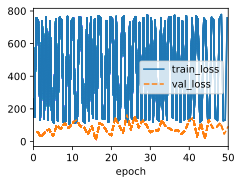

In [98]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
data.y[4] = 10000
trainer = d2l.Trainer(max_epochs=50)
trainer.fit(model, data)

In [93]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([-0.0391,  0.0841])
error in estimating b: tensor([0.1800])
